# Progetto FAD 25-26

Progetto di gruppo per il corso di *Fondamenti di Analisi dei Dati* — A.A. 2025/2026

**Nome del gruppo**: *The Bayesians*

**Membri del gruppo**:
- *Filippo Falzone*  
- *Francesco Greco*

Il progetto si basa sullo studio di un dataset contenente informazioni circa varie automobili vendute.
I dati sono stati raccolti in India e le auto vendute sono usate. Quindi lo studio si baserà sul comprendere il mercato delle automobili usate in India.

---

## Parte 1 - Analisi dei Dati Esplorativa e Inferenziale

Questa fase iniziale è dedicata alla **comprensione approfondita del dataset**. Faremo:
1. Data Understanding
2. Data Cleaning & Preparation
3. Analisi Esplorativa
4. Inferenza Statistica

### 1. Data Understanding


Ci concentreremo sull'iniziare a conoscere il dataset, comprendendo a fondo il significato di ogni variabile e formulando alcune domande su cui strutturare le successive fasi dell'analisi dei dati. 

#### 1.2 Caricamento e Ispezione Iniziale


In [510]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [511]:
# FILIPPO: df = pd.read_csv('../../data_set/train-data.csv', index_col=0)
# CICCIO:
df = pd.read_csv('../../data_set/train-data.csv', index_col=0)

df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


Vediamolo nel dettaglio:

In [512]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 658.3+ KB


Il nostro dataset ha **13 caratteristiche** (colonne) e **6019 osservazioni** (righe).


#### 1.2 Dizionario dei Dati


Adesso creiamo un dizionario dei dati, in modo da avere una comprensione maggiore delle varie caratteristiche.

| Variabile             | Tipo / Scala                     | Descrizione                                                                                         | Unità |
| --------------------- | -------------------------------- | --------------------------------------------------------------------------------------------------- | ------------ |
| **Name**              | Qualitativa / Nominale           | Combinazione di marchio e modello dell’auto. | –            |
| **Location**          | Qualitativa / Nominale           | Città o regione in cui l’auto è in vendita.                                                         | –            |
| **Year**              | Numerica / Discreta / Intervalli | Anno di produzione del modello.                | –            |
| **Kilometers_Driven** | Numerica / Continua / Ratio      | Chilometri totali percorsi dall’auto.                                                               | km           |
| **Fuel_type**         | Qualitativa / Nominale           | Tipo di carburante utilizzato dall’auto.                                                            | –            |
| **Transmission**      | Qualitativa / Nominale            | Tipo di trasmissione: `automatica` o `manuale`.                                                         | –            |
| **Owner_Type**        | Qualitativa / Ordinale           | Indica il numero di proprietari precedenti che il veicolo ha avuto prima del venditore attuale. Le categorie sono ordinate per numero crescente di proprietari: `first_hand` (il venditore è il primo proprietario), `second_hand`, `third_hand`, e `fourth_above` (quattro o più proprietari).                            | –            |
| **Mileage**           | Numerica / Continua / Ratio      | Consumo di carburante dell’auto.                                               | kmpl o km/kg |
| **Engine**            | Numerica / Continua / Ratio      | Cilindrata del motore.                                                                              | cc           |
| **Power**             | Numerica / Continua / Ratio      | Potenza massima del motore.                                                                         | bhp          |
| **Seats**             | Numerica / Discreta / Ratio      | Numero di posti a sedere.            | –            |
| **New_Price**         | Numerica / Continua / Ratio      | Rappresenta il prezzo di un auto nuova dello stesso modello.                                                         | INR Lakhs    |
| **Price**             | Numerica / Continua / Ratio      | Prezzo di vendita dell’auto usata.                 | INR Lakhs    |


Alcune considerazioni sulle variabili:
- da `Name` potremmo estrarre marchio dell'auto
- da `Year` possiamo calcolare l'età dell'auto
- `Transmission` è una variabile binaria (ha solo due possibili categorie)
- modifica di `Owner_Type` in modo da renderla discreta ordinale
- `Seats` può aiutare a classificare il veicolo (SUV, sportiva, etc...)
- individuiamo `Price` come variabile target da studiare e per predire per nuove osservazioni

#### 1.3 Obiettivi dell'Analisi dei Dati

Dopo aver descritto e compreso le varie caratteristiche del dataset abbiamo formulato alcuni **obiettivi** su cui basare la nostra analisi dei dati, che ricordiamo basarsi sullo studio del mercato di auto usate in India:
- Quali sono i fattori principali che determinano il prezzo (`Price`) di un'auto usata?
- Ci aspettiamo che l'età dell'auto (`Year`) e il chilometraggio (`Kilometers_Driven`) influenzano negativamente il prezzo, ma quanto incidono?
- Il mercato indiano ha delle preferenze specifiche su caratteristiche come l'efficienza del motore (`Mileage`) o il tipo di cambio (`Transmission`)?
- Esistono marche (estratte da `Name`) o località (`Location`) specifiche in cui le auto mantengono meglio il loro valore?  

Nel corso dell'analisi tutte queste domande avranno una risposta.

---

### 2. Data Cleaning & Preparation

Prima di procedere con l'analis è molto importate preparare il dataset. Questo perché eventuali valori mancanti o anomalie (outlier) ci porterebbo a conclusioni errate o inconsistenti.

Cominciamo dando un occhiata ai **valori mancanti** (Nan) presenti nelle nostre colonne:

In [513]:
print(df.isna().sum())

print("")

print("---- NaN percentage per variable ----")
for x in df:
    if df[x].isnull().sum() > 0:
        value = (df[x].isna().sum()/len(df[x])) * 100
        print(f"{x}: {value:.2f}%")

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

---- NaN percentage per variable ----
Mileage: 0.03%
Engine: 0.60%
Power: 0.60%
Seats: 0.70%
New_Price: 86.31%


Vediamo che la maggior parte delle colonne contengono una **quantità irrilevanti di valori mancati**. Quelli che sono presenti (i missing values) si possono sistemare facilmente: o eliminiamo quelle righe, o facendo un'imputazione, o infine applicando Feature Engineering.

Tuttavia `New_Price` è un **disastro**: 5195 su 6019 righe sono vuote. Parliamo dell'86% dei dati.

- **Imputazione**: impossibile, Il prezzo di listino dello stesso modello è troppo specifico; non possiamo stimarlo tramite le caratteristiche presenti in questo dataset. Introdurebbe bias.

- **Rimozione**: Avere così tanti buchi rende la colonna inutile sia per un analisi e sia per la fase di modeling. Potrebbe essere una scelta.

- **Feature Engineering**: Potremo provare ad estrarre qualcosa da questa variabile. Testeremo, altrimenti verrà droppata.  

Verifichiamo se nel nostro dataset sono presenti **righe duplicate**, che porterebbero ad un analisi non corretta, e nel caso eliminarle:

In [514]:
duplicate_count = df.duplicated().sum()

df.drop_duplicates(inplace=True)

print(f"Rimosse di n. righe duplicate: {duplicate_count}")


Rimosse di n. righe duplicate: 0


Adesso eseguiremo **per ogni feature** un processo di Data Cleaning che includerà:
- Gestione dei Valori Mancanti
- Correzzione di Inconsistenze e Formattazione 
- Gestione degli Outliers
dove è necessario

Inoltre applicheremo tecniche di **Feature Engeneering** dove ce ne sarà il bisogno.

#### Name


Ricordiamo che 'Name' contiene il brand dell'auto osservazione.

Inoltre, come abbiamo verificato poco fa, non contiene valori mancanti.

##### Correzzione di Inconsistenze e Formattazione

Per la variabile 'Name', che include il brand veicolo, abbiamo deciso di fare del **Feature Extraction** per scomporre questa stringa in due nuove variabili: `Brand` e `Model`. 

Questo per due motivazioni principali, innanzitutto nell'analisi che andremo a fare  potremo studiare separatamente queste due nuove variabili (es. plottare i 10 modelli di auto più comuni nel dataset). In secondo luogo perché, anche se la variabile 'Name' è pulita, nella fase di modellazione potremmo scgliere se includerle o meno.

In [515]:
df['Brand'] = df['Name'].str.split(' ').str[0]
df['Model'] = df['Name'].str.split(' ', n=1).str[1]
df = df.drop('Name', axis=1)

first_col = ['Brand', 'Model']

remaining_cols = [col for col in df.columns if col not in first_col]

df = df[first_col + remaining_cols]

print("Brand e Model creati e inseriti come prime colonne.")

df = df.reset_index(drop=True)

df.head()

Brand e Model creati e inseriti come prime colonne.


,Brand,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti,Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai,Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda,Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti,Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi,A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


Controlliamo se è tutto corretto:

In [516]:
df['Brand'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini'], dtype=object)

In [517]:
df['Model'].unique()

array(['Wagon R LXI CNG', 'Creta 1.6 CRDi SX Option', 'Jazz V', ...,
       'Polo IPL II 1.2 Petrol Highline', 'Bolt Revotron XT',
       'Xylo D4 BSIV'], shape=(1876,), dtype=object)

Per model abbiamo 1742 valori unici, ce lo aspettavamo. In futuro potremmo pensare di non includere questa feature in un modello predittivo, perché essi non beneficiano di variabili del genere.

In [518]:
df['Brand'].value_counts()

Brand
Maruti           1211
Hyundai          1107
Honda             608
Toyota            411
Mercedes-Benz     318
Volkswagen        315
Ford              300
Mahindra          272
BMW               267
Audi              236
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land               60
Jaguar             40
Fiat               28
Mitsubishi         27
Mini               26
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Force               3
ISUZU               2
Smart               1
Isuzu               1
Ambassador          1
Bentley             1
Lamborghini         1
Name: count, dtype: int64

Notiamo come ci sono tanti Brand con pochi elementi..

Adesso andremo a sistemare eventuali errori di formattazione in `Brand` e `Model`. Mentre per i Brand con pochi elementi, abbiamo pensato di raggrupparli in due categorie:  
- **Other_Luxury**: Abbiamo pensato, che non vorremmo mai che 'Lamborghini' sia raggruppata con 'Smart', ad esempio. Quindi per quanto, sempre non precisissima (c'è comunque differenza tra Lamborghini e Volvo), abbiamo optato per quest'opzione.  
- **Other**: Qui il resto delle auto. La soglia è impostata a 60 counts. 

In [519]:
def clean_formatting(val):
    if isinstance(val, str):
        return val.strip().lower().capitalize()
    return val

df['Brand'] = df['Brand'].apply(clean_formatting)

duplicates_count = df.duplicated().sum()
df = df.drop_duplicates()

df = df.reset_index(drop=True)

print(f"Pulizia completata: rimossi {duplicates_count} duplicati.")

Pulizia completata: rimossi 0 duplicati.


In [520]:
df['Brand'] = df['Brand'].replace({'Land': 'Land Rover'})
brand_counts = df['Brand'].value_counts()

rare_brands = brand_counts[brand_counts <= 60].index

luxury_list = [
    'Lamborghini', 'Bentley', 'Porsche', 'Jaguar', 'Land Rover', 'Volvo', 'Mercedes-Benz', 'Audi', 'BMW', 'Lexus', 'Jeep'
]

def clean_brand_smart(brand):
    if brand not in rare_brands:
        return brand
    else:
        if brand in luxury_list:
            return 'Other_Luxury' 
        else:
            return 'Other'         

df['Brand'] = df['Brand'].apply(clean_brand_smart)

print("Distribuzione Brand dopo il raggruppamento:")
print(df['Brand'].value_counts())
df.reset_index(drop=True, inplace=True)

Distribuzione Brand dopo il raggruppamento:
Brand
Maruti           1211
Hyundai          1107
Honda             608
Toyota            411
Mercedes-benz     318
Volkswagen        315
Ford              300
Mahindra          272
Bmw               267
Audi              236
Tata              186
Skoda             173
Other_Luxury      156
Renault           145
Chevrolet         121
Other             102
Nissan             91
Name: count, dtype: int64


#### Location

Ricordiamo che essa contiene il luogo in cui l'auto è stata venduta.

Come abbiamo verificato prima 'Location' non contiene valori mancanti.

##### Correzzione di Inconsistenze e Formattazione

Non sono necessari controlli su questa variabile, potremmo controllare se i nomi dei luoghi assunti da essa **esistono veramente**. Lo faremo ma solo per ottenere **informazioni circa i luoghi** in cui queste auto sono state rivendute:

In [521]:
print(df['Location'].unique())
print("")
print(df['Location'].value_counts())

['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']

Location
Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Ahmedabad     224
Name: count, dtype: int64


Abbiamo esaminato i luoghi riportati sopra, non solo essi non sono frutto di errore o fantasia, ma sono tutte **grandi città metropolitane** indiane.

#### Year

Questa variabile indica l'anno in cui l'auto è stata prodotta.

Come visto prima non contiene valori mancanti.

##### Feature Engineering

Anche se la variabile **Year** è completa e senza errori, usarla così com'è in un modello di regressione non è la scelta migliore. Abbiamo deciso di convertirla in **Age** (età del veicolo) per due motivi principali:

In primo luogo, passiamo da una **scala a intervalli** a una **scala ratio**. Mentre l'anno solare ha uno zero arbitrario, la variabile **Age** ha uno **zero assoluto**: quando **Age = 0**, stiamo parlando di un'auto nuova. Questo cambio di scala rende i calcoli statistici del modello molto più coerenti.

In secondo luogo, questa trasformazione rende il modello molto più **robusto nel tempo**. Se usassimo l'anno grezzo, il modello imparerebbe il valore specifico di una data (es. "il 2018 vale X"). Calcolando l'età, il modello impara invece la **legge di svalutazione** basata sull'usura (es. "un'auto di 5 anni perde il 30% del valore"). In questo modo, la regola scoperta rimarrà valida anche negli anni futuri, evitando che il modello diventi obsoleto dopo soli dodici mesi.

L'Analisi Esplorativa non beneficia poi così tanto di questo cambiamento, l'abbiamo fatto con la prospettiva futura di un uso di questo dataset per un modello predittivo.

L'anno **zero** sarà il 2019, anno di riferimento per il dataset.

In [522]:
current_year = 2019

index_year = df.columns.get_loc('Year')
age_values = current_year - df['Year']
df.insert(index_year, 'Age', age_values)
df.drop('Year', axis=1, inplace=True)

print('Age creata.')

Age creata.


##### Gestione degli Outliers

Inizieremo mostrando un boxplot per questa variabile. 

Il **boxplot** è uno strumento fondamentale per analizzare la distribuzione dei dati e identificare le anomalie. All'interno del rettangolo centrale, definito **IQR (Interquartile Range)**, si concentra il **50% delle osservazioni** totali, delimitate dal primo e dal terzo quartile. La linea interna al box indica la **mediana**, fornendo un'indicazione immediata sulla simmetria della distribuzione.

I punti posizionati oltre i "baffi" del grafico rappresentano i potenziali **outlier**. Questi valori si discostano significativamente dalla massa dei dati e richiedono un'attenzione particolare: potrebbero essere errori di inserimento oppure indicare **segmenti di mercato specifici** (come auto di lusso o d'epoca) che seguono logiche di prezzo differenti rispetto alla media.

<Axes: >

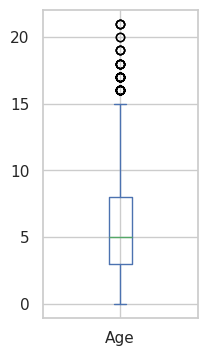

In [523]:
df['Age'].plot.box(figsize=(2,4))

Age (Year) non presenta molti potenziali outlier, con molta probabilità sono auto molto vecchie che seguono normative ed un mercato differente.

Serve indagare meglio.

In [524]:
df[df['Age'] >= 15]['Age'].value_counts()

Age
15    31
16    17
17    15
18     8
19     4
21     4
20     2
Name: count, dtype: int64

Vediamo come la maggior parte delle auto considerate outliers si discostano solo di 3 anni. Andiamo a vedere di che tipo di auto si tratta:

In [525]:
df[df['Age'] == 18].head(8)

,Brand,Model,Location,Age,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
1999,Mercedes-benz,E-Class 220 CDI,Pune,18,121000,Diesel,Manual,First,15.0 kmpl,2148 CC,null bhp,5.0,NaN,5.00
2737,Maruti,Wagon R Vx,Jaipur,18,200000,Petrol,Manual,First,12.0 kmpl,NaN,NaN,NaN,NaN,0.70
3806,Honda,City 1.5 EXI,Pune,18,125943,Petrol,Manual,Second,13.0 kmpl,1493 CC,100 bhp,5.0,NaN,1.45
3963,Other,Lancer 1.5 SFXi,Chennai,18,104000,Petrol,Manual,Third,13.7 kmpl,1468 CC,85.8 bhp,5.0,NaN,1.00
4629,Other,Siena 1.2 ELX,Jaipur,18,70000,Petrol,Manual,Third,0.0 kmpl,1242 CC,null bhp,5.0,NaN,0.55
4863,Hyundai,Santro D Lite,Chennai,18,140000,Petrol,Manual,Third,20.3 kmpl,1086 CC,68 bhp,5.0,4.55 Lakh,0.70
5453,Hyundai,Accent GLE,Pune,18,130000,Petrol,Manual,Second,13.2 kmpl,1495 CC,94 bhp,5.0,NaN,0.75
5647,Toyota,Qualis Fleet A3,Mumbai,18,227000,Diesel,Manual,Fourth & Above,0.0 kmpl,2446 CC,null bhp,8.0,NaN,2.20


In [526]:
df[df['Age'] > 19].head(10)

,Brand,Model,Location,Age,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
1224,Maruti,Zen VX,Jaipur,20,70000,Petrol,Manual,Second,17.3 kmpl,993 CC,60 bhp,5.0,NaN,0.77
1845,Honda,City 1.3 EXI,Pune,20,140000,Petrol,Manual,First,13.0 kmpl,1343 CC,90 bhp,5.0,NaN,0.90
3138,Maruti,Zen LXI,Jaipur,21,95150,Petrol,Manual,Third,17.3 kmpl,993 CC,60 bhp,5.0,NaN,0.45
3749,Mercedes-benz,E-Class 250 D W 210,Mumbai,21,55300,Diesel,Automatic,First,10.0 kmpl,1796 CC,157.7 bhp,5.0,NaN,3.90
4709,Maruti,1000 AC,Hyderabad,21,104000,Petrol,Manual,Second,15.0 kmpl,970 CC,null bhp,5.0,NaN,0.85
5716,Maruti,Zen LX,Jaipur,21,95150,Petrol,Manual,Third,17.3 kmpl,993 CC,60 bhp,5.0,NaN,0.53


In [527]:
df[df['Age'] == 18].head(8)

,Brand,Model,Location,Age,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
1999,Mercedes-benz,E-Class 220 CDI,Pune,18,121000,Diesel,Manual,First,15.0 kmpl,2148 CC,null bhp,5.0,NaN,5.00
2737,Maruti,Wagon R Vx,Jaipur,18,200000,Petrol,Manual,First,12.0 kmpl,NaN,NaN,NaN,NaN,0.70
3806,Honda,City 1.5 EXI,Pune,18,125943,Petrol,Manual,Second,13.0 kmpl,1493 CC,100 bhp,5.0,NaN,1.45
3963,Other,Lancer 1.5 SFXi,Chennai,18,104000,Petrol,Manual,Third,13.7 kmpl,1468 CC,85.8 bhp,5.0,NaN,1.00
4629,Other,Siena 1.2 ELX,Jaipur,18,70000,Petrol,Manual,Third,0.0 kmpl,1242 CC,null bhp,5.0,NaN,0.55
4863,Hyundai,Santro D Lite,Chennai,18,140000,Petrol,Manual,Third,20.3 kmpl,1086 CC,68 bhp,5.0,4.55 Lakh,0.70
5453,Hyundai,Accent GLE,Pune,18,130000,Petrol,Manual,Second,13.2 kmpl,1495 CC,94 bhp,5.0,NaN,0.75
5647,Toyota,Qualis Fleet A3,Mumbai,18,227000,Diesel,Manual,Fourth & Above,0.0 kmpl,2446 CC,null bhp,8.0,NaN,2.20


Age (Year) non presenta molti outlier, con molta probabilità sono auto molto vecchie che seguono normative ed un mercato differente, che potrebbero portare solamente a confusione, inoltre, oltre una certa soglia non è manco più statisticamente rilevante l'età. Abbiamo scelto di rimuovere le auto più vecchie di 14 anni (2005).

In [528]:
threshold = 14
auto_vecchie = df[df['Age'] > threshold]

df = df[df['Age'] <= threshold]
df.reset_index(drop=True, inplace=True)

print(f"Numero di auto rimosse: {len(auto_vecchie)}")

Numero di auto rimosse: 81


#### Kilometers_Driven

Questa variabile contiene quanti chilometri ha percorso l'auto.

Come abbiamo verificato prima, non contiene valori mancanti.

Questa variabile è gia pulita, non ci sono particolari controlli da fare.

##### Gestione degli Outliers

Plottando un boxplot:

<Axes: >

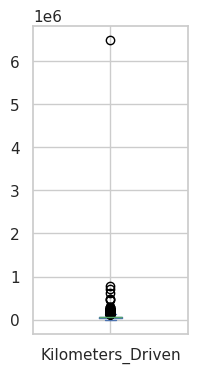

In [529]:
df['Kilometers_Driven'].plot.box(figsize=(2,4))

Si nota subito quel numero spaventoso lì in alto, sicuramente impossibile. Sicuramente un errore. Meglio rimuoverlo.

Ci aspetteremmo comunque che auto che superino il milione di chilometri percorsi siano outliers. Perché potrebbero essere sia errori dovuti all'inserimento e sia auto molto molto vecchie.

In [530]:
print("Outlier estremi:")
print(df[df['Kilometers_Driven'] >= 1000000])

df = df[df['Kilometers_Driven'] < 1000000]
df.reset_index(drop=True, inplace=True)

Outlier estremi:
     Brand                  Model Location  Age  Kilometers_Driven Fuel_Type  \
2300   Bmw  X5 xDrive 30d M Sport  Chennai    2            6500000    Diesel   

     Transmission Owner_Type     Mileage   Engine    Power  Seats New_Price  \
2300    Automatic      First  15.97 kmpl  2993 CC  258 bhp    5.0       NaN   

      Price  
2300   65.0  


Plottiamo di nuovo il boxplot:

<Axes: >

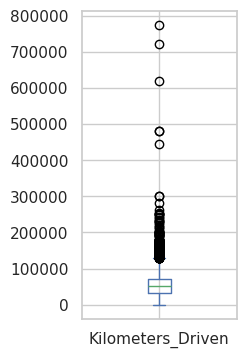

In [531]:
df['Kilometers_Driven'].plot.box(figsize=(2,4))

Vogliamo sistemare questi outlier imputando il 99° percentile. Perché i valori sono troppo distanti, potrebbe portare solo che rumore al modello. Inoltre nel mercato odierno già sopra un tot chilometri sarebbero da rottamare le auto. Quindi potremmo usare il 99° percentile proprio per dire al modello di considerare l'auto massimamente usata, dato che dopo una certa soglia non c'è quasi nulla più da togliere. 

Soglia (99%): 170000 km


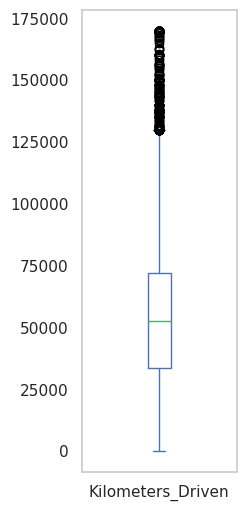

In [532]:
soglia_99 = df['Kilometers_Driven'].quantile(0.99)
print(f"Soglia (99%): {soglia_99:.0f} km")

df['Kilometers_Driven'] = np.where(df['Kilometers_Driven'] > soglia_99, 
                                   soglia_99, 
                                   df['Kilometers_Driven'])

df.reset_index(drop=True, inplace=True)

df['Kilometers_Driven'].plot.box(figsize=(2,6))
plt.grid()
plt.show()

#### Fuel_Type


'Fuel_Type' contiene il tipo di carburante utilizzato dall'auto.

Come abbiamo verificato prima 'Fuel_Type' non contiene valori mancanti.

##### Correzzione di Inconsistenze e Formattazione


Facciamo un controllo sul tipo di valori che può assumere questa variabile:

In [533]:
df['Fuel_Type'].value_counts()

Fuel_Type
Diesel      3187
Petrol      2682
CNG           56
LPG           10
Electric       2
Name: count, dtype: int64

Notiamo subito il duopolio Diesel e Petrol, poi ci sono alcune nicchie. 

La presenza di auto che fanno uso di 'CNG' e 'LPG' e di auto elettriche è un po' problematica. La poca presenza nel dataset potrebbe indicare che c'è **poco mercato** nella regione di studio per auto di questa tipologia.

Inoltre, come vedremo più avanti, la caratteristica `Mileage` (chilometri percorsi per quantità utilizzata di carburante) utilizza due differenti unità di misura: una per 'Diesel' e 'Petrol ed una per 'LPG' e 'CNG', addirittura ha valori nulli per 'Electric'. Rendendo più complessa la loro gestione.

Data la scarsità di informazioni e la bassa rappresentatività di queste nicchie, uno studio approfondito che le includa risulterebbe eccessivamente complesso e poco significativo.

Pertanto, per ottimizzare l'analisi, la decisione è di escludere le tipologie di carburante 'Electric', 'CNG' e 'LPG' dal dataset.

In [534]:
df = df[(df['Fuel_Type'] != 'Electric') & (df['Fuel_Type'] != 'CNG') & (df['Fuel_Type'] != 'LPG')]

df = df.reset_index(drop=True)

print("Nicchie rimosse.")

Nicchie rimosse.


#### Transmission

Contiene un'etichetta, ovvero il tipo di cambio dell'auto.

Come visto prima non ha valori mancanti.

##### Correzzione di Inconsistenze e Formattazione

Facciamo un controllo sul tipo di valori che può assumere questa variabile:

In [535]:
df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

Assume solamente due etichette, se l'auto e manuale o automatica. In futuro possiamo farla diventare una variabile discreta binaria per una possibile modellazione.

#### Owner_Type

Contiene un'etichetta, ovvero quanti proprietari aveva l'auto al momento della vendita.

Come visto prima non ha valori mancanti.

##### Correzzione di Inconsistenze e Formattazione

Facciamo un controllo sul tipo di valori che può assumere questa variabile:

In [536]:
df['Owner_Type'].unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

In [537]:
df['Owner_Type'].value_counts()

Owner_Type
First             4846
Second             922
Third               93
Fourth & Above       8
Name: count, dtype: int64

Essendo molto poche le auto di quarta mano, potremmo combinarle insieme alla terza. 

In [538]:
df['Owner_Type'] = df['Owner_Type'].replace('Fourth & Above', 'Third')

Non sembrano esserci ulteriori problemi, in futuro potremmo farla diventare una variabile numerica discreta per la parte di modeling.

#### Mileage


Contiene l'efficienza del motore dell'auto.

Verifichiamo il numero di valori mancanti:

In [539]:
print("Valori mancanti:", df['Mileage'].isna().sum())

Valori mancanti: 0


##### Correzzione di Inconsistenze e Formattazione


Adesso verifichiamo se tutte le osservazioni sono conformi con la formattazione e condividono la stessa unità di misura:

In [540]:
df_mileage = df['Mileage'].dropna()

# Controllo sulla formattazione
pattern = r'^\S+\s\S+$'

risultato_controllo = df_mileage.astype(str).str.match(pattern)

total_obs = len(df_mileage)
conformi = risultato_controllo.sum()
non_conformi = total_obs - conformi

print(f"Conformi: {conformi}")
print(f"Non conformi: {non_conformi}")

# Controllo sulle unità
mileage_units = df_mileage.str.split().str[-1]

print("\n---- Unità di misura presenti ----")
mileage_units.unique()

Conformi: 5869
Non conformi: 0

---- Unità di misura presenti ----


array(['kmpl'], dtype=object)

Per nostra fortuna tutte le righe **seguono la formattazione prevista**. L'altra unità di misura probabilmente corrispondeva con i carburanti CNG o LPG.

Procediamo con l'estrarre i valori numerici:

In [541]:
df['Mileage'] = df['Mileage'].str.split(' ').str[0]
df['Mileage'] = pd.to_numeric(df['Mileage'], errors='coerce')

df['Mileage'] = df['Mileage'].astype('int64')

print("Valori estratti.")

Valori estratti.


##### Gestione degli Outliers


Plottiamo il boxplot:

<Axes: >

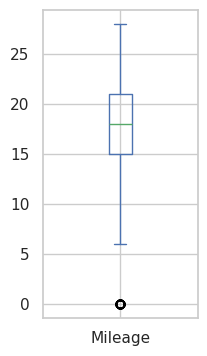

In [542]:
df['Mileage'].plot.box(figsize=(2,4))

Notiamo che abbiamo dei valori molto vicini a zero, auto che hanno un alta efficienza esistono, ma valori così bassi sono impossibili.

In [543]:
print(f"Valori per mileage inaccettabili: {len(df[df['Mileage'] <= 0])}")

Valori per mileage inaccettabili: 56


Queste righe sono i valori inaccettabili, sono outliers. Per così poche osservazione non ne vale la pena imputare valori, introdurebbe solo bias, per questo abbiamo deciso di rimuovere queste osservazioni.

In [544]:
df = df[df['Mileage'] > 0]
df = df.reset_index(drop=True)

print("Righe rimosse.")

Righe rimosse.


#### Engine


Assume come valore la cilindrata in CC (centimetri-cubi) del motore dell'auto.

Per poterla utilizzare in modo significativo in qualsiasi analisi bisogna estrarne il valore e trasformare questa variabile in numerica.

##### Gestione dei valori mancanti

In [545]:
print("Valori mancanti:", df['Engine'].isna().sum())

Valori mancanti: 23


Meno del 1% delle osservazioni ha un valore mancante per Engine.

Potremmo imputare il valore inserendo al media dei valori (più robusta agli outlier), ma essendo che il dataset contiene sia auto di lusso e sia auto economiche rischieremmo di inserire un valore non valido per il tipo di auto e quindi di creare degli outlier. 

Per questo motivo abbiamo deciso di eliminare le osservazioni che presentano dei valori mancanti.

In [546]:
df = df[~df['Engine'].isna()].reset_index(drop=True)

print("Righe rimosse.")

Righe rimosse.


##### Correzzione di Inconsistenze e Formattazione


Adesso verifichiamo se tutte le osservazioni sono conformi con la formattazione e condividono la stessa unità di misura:

In [547]:
df_engine = df['Engine']

# Controllo sulla formattazione
pattern = r'^\S+\s\S+$'

risultato_controllo = df_engine.astype(str).str.match(pattern)

total_obs = len(df_engine)
conformi = risultato_controllo.sum()
non_conformi = total_obs - conformi

print(f"Conformi: {conformi}")
print(f"Non conformi: {non_conformi}")

# Controllo sulle unità
engine_units = df_engine.str.split().str[-1]

print("\n---- Unità di misura presenti ----")
engine_units.unique()

Conformi: 5790
Non conformi: 0

---- Unità di misura presenti ----


array(['CC'], dtype=object)

In [548]:
df['Engine'] = df['Engine'].str.split(' ').str[0]
df['Engine'] = pd.to_numeric(df['Engine'], errors='coerce')

df['Engine'] = df['Engine'].astype('int64')

print("Valori estratti.")

Valori estratti.


##### Gestione degli outliers


Stampiamo il boxplot:

<Axes: >

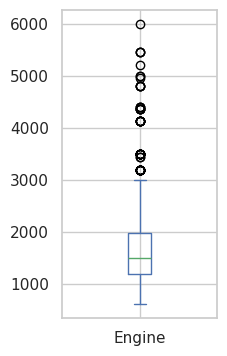

In [549]:
df['Engine'].plot.box(figsize=(2,4))

In Engine non troviamo valori estremi, o impossibili, ma solo valori molto alti (probabilmente auto di lusso). Quindi corretto lasciare così.

#### Power

Contiene la potenza dell'auto espressa in bhp.

##### Gestione dei valori mancanti


In [550]:
print(f"Valori mancanti: {df['Power'].isna().sum()}")

Valori mancanti: 0


Notiamo che non ha valori mancanti, mentre prima abbiamo visto che li aveva, molto probabilmente perché queste osservazioni coincidono con quelle eliminate in precedenza

###### Correzzione di Inconsistenze e Formattazione

Adesso verifichiamo se tutte le osservazioni sono conformi con la formattazione e condividono la stessa unità di misura:

In [551]:
df_power = df['Power']

# Controllo sulla formattazione
pattern = r'^\S+\s\S+$'

risultato_controllo = df_power.astype(str).str.match(pattern)

total_obs = len(df_power)
conformi = risultato_controllo.sum()
non_conformi = total_obs - conformi

print(f"Conformi: {conformi}")
print(f"Non conformi: {non_conformi}")

# Controllo sulle unità
power_units = df_power.str.split().str[-1]

print("\n---- Unità di misura presenti ----")
power_units.unique()

Conformi: 5790
Non conformi: 0

---- Unità di misura presenti ----


array(['bhp'], dtype=object)

In [552]:
pattern_numerico = r'.*\d+.*'

# 1. Identifica le stringhe che NON contengono un numero
# Il .astype(str) è importante per catturare tutti i tipi di stringa
non_numeriche_mask = ~df['Power'].astype(str).str.contains(pattern_numerico, na=False)

# 2. Converti le stringhe non numeriche identificate in NaN
df.loc[non_numeriche_mask, 'Power'] = np.nan

print(f"Smascherati {non_numeriche_mask.sum()} valori senza numeri come NaN.")

Smascherati 74 valori senza numeri come NaN.


In [553]:
df = df[~df['Power'].isna()].reset_index(drop=True)

print("Righe rimosse.")

Righe rimosse.


Perfetto sono tutte conformi, adesso possiamo procedere con l'estrarre il valore numerico:

In [554]:
df['Power'] = df['Power'].str.split(' ').str[0]
df['Power'] = pd.to_numeric(df['Power'], errors='coerce')

df['Power'] = df['Power'].astype('float64')

print("Valori estratti.")

Valori estratti.


##### Gestione degli outliers


Stampiamo il boxplot:

<Axes: >

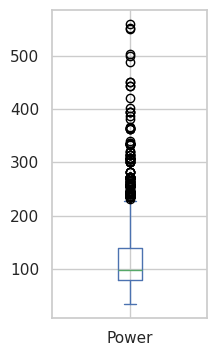

In [555]:
df['Power'].plot.box(figsize=(2,4))

In Power non troviamo valori estremi, o impossibili, ma solo valori molto alti (probabilmente auto di lusso). Quindi corretto lasciare così. Stesso discorso che valeva anche per Engine.

#### Seats


Contiene il numero di passeggeri che può ospitare l'auto.

##### Gestione valori mancanti

In [556]:
print(f"Valori mancanti: {df['Seats'].isna().sum()}")

Valori mancanti: 1


Mancano alcuni valori, vediamo quali valori assume questa variaibile. Ci aspetteremmo una predominanza di auto a 5 posti, che sono le più diffuse.

In [557]:
df['Seats'].value_counts()

Seats
5.0     4784
7.0      666
8.0      131
4.0       88
6.0       28
2.0       13
9.0        3
10.0       2
Name: count, dtype: int64

Visto che il valore che esce più spesso è 5, e dato che vogliamo tenere più dati possibili, abbiamo deciso di fare una cosa semplice: sostituire i valori mancanti nella colonna dei posti con un bel '5'.

Così facciamo un piccolo "errore" statistico, perché stiamo gonfiando un po' la categoria da 5 posti. Però è un ottimo compromesso tra l'essere precisi e l'avere un dataset completo. L'unica cosa che potremmo fare è rimuovere le classi 9 e 10, in quanto sono davvero poche.

Dato che i dati mancanti sono davvero pochi, questo piccolo trucchetto non rovinerà l'analisi generale né influenzerà seriamente il modello finale.

Procediamo all'imputazione e la rimozione:

In [558]:
df = df[df['Seats'] <= 8]
df = df.reset_index(drop=True)

In [559]:
mediana_seats = df['Seats'].median()
df['Seats'] = df['Seats'].fillna(mediana_seats)

print("Valori imputati.")

Valori imputati.


In [560]:
df['Seats'] = df['Seats'].astype(int)

##### Gestione degli outlier


Mostriamo il boxplot:

<Axes: >

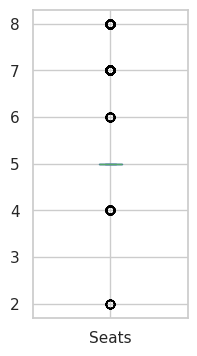

In [561]:
df['Seats'].plot.box(figsize=(2,4))

Abbiamo visto prima che più del 90% del dataset ha 5 posti. Probabilmente anche per questo motivo viene considerato outlier qualsiasi numero non sia 5. 

##### Feature Engineering

Da **Seats** a **Category**  
La variabile Seats è numerica e presenta una natura ordinale (2 < 4 < 5 < 7), il suo utilizzo diretto nel modello di regressione lineare risulterebbe fuorviante a causa della sua relazione con il prezzo:
- 2 posti: Identifica vetture sportive/lusso ad alto valore.
- 5 posti: Identifica il mercato di massa standard a valore medio-basso.
- 7+ posti: Identifica veicoli di grandi dimensioni a valore medio-alto.  
Per cui abbiamo deciso di trasformarla in 3 categorie.

In [562]:
def get_cat(seats):
    if seats <= 2: return 'Sports'
    if seats <= 5: return 'Standard'
    return 'Large'

df['Cat'] = df['Seats'].apply(get_cat)
df = df.drop('Seats', axis=1)

#### New_Price


Questa variabile contiene il valore del prezzo del nuovo modello di quell'auto, espresso in Lakh.

Ma andiamola ad esplorare meglio:

In [563]:
total = len(df)

print(f"Valori mancanti: {df['New_Price'].isna().sum()} ({df['New_Price'].isna().sum() / total:.2%})")
print(f"Valori non mancanti: {df['New_Price'].notnull().sum()} ({df['New_Price'].notnull().sum() / total:.2%})")

Valori mancanti: 4902 (85.85%)
Valori non mancanti: 808 (14.15%)


Solo il 14% delle osservazioni hanno un valore per questa variabile. Indaghiamo meglio.

Vogliamo capire la tipologia di osservazioni che per New_Price hanno un valore:

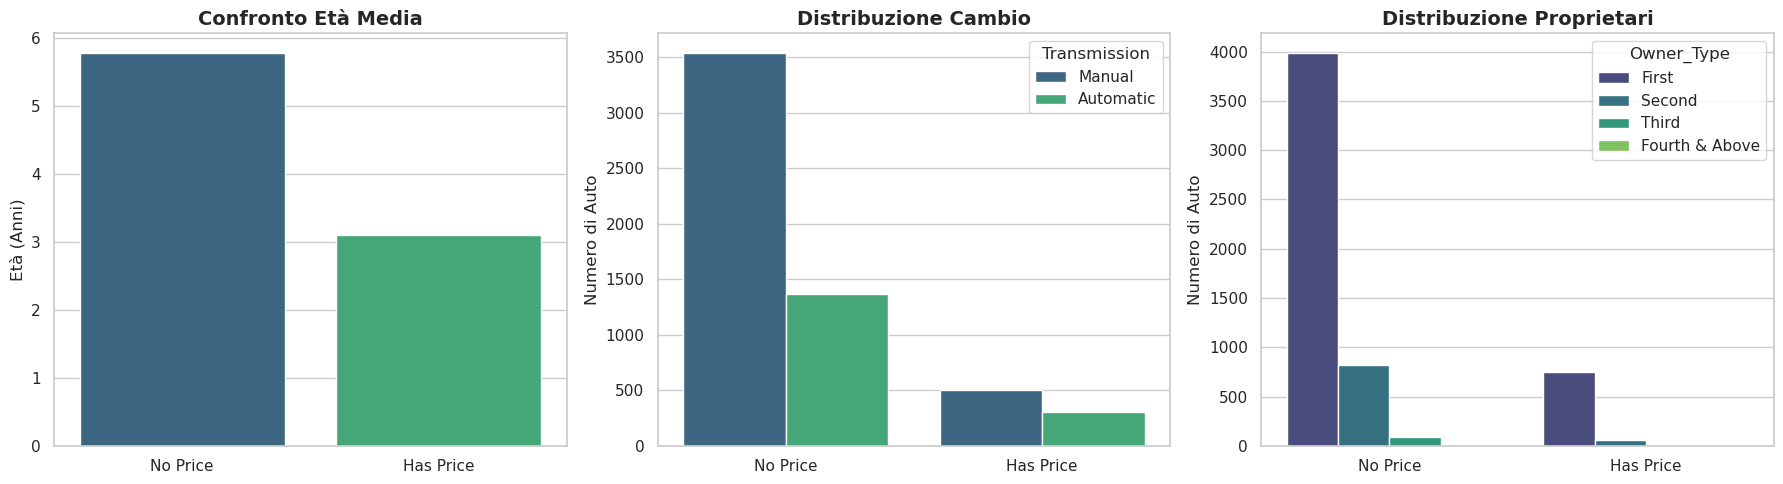

In [564]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
viridis_pal = sns.color_palette("viridis", as_cmap=False)

temp_df = df.copy()
temp_df['New_Price_Status'] = temp_df['New_Price'].notnull().map({True: 'Has Price', False: 'No Price'})

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Correzione: aggiunto hue e legend=False per evitare il FutureWarning
sns.barplot(data=temp_df, x='New_Price_Status', y='Age', ax=axes[0], hue='New_Price_Status', palette="viridis", errorbar=None, legend=False)
axes[0].set_title('Confronto Età Media', fontsize=14, fontweight='bold')
axes[0].set_xlabel('')
axes[0].set_ylabel('Età (Anni)')

sns.countplot(data=temp_df, x='New_Price_Status', hue='Transmission', ax=axes[1], palette="viridis")
axes[1].set_title('Distribuzione Cambio', fontsize=14, fontweight='bold')
axes[1].set_xlabel('')
axes[1].set_ylabel('Numero di Auto')

owner_order = ['First', 'Second', 'Third', 'Fourth & Above']
sns.countplot(data=temp_df, x='New_Price_Status', hue='Owner_Type', hue_order=owner_order, ax=axes[2], palette="viridis")
axes[2].set_title('Distribuzione Proprietari', fontsize=14, fontweight='bold')
axes[2].set_xlabel('')
axes[2].set_ylabel('Numero di Auto')

plt.tight_layout()
plt.show()

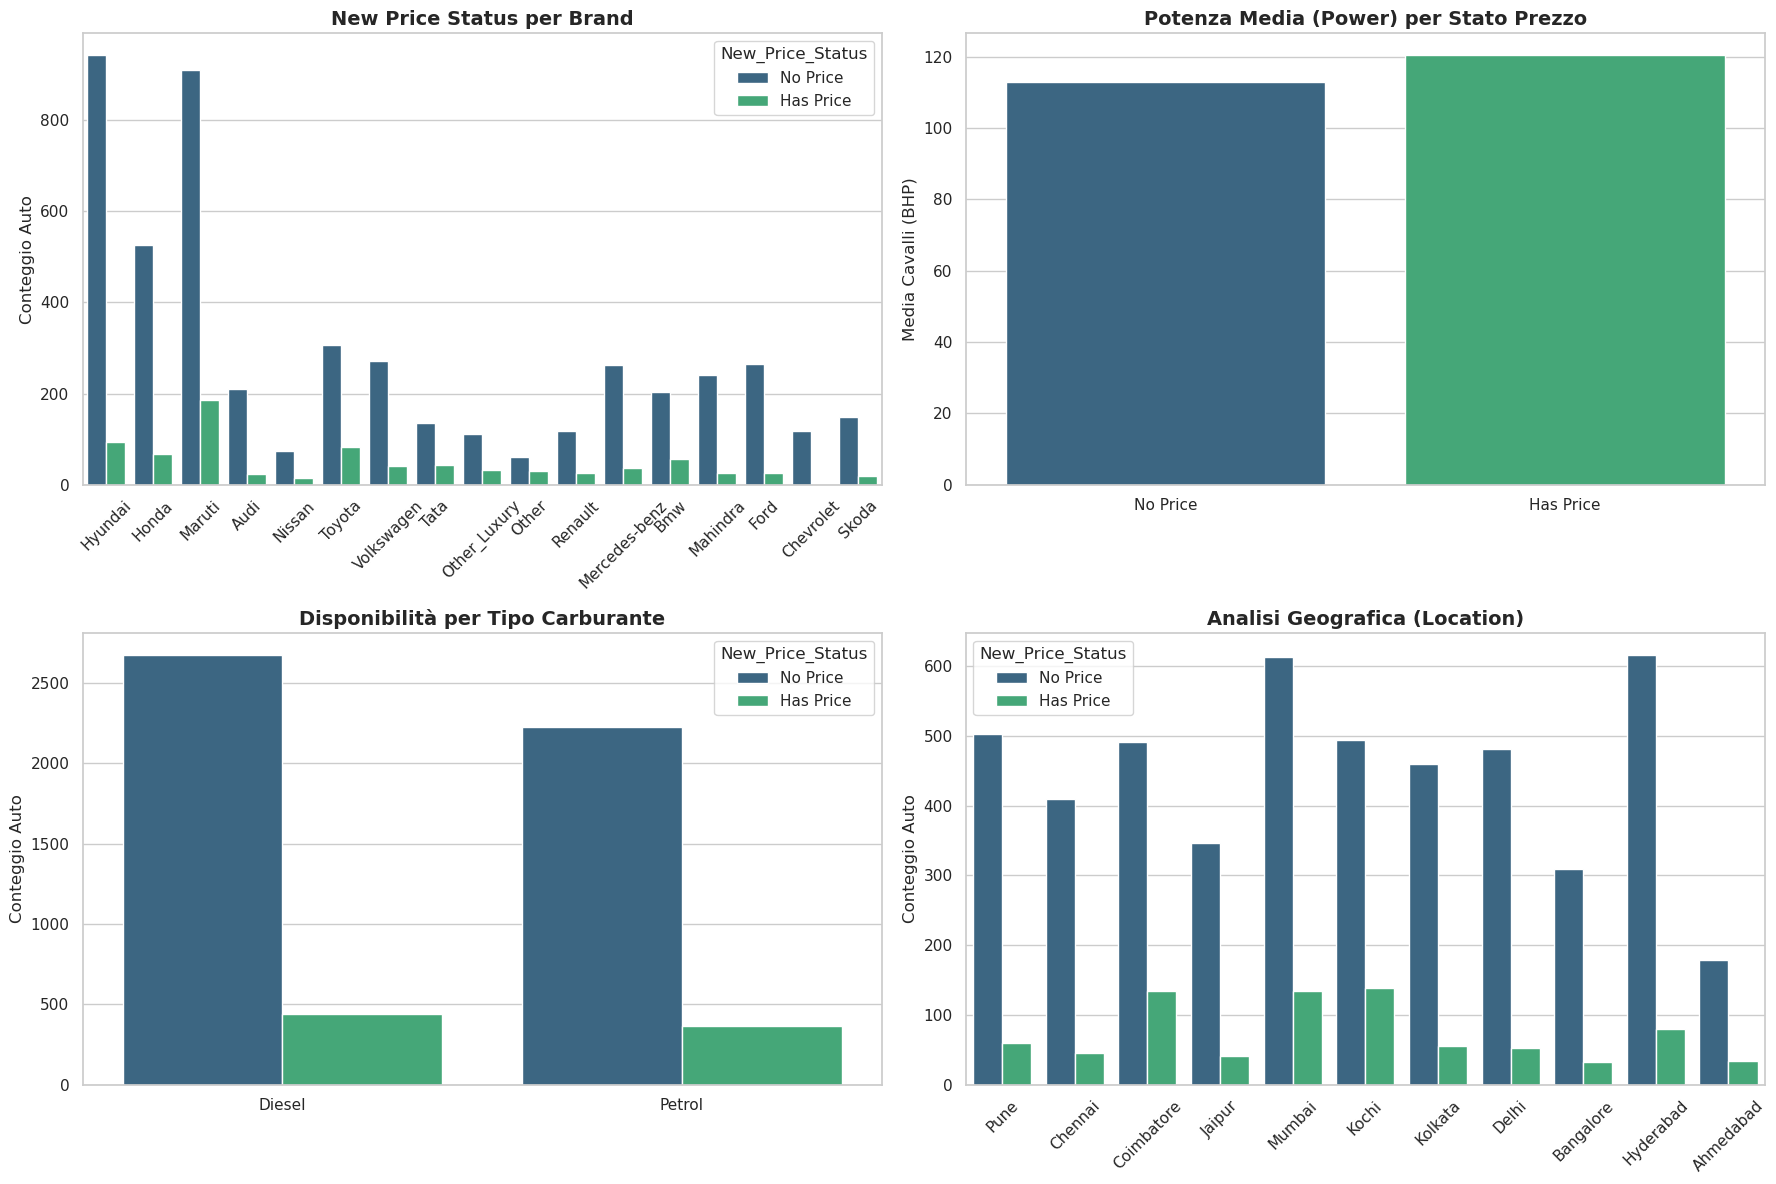

In [565]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

temp_df = df.copy()
temp_df['New_Price_Status'] = temp_df['New_Price'].notnull().map({True: 'Has Price', False: 'No Price'})

fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# --- 1. BRAND CATEGORY (Countplot) ---
sns.countplot(data=temp_df, x='Brand', hue='New_Price_Status', ax=axes[0, 0], palette="viridis")
axes[0, 0].set_title('New Price Status per Brand', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].set_ylabel('Conteggio Auto')

# --- 2. POWER (Bar Plot - Potenza Media) ---
sns.barplot(data=temp_df, x='New_Price_Status', y='Power', ax=axes[0, 1], hue='New_Price_Status', palette="viridis", errorbar=None, legend=False)
axes[0, 1].set_title('Potenza Media (Power) per Stato Prezzo', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('')
axes[0, 1].set_ylabel('Media Cavalli (BHP)')

# --- 3. FUEL TYPE (Countplot) ---
sns.countplot(data=temp_df, x='Fuel_Type', hue='New_Price_Status', ax=axes[1, 0], palette="viridis")
axes[1, 0].set_title('Disponibilità per Tipo Carburante', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('')
axes[1, 0].set_ylabel('Conteggio Auto')

# --- 4. LOCATION (Countplot) ---
sns.countplot(data=temp_df, x='Location', hue='New_Price_Status', ax=axes[1, 1], palette="viridis")
axes[1, 1].set_title('Analisi Geografica (Location)', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].set_ylabel('Conteggio Auto')

plt.tight_layout()
plt.show()

Auto che hanno un valore in New_Price:
- Hanno un età media minore
- Sono per la maggior parte di tipo 'Automatic' per Transmission
- Sono la maggior parte First_Owner
- Il Brand non c'entra
- Power non c'entra
- Fuel_Type non c'entra
- Location non c'entra

Pensiamo che le auto che hanno questa informazione siano quelle ancora in produzione, di cui quindi si hanno dati.

##### Feature Enineering

 
Abbiamo visto che nel nostro dataset in media le auto che hanno un valore per New_Price sono state vendute ad un prezzo maggiore, considerando che la ma

In [566]:
df['Has_New_Price'] = df['New_Price'].notnull().astype(int)

print(df.groupby('Has_New_Price')['Price'].mean())

Has_New_Price
0     9.042032
1    13.672042
Name: Price, dtype: float64


Con questo codice le osservazioni che hanno un valore per New_Price avranno valore 1 nella nuova feature Has_New_Price.

Gli 808 veicoli che hanno valore 1 nella nuova feature in media costano 4 Lahks in più di quelle senza.

In [567]:
df[df['New_Price'].notnull()].info()

<class 'pandas.core.frame.DataFrame'>
Index: 808 entries, 1 to 5705
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              808 non-null    object 
 1   Model              808 non-null    object 
 2   Location           808 non-null    object 
 3   Age                808 non-null    int64  
 4   Kilometers_Driven  808 non-null    float64
 5   Fuel_Type          808 non-null    object 
 6   Transmission       808 non-null    object 
 7   Owner_Type         808 non-null    object 
 8   Mileage            808 non-null    int64  
 9   Engine             808 non-null    int64  
 10  Power              808 non-null    float64
 11  New_Price          808 non-null    object 
 12  Price              808 non-null    float64
 13  Cat                808 non-null    object 
 14  Has_New_Price      808 non-null    int64  
dtypes: float64(3), int64(4), object(8)
memory usage: 101.0+ KB


Vediamo se sono anche più nuove:

In [568]:
print(df.groupby('Has_New_Price')['Age'].mean())

Has_New_Price
0    5.779478
1    3.097772
Name: Age, dtype: float64


WARNING: spiegare meglio

C'è una correlazione, ma non perfetta. Questo dato potrebbe misurare se l'auto è ancora in produzione. Inizialmente avevamo pensato a discretizzarla, in 0 e 1, ma abbiamo deciso che per le righe con 1, ci sarà pure il New_Price, così il modello comprende che se ha 0, non avrà il New_Price. Procediamo col trasformarla.

In [569]:
temp_series = df['New_Price'].dropna()
units = temp_series.astype(str).apply(lambda x: x.split()[-1].strip())
print("Unità di misura trovate e loro frequenza:")
print(units.value_counts())

Unità di misura trovate e loro frequenza:
New_Price
Lakh    791
Cr       17
Name: count, dtype: int64


Ok dobbiamo sistemarlo. 

In [570]:
def clean_new_price(value):
    if pd.isna(value):
        return 0
    
    value = str(value).strip()
    
    if 'Cr' in value:
        # Rimuove 'Cr', converte in float e moltiplica per 100 
        return float(value.replace('Cr', '').strip()) * 100 
    
    # Gestione Lakh unità standard
    elif 'Lakh' in value:
        return float(value.replace('Lakh', '').strip())
    
    return 0

df['New_Price_num'] = df['New_Price'].apply(clean_new_price)
df['Has_New_Price'] = df['New_Price'].notnull().astype(int)

print(df[['New_Price', 'New_Price_num']].dropna().head())

     New_Price  New_Price_num
1    8.61 Lakh           8.61
5      21 Lakh          21.00
8   10.65 Lakh          10.65
12  32.01 Lakh          32.01
17  47.87 Lakh          47.87


In [571]:
df = df.drop(['New_Price'], axis=1)

#### Price


Questa variabile contiene il prezzo con cui è stata venduta l'auto.

Come visto prima questa variabile non ha alcun valore mancante.

Non c'è alcun controllo di formattazione o inconsistenza da fare per questa variabile. Essa è già pulita.

##### Gestione degli outliers


Vediamo il boxplot:

<Axes: >

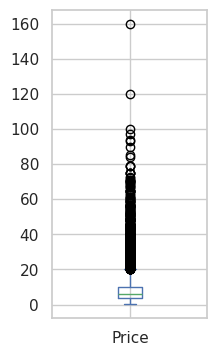

In [572]:
df['Price'].plot.box(figsize=(2,4))

Innanzitutto notiamo una distribuzione altamente asimmetrica, per la precisione right-skewed (se plottassimo la distribuzione). Converrebbe fare una trasformazione logaritmica per portare la sua ditribuzione ad assomigliare a quella normale (Gaussiana), per migliorare le performance del notro modello.

Vediamo che presenta molti valori alti, potrebbero riferirsi ad auto molto costose come auto di lusso, ma vediamo meglio:

In [573]:
df[df['Price'] > 100]

,Brand,Model,Location,Age,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Price,Cat,Has_New_Price,New_Price_num
3864,Other_Luxury,Rover Range Rover 3.0 Diesel LWB Vogue,Hyderabad,2,25000.0,Diesel,Automatic,First,13,2993,255.0,160.0,Standard,1,230.0
5491,Other_Luxury,Gallardo Coupe,Delhi,8,6500.0,Petrol,Automatic,Third,6,5204,560.0,120.0,Sports,0,0.0


Infatti stimo parlando di auto di lusso, che sono molto costose. Non si trattano di outliers, non sono errori di prezzo. Tuttavia essendo che la nostra analisi include anche questo tipo di auto, abbiamo deciso di non rimuovere queste osservazioni.

Facciamo un controllo mirato per valori impossibili:

In [574]:
df[df['Price'] < 0.5]

,Brand,Model,Location,Age,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Price,Cat,Has_New_Price,New_Price_num
1622,Tata,Nano Lx,Pune,8,65000.0,Petrol,Manual,Second,26,624,35.0,0.44,Standard,0,0.0
2691,Hyundai,Getz GLS,Pune,14,86000.0,Petrol,Manual,Second,15,1341,83.0,0.45,Standard,0,0.0


Non abbiamo alcun valore zero (sarebbero senza dubbio outlier), ma queste auto non sono outlier.

> Abbiamo finito il nostro processo di Data Cleaning & Preparation, ne risulta un dataset più pulito e pronto per un analisi più approfondita.

In questo momento il dataset si presenta in questo modo:

In [575]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5710 entries, 0 to 5709
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              5710 non-null   object 
 1   Model              5710 non-null   object 
 2   Location           5710 non-null   object 
 3   Age                5710 non-null   int64  
 4   Kilometers_Driven  5710 non-null   float64
 5   Fuel_Type          5710 non-null   object 
 6   Transmission       5710 non-null   object 
 7   Owner_Type         5710 non-null   object 
 8   Mileage            5710 non-null   int64  
 9   Engine             5710 non-null   int64  
 10  Power              5710 non-null   float64
 11  Price              5710 non-null   float64
 12  Cat                5710 non-null   object 
 13  Has_New_Price      5710 non-null   int64  
 14  New_Price_num      5710 non-null   float64
dtypes: float64(4), int64(4), object(7)
memory usage: 669.3+ KB


### 3. Analisi Esplorativa Univariata

Questa parte si concentra su uno studio più approfondito delle caratteristiche delle nostre osservazioni e sulle loro possibili correlazioni.

Si divide in due parti:
- **Analisi Univariata**, in cui calcoleremo le varie statistiche sommarie per una variabile alla volta
- **Analisi Multivariata**, in cui andremo ad esplorare le varie correlazioni provando a spiegare eventuali scoperte

Come detto prima ci concentreremo su una variabile alla volta, seguendo un po' lo schema utilizzato per la parte precedente.

#### Brand

In brand andiamo a cercar quelli più comunie e vedere le distribuzioni delle varie fette di mercato.

In [576]:
tabella_brand = pd.crosstab(index=df['Brand'], columns='Frequenza Assoluta')
tabella_brand['Frequenza Relativa (%)'] = (tabella_brand['Frequenza Assoluta'] / tabella_brand['Frequenza Assoluta'].sum() * 100).round(2)
tabella_brand = tabella_brand.sort_values(by='Frequenza Assoluta', ascending=False)
tabella_brand['Frequenza Cumulata (%)'] = tabella_brand['Frequenza Relativa (%)'].cumsum().round(2)

display(tabella_brand)

col_0,Frequenza Assoluta,Frequenza Relativa (%),Frequenza Cumulata (%)
Brand,,,
Maruti,1094,19.16,19.16
Hyundai,1038,18.18,37.34
Honda,593,10.39,47.73
Toyota,388,6.80,54.53
Volkswagen,314,5.50,60.03
Mercedes-benz,300,5.25,65.28
Ford,290,5.08,70.36
Mahindra,265,4.64,75.00
Bmw,261,4.57,79.57


Da qui vediamo che i primi 5 Brand coprono il 60% del dataset.

Andiamoli a visualizzare:

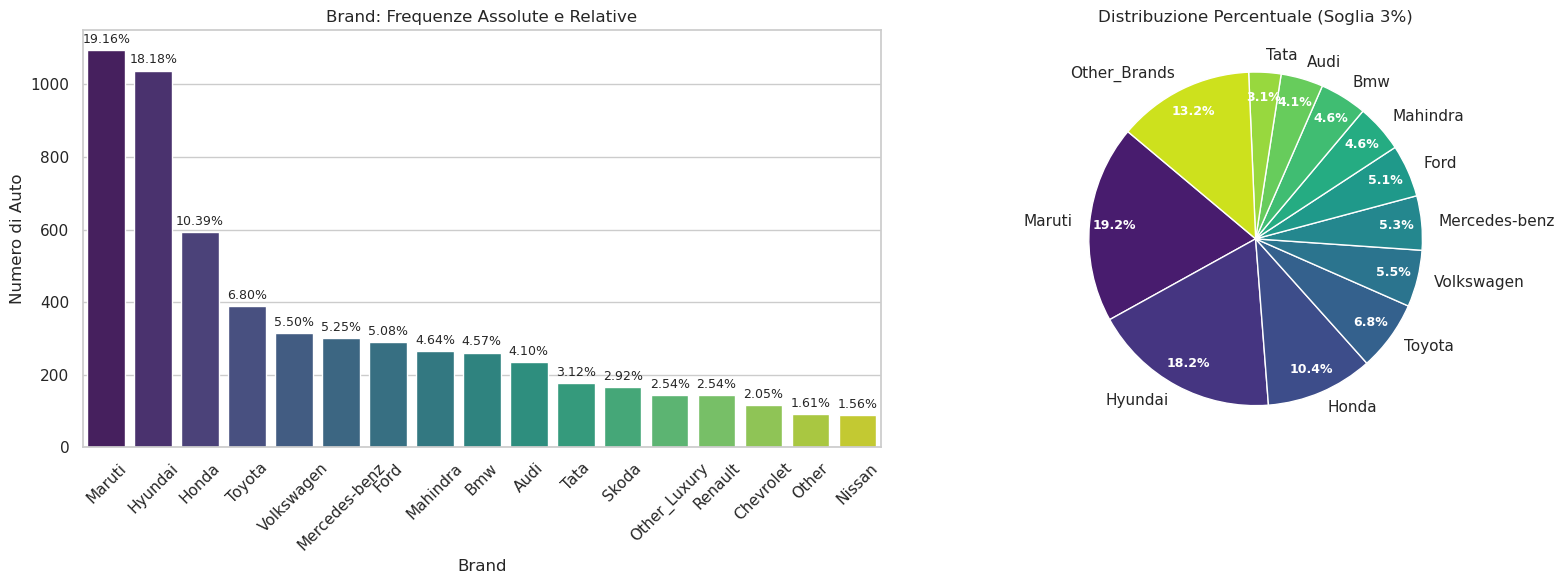

In [577]:
counts_all = df['Brand'].value_counts()
rel_freq_all = df['Brand'].value_counts(normalize=True) * 100

mask_others = rel_freq_all < 3
counts_pie = counts_all[~mask_others].copy()
if mask_others.any():
    counts_pie['Other_Brands'] = counts_all[mask_others].sum()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17, 6))

sns.barplot(x=counts_all.index, y=counts_all.values, hue=counts_all.index, palette='viridis', legend=False, ax=ax1)
for i, container in enumerate(ax1.containers):
    lbl = f'{(counts_all.values[i] / counts_all.sum() * 100):.2f}%'
    ax1.bar_label(container, labels=[lbl], padding=3, fontsize=9)

ax1.set_title('Brand: Frequenze Assolute e Relative')
ax1.tick_params(axis='x', rotation=45)
ax1.set_ylabel('Numero di Auto')
ax1.set_xlabel('Brand')

wedges, texts, autotexts = ax2.pie(counts_pie, labels=counts_pie.index, autopct='%1.1f%%', 
                                  startangle=140, pctdistance=0.85,
                                  colors=sns.color_palette('viridis', len(counts_pie)))

plt.setp(autotexts, size=9, weight="bold", color="white")
ax2.set_title('Distribuzione Percentuale (Soglia 3%)')

plt.tight_layout()
plt.show()

Notiamo:
- Il Brand più comune è Maruti, circa il 20% (quasi 1200) dell auto rivendute è di questa marca nel nostro dataset. Dalle nostre ricerche questo brand è economico, assicura bassi costi di manutenzione ed è il "brand del popolo"
- Il secondo Brand più rivenduto è Hyndai, con il 18% del mercato. Questo è un brand che si colloca un gradico sopra Muruti: interni più curati, più tecnologia.
- Poi una bella fetta di mercato, 12%, è detenuta da Brand più Premium: Honda, Toyota, Volkswagen
- Le auto di lusso coprono solo il 2,5%.
- Brand più Premium come Mercedes, BMW e Audi indieme coprono circa il 13% del mercato


#### Model

Per model andiamo a fare lo stesso prcoedimento fatto per Brand, non stampiamo la tabella di frequenza perché Model ha troppi valori unici.

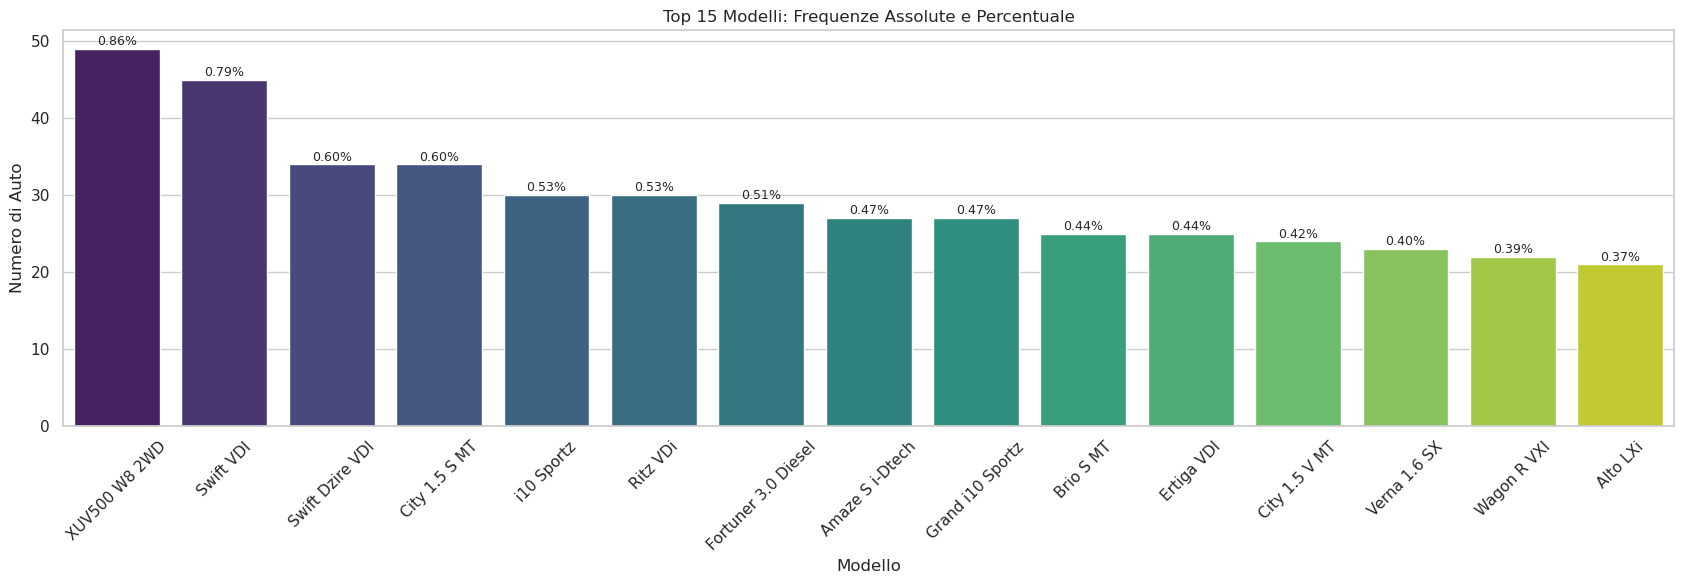

In [578]:
counts_model = df['Model'].value_counts().head(15)
total_count = len(df)

plt.figure(figsize=(17, 6))
sns.barplot(x=counts_model.index, y=counts_model.values, hue=counts_model.index, palette='viridis', legend=False)

for i, val in enumerate(counts_model.values):
    pct = (val / total_count) * 100
    plt.text(i, val + 0.5, f'{pct:.2f}%', ha='center', fontsize=9)

plt.title('Top 15 Modelli: Frequenze Assolute e Percentuale')
plt.xticks(rotation=45)
plt.ylabel('Numero di Auto')
plt.xlabel('Modello')
plt.tight_layout()
plt.show()

Il modello di auto più venduto è il 'Maruti Swift Dzire Vdi

#### Location

In [579]:
tabella_brand = pd.crosstab(index=df['Location'], columns='Frequenza Assoluta')
tabella_brand['Frequenza Relativa (%)'] = (tabella_brand['Frequenza Assoluta'] / tabella_brand['Frequenza Assoluta'].sum() * 100).round(2)
tabella_brand = tabella_brand.sort_values(by='Frequenza Assoluta', ascending=False)
tabella_brand['Frequenza Cumulata (%)'] = tabella_brand['Frequenza Relativa (%)'].cumsum().round(2)

display(tabella_brand)

col_0,Frequenza Assoluta,Frequenza Relativa (%),Frequenza Cumulata (%)
Location,,,
Mumbai,748,13.10,13.10
Hyderabad,696,12.19,25.29
Kochi,633,11.09,36.38
Coimbatore,625,10.95,47.33
Pune,563,9.86,57.19
Delhi,533,9.33,66.52
Kolkata,515,9.02,75.54
Chennai,455,7.97,83.51
Jaipur,388,6.80,90.31


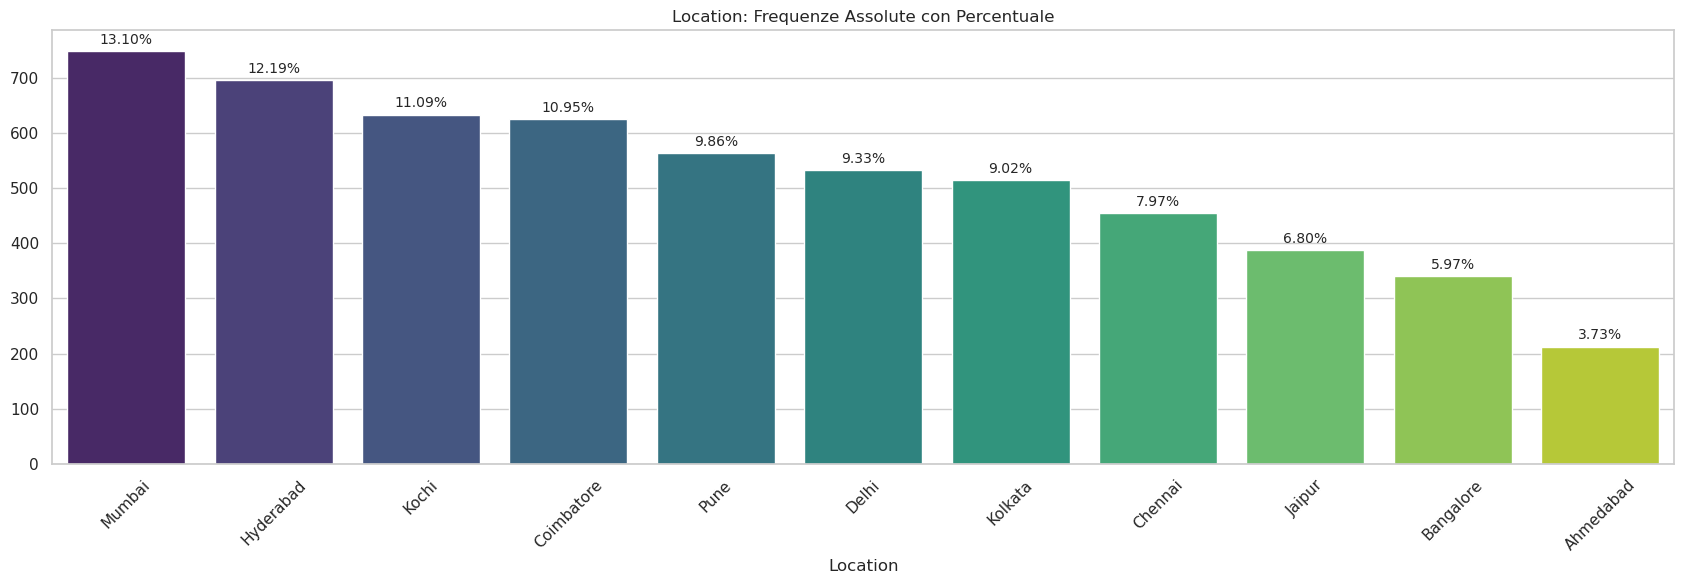

In [580]:
count_assoluto = df['Location'].value_counts()
count_relativo = (df['Location'].value_counts(normalize=True) * 100).loc[count_assoluto.index] 

plt.figure(figsize=(17, 6))

ax = sns.barplot(x=count_assoluto.index, y=count_assoluto.values, hue=count_assoluto.index, palette='viridis', legend=False)

for i, container in enumerate(ax.containers):
    percentuale = count_relativo.iloc[i] 
    
    ax.bar_label(container, labels=[f'{percentuale:.2f}%'], padding=3, fontsize=10)

plt.title('Location: Frequenze Assolute con Percentuale')
plt.xticks(rotation=45)
plt.xlabel('Location')

plt.tight_layout()
plt.show()

Non c'è uno squilibrio netto tra le varie location in cui sono state rivendute le automobili:
- A Mumbai ci sono state più vendite, quasi 800 (il 13%)
- Le 3 città con più rivendite (Mumbai, Hyderabad, Kochi) che coprono il 36% del dataset, sono tutte grandi poli industriali, tra le più sviluppate d'India, che permettono la presenza di una classe media numerosa e dispongono di strare pù sviluppate rispetto alla media nazionale (secondo le nostre ricerche)
- Ahmedabad è il luogo con meno vendite, 210 (il 4%), può essere cuasato da vari fattori, mercato dell'usato certificato poco diffuso, tassazione differente

#### Age

Andiamo le sue misure di tendenza centrale e di dispersione:

In [581]:
col = df['Age']

print(col.describe())

print("")

print("mode: ", col.mode())

print("")

print(f"Skewness: {col.skew():.2f}")
print(f"Kurtosis: {col.kurtosis():.2f}")

count    5710.000000
mean        5.400000
std         2.964802
min         0.000000
25%         3.000000
50%         5.000000
75%         7.000000
max        14.000000
Name: Age, dtype: float64

mode:  0    5
Name: Age, dtype: int64

Skewness: 0.55
Kurtosis: -0.14


Notiamo varie cose:
- **IQR (3-7)**: il **50% dei valori** ha tra i 3-7 anni
- **Media (5.5)** e **Mediana (5)**: vuol dire che abbiamo dei valori che 'spingono' la media verso destra
- **Skewness (0.82)**: notiamo che è assimetrica verso destra, come notato prima
- **Kurtosis (0.90)**: ci indica che ha il picco un po' più schiacciato rispetto alla normale (gaussiana)

Vediamo la sua distribuzione:

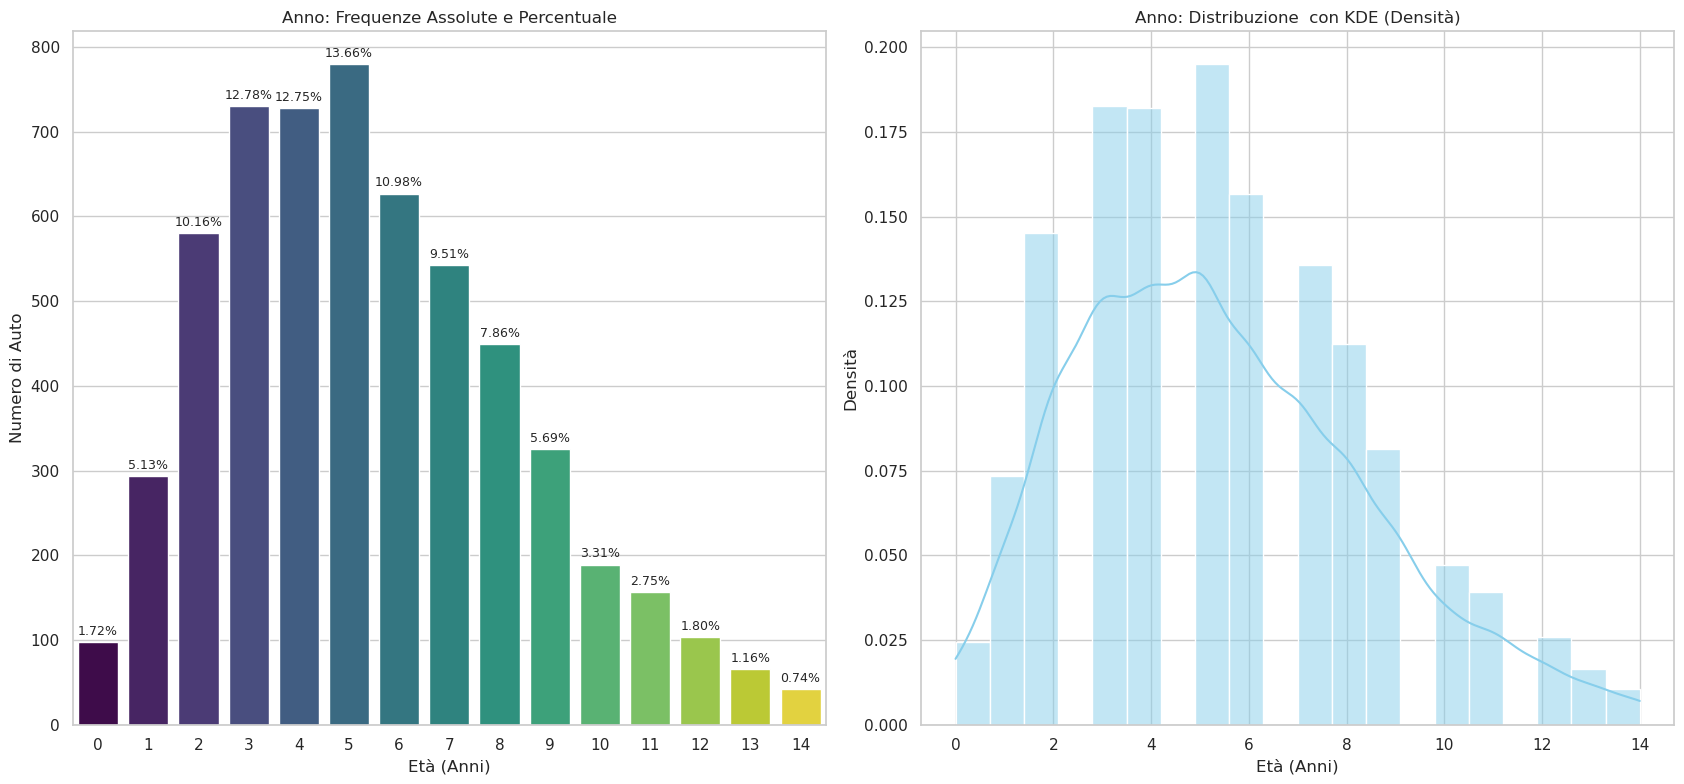

In [582]:
count_assoluto = df['Age'].value_counts().sort_index()
total = count_assoluto.sum()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17, 8))

sns.barplot(
    x=count_assoluto.index, 
    y=count_assoluto.values, 
    hue=count_assoluto.index, 
    palette='viridis', 
    legend=False, 
    ax=ax1
)

for container in ax1.containers:
    labels = [f'{(v/total*100):.2f}%' for v in container.datavalues]
    ax1.bar_label(container, labels=labels, padding=3, fontsize=9)

ax1.set_title('Anno: Frequenze Assolute e Percentuale')
ax1.set_xlabel('Età (Anni)')
ax1.set_ylabel('Numero di Auto')

sns.histplot(df['Age'], kde=True, color='skyblue', bins=20, ax=ax2, stat="density")
ax2.set_title('Anno: Distribuzione  con KDE (Densità)')
ax2.set_xlabel('Età (Anni)')
ax2.set_ylabel('Densità')

plt.tight_layout()
plt.show()

Innanzitutto notiamo che ha una distribuzione a campana, anche detta Distribuzione Gaussiana (o Normale).

Poi ci indica:
- Le auto che hanno 5 anni sembrano essere le più rivendute, 14% (800 auto).
- Si tende a rivendere la propria auto dopo 2-7 anni.

Il dataset contiene poche informazioni per auto oltre gli 11-12 anni, potremmo dire che questa sarà un analisi sullo studio del emrcato delle automobili usate indiane degli ultimi 15 anni circa.

In futuro potremmo fare un confronto con Owner_Type per capire le abitudini delle persone.

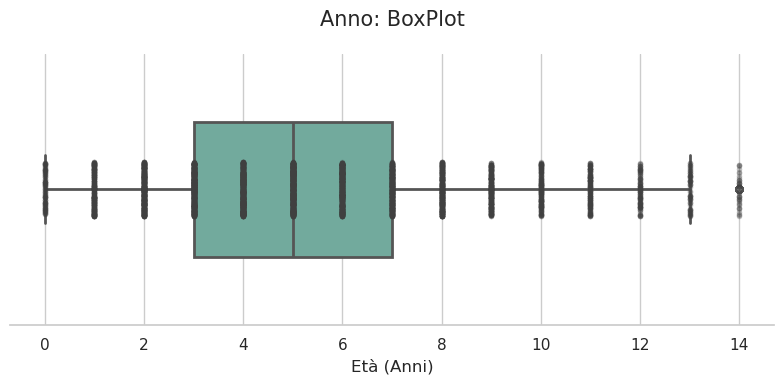

In [583]:
plt.figure(figsize=(8, 4))

sns.set_style("whitegrid")

ax = sns.boxplot(x=df['Age'], color='#69b3a2', width=0.5, linewidth=2, fliersize=5)
sns.stripplot(x=df['Age'], color='#404040', alpha=0.3, size=4, jitter=True)

plt.title('Anno: BoxPlot', fontsize=15, pad=20)
plt.xlabel('Età (Anni)', fontsize=12)

sns.despine(left=True)

plt.tight_layout()
plt.show()

#### Kilometers_Driven

In [584]:
col = df['Kilometers_Driven']

print(col.describe())

print("")

print("mode: ", col.mode())

print("")

print(f"Skewness: {col.skew():.2f}")
print(f"Kurtosis: {col.kurtosis():.2f}")

count      5710.000000
mean      56055.193170
std       32014.984548
min         171.000000
25%       33000.000000
50%       52000.000000
75%       72000.000000
max      170000.000000
Name: Kilometers_Driven, dtype: float64

mode:  0    60000.0
Name: Kilometers_Driven, dtype: float64

Skewness: 1.04
Kurtosis: 1.55


Notiamo varie cose:
- **IQR (3-7)**: il **50% dei valori** ha tra i 3 e i 7 anni di età.
- **Media (5.5)** e **Mediana (5)**: la media superiore alla mediana conferma la presenza di auto più vecchie che "trascinano" il valore medio verso destra.
- **Skewness (0.82)**: il valore positivo indica una **distribuzione asimmetrica a destra**, confermando che la maggior parte dei veicoli è recente, con una coda che si allunga verso le età elevate.
- **Kurtosis (0.90)**: la distribuzione è leggermente **platicurtica**, il che indica un picco più schiacciato e code più leggere rispetto a una distribuzione normale (gaussiana).

Andiamo a vedere la sua distribuzione:

Num. of bins: 35


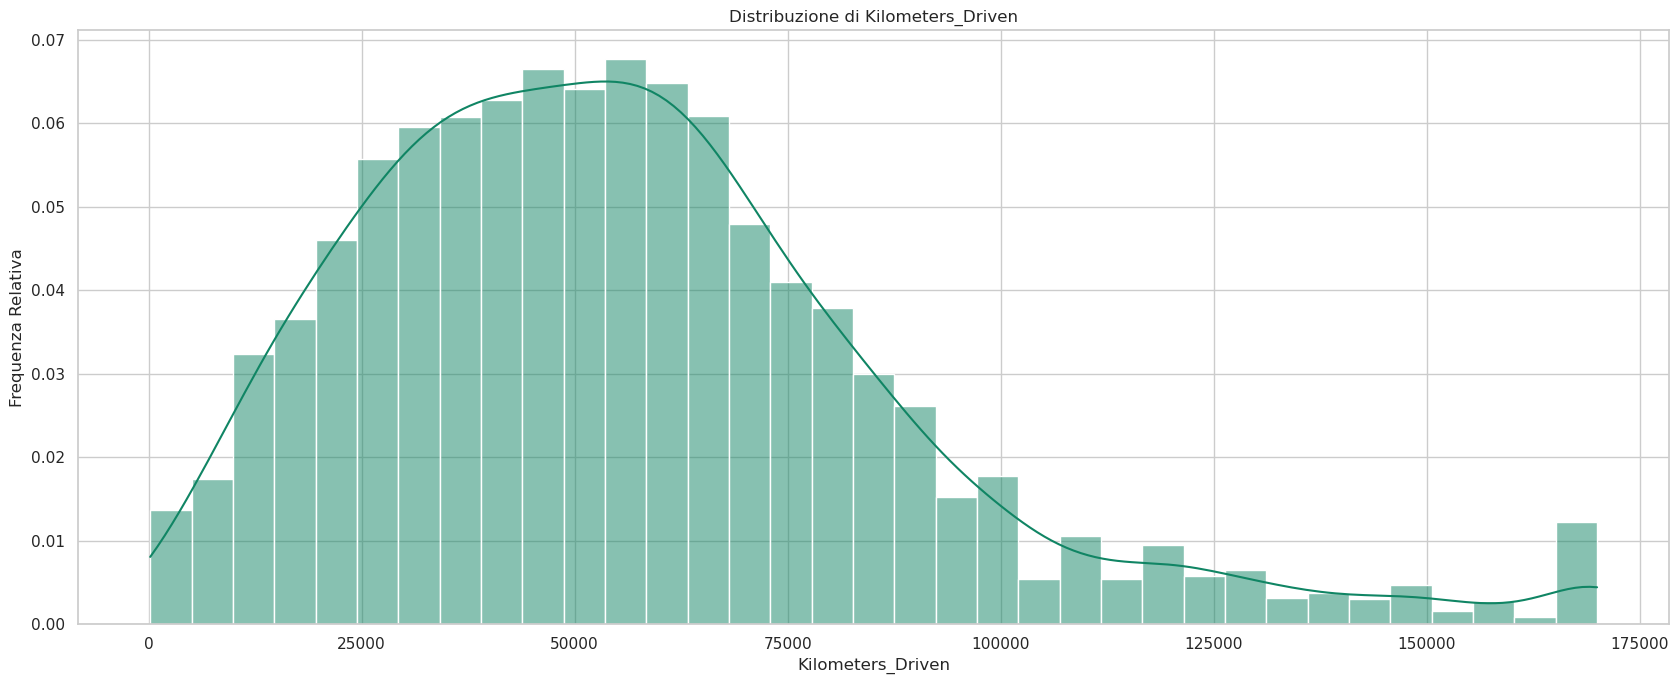

In [585]:
col = df['Kilometers_Driven']

n = len(col)
rice_bins = int(2 * n**(1/3))

print(f"Num. of bins: {rice_bins}")

plt.figure(figsize=(17, 7))


ax = sns.histplot(
    x=col, 
    bins=rice_bins, 
    kde=True, 
    stat='probability',
    color="#108564",
    edgecolor='white'
)
plt.title(f'Distribuzione di Kilometers_Driven')
plt.ylabel('Frequenza Relativa')
plt.xlabel('Kilometers_Driven')

plt.tight_layout()
plt.show()

Questa variabile è un esempio di variabile che in futuro potrbbe avere bisogno di una traformazione logarimtica (pe ril modeling), a causa del fatto che la sua distribuzione segue poco quella Gaussiana.

Vediamo come c'è un'ampia cosa a destra, la maggior parte ha tra i 20.000 e gli 80.000 chilometri.

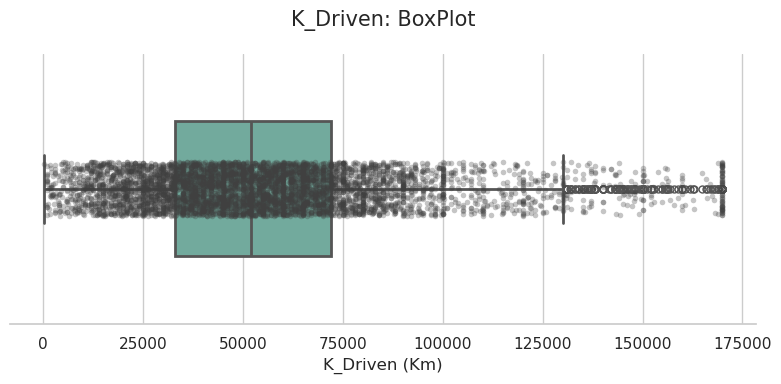

In [586]:
plt.figure(figsize=(8, 4))

sns.set_style("whitegrid")

ax = sns.boxplot(x=df['Kilometers_Driven'], color='#69b3a2', width=0.5, linewidth=2, fliersize=5)
sns.stripplot(x=df['Kilometers_Driven'], color='#404040', alpha=0.3, size=4, jitter=True)

plt.title('K_Driven: BoxPlot', fontsize=15, pad=20)
plt.xlabel('K_Driven (Km)', fontsize=12)

sns.despine(left=True)

plt.tight_layout()
plt.show()

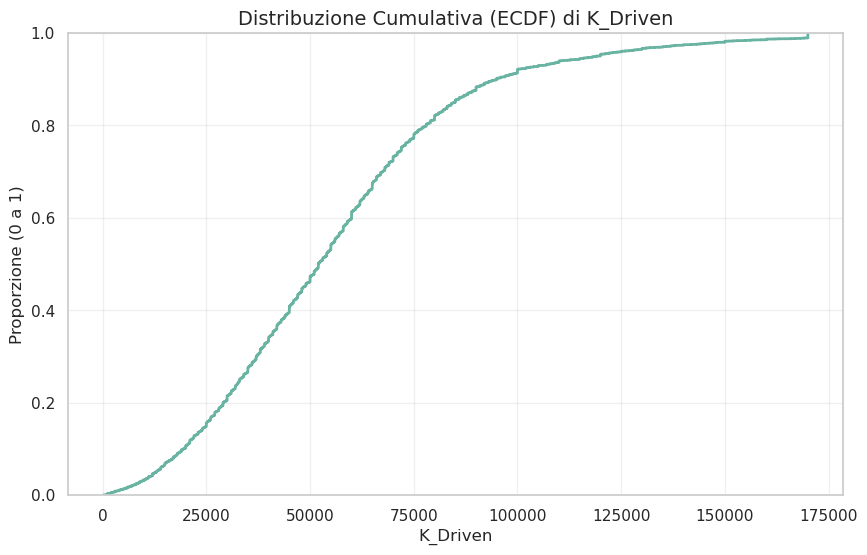

In [587]:
plt.figure(figsize=(10, 6))
sns.ecdfplot(data=df, x='Kilometers_Driven', color='#69b3a2', linewidth=2)
plt.title('Distribuzione Cumulativa (ECDF) di K_Driven', fontsize=14)
plt.xlabel('K_Driven')
plt.ylabel('Proporzione (0 a 1)')
plt.grid(True, alpha=0.3)
plt.show()

- L'80% delle auto vendute ha meno di 77.000 Km
- L'1% circa delle auto ha più di 100.000 Km

#### Fuel_Type

Ricordiamo che Fuel_Type conteneva 5 tipi di etichette
- Diesel
- Petrol
- CNG
- LPG
- Electric

Le utlime tre componevano <1% del dataset, perciò avevamo deciso di ruomere quelle osservazioni.

Andiamoa a vedere la distribuzione:

In [588]:
tabella_brand = pd.crosstab(index=df['Fuel_Type'], columns='Frequenza Assoluta')
tabella_brand['Frequenza Relativa (%)'] = (tabella_brand['Frequenza Assoluta'] / tabella_brand['Frequenza Assoluta'].sum() * 100).round(2)
tabella_brand = tabella_brand.sort_values(by='Frequenza Assoluta', ascending=False)
tabella_brand['Frequenza Cumulata (%)'] = tabella_brand['Frequenza Relativa (%)'].cumsum().round(2)

display(tabella_brand)

col_0,Frequenza Assoluta,Frequenza Relativa (%),Frequenza Cumulata (%)
Fuel_Type,,,
Diesel,3116,54.57,54.57
Petrol,2594,45.43,100.00


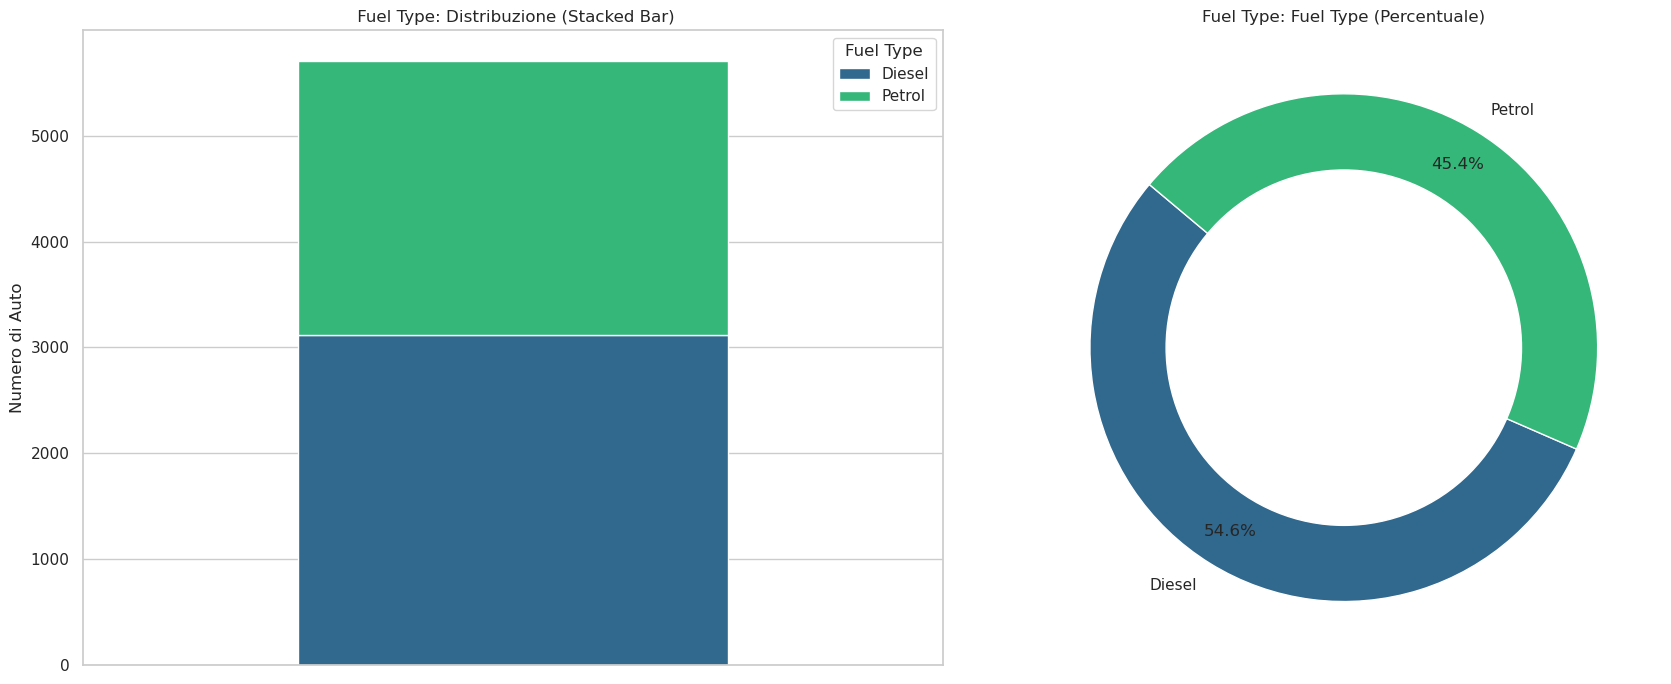

In [589]:
counts = df['Fuel_Type'].value_counts()
df_stacked = pd.DataFrame(counts).T

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

df_stacked.plot(kind='bar', stacked=True, ax=ax1, color=sns.color_palette('viridis', len(counts)))
ax1.set_title(' Fuel Type: Distribuzione (Stacked Bar)')
ax1.set_ylabel('Numero di Auto')
ax1.set_xticks([])
ax1.legend(title='Fuel Type')

ax2.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, 
        colors=sns.color_palette('viridis', len(counts)), pctdistance=0.85)
ax2.add_artist(plt.Circle((0,0), 0.70, fc='white'))
ax2.set_title('Fuel Type: Fuel Type (Percentuale)')

plt.tight_layout()
plt.show()

Si rivendono auto a Diesel e a Petrol nella stessa quantità, con una piccola preferenza per quelle a Diesel (54%, circa 3000 auto)

#### Transmission

Vediamo la sua distribuzione:

In [590]:
tabella_brand = pd.crosstab(index=df['Transmission'], columns='Frequenza Assoluta')
tabella_brand['Frequenza Relativa (%)'] = (tabella_brand['Frequenza Assoluta'] / tabella_brand['Frequenza Assoluta'].sum() * 100).round(2)
tabella_brand = tabella_brand.sort_values(by='Frequenza Assoluta', ascending=False)
tabella_brand['Frequenza Cumulata (%)'] = tabella_brand['Frequenza Relativa (%)'].cumsum().round(2)

display(tabella_brand)

col_0,Frequenza Assoluta,Frequenza Relativa (%),Frequenza Cumulata (%)
Transmission,,,
Manual,4038,70.72,70.72
Automatic,1672,29.28,100.00


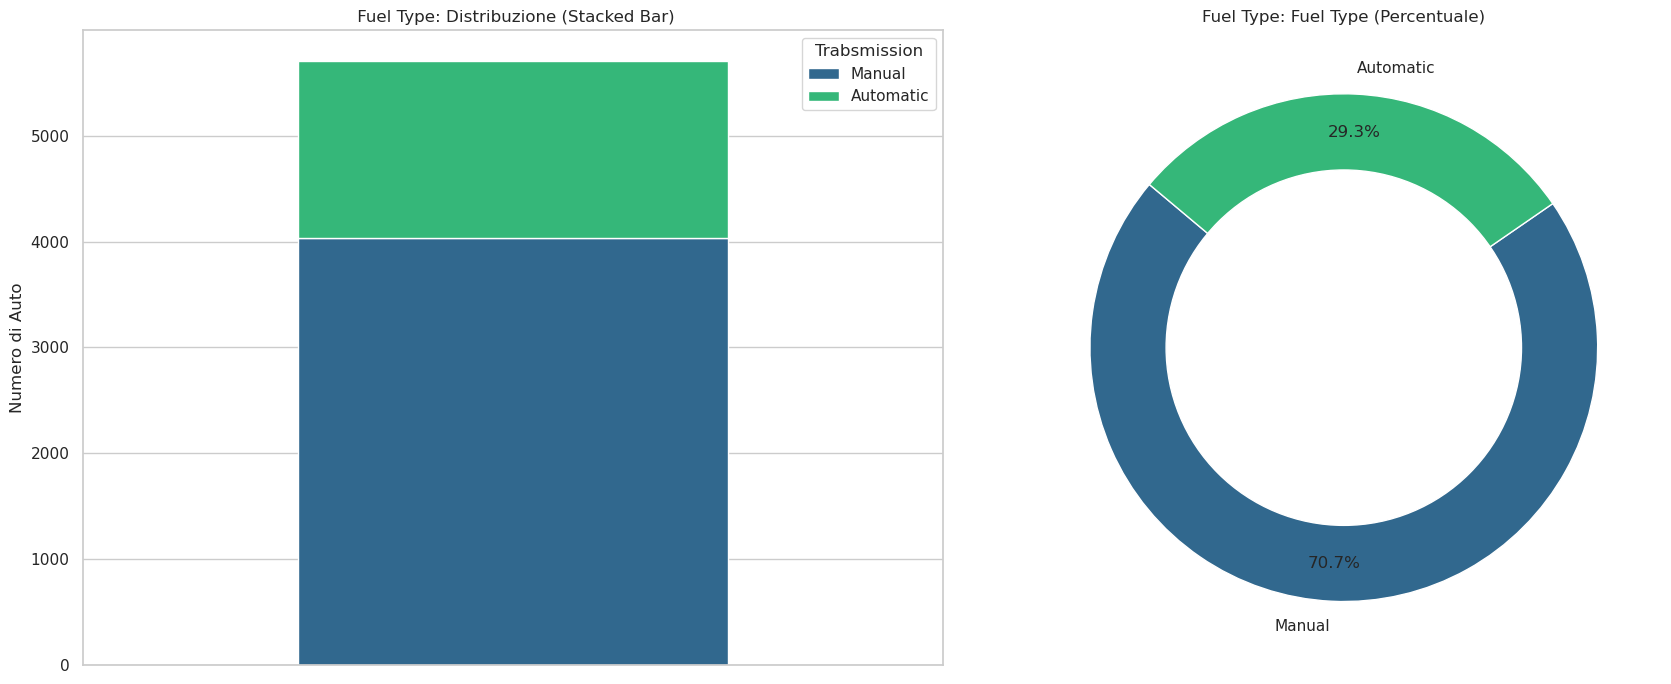

In [591]:
counts = df['Transmission'].value_counts()
df_stacked = pd.DataFrame(counts).T

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

df_stacked.plot(kind='bar', stacked=True, ax=ax1, color=sns.color_palette('viridis', len(counts)))
ax1.set_title(' Fuel Type: Distribuzione (Stacked Bar)')
ax1.set_ylabel('Numero di Auto')
ax1.set_xticks([])
ax1.legend(title='Trabsmission')

ax2.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, 
        colors=sns.color_palette('viridis', len(counts)), pctdistance=0.85)
ax2.add_artist(plt.Circle((0,0), 0.70, fc='white'))
ax2.set_title('Fuel Type: Fuel Type (Percentuale)')

plt.tight_layout()
plt.show()

Le auto Manual sono preferite (70%, 4000 auto) rispetto a quelle Automatic (30%)

#### Owner_Type

In [592]:
tabella_brand = pd.crosstab(index=df['Owner_Type'], columns='Frequenza Assoluta')
tabella_brand['Frequenza Relativa (%)'] = (tabella_brand['Frequenza Assoluta'] / tabella_brand['Frequenza Assoluta'].sum() * 100).round(2)
tabella_brand = tabella_brand.sort_values(by='Frequenza Assoluta', ascending=False)
tabella_brand['Frequenza Cumulata (%)'] = tabella_brand['Frequenza Relativa (%)'].cumsum().round(2)

display(tabella_brand)

col_0,Frequenza Assoluta,Frequenza Relativa (%),Frequenza Cumulata (%)
Owner_Type,,,
First,4739,82.99,82.99
Second,878,15.38,98.37
Third,93,1.63,100.00


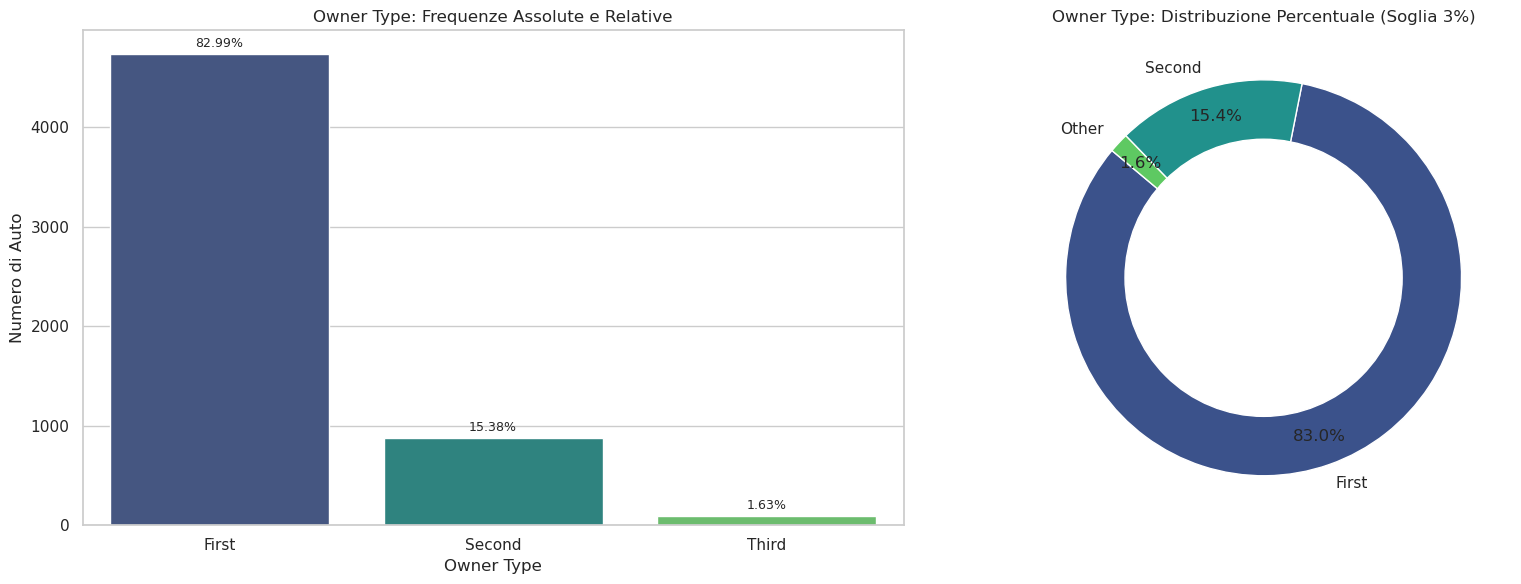

In [593]:
counts_all = df['Owner_Type'].value_counts()
rel_freq_all = df['Owner_Type'].value_counts(normalize=True) * 100

mask_others = rel_freq_all < 3
counts_pie = counts_all[~mask_others].copy()
if mask_others.any():
    counts_pie['Other'] = counts_all[mask_others].sum()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17, 6))

sns.barplot(x=counts_all.index, y=counts_all.values, hue=counts_all.index, palette='viridis', legend=False, ax=ax1)
for i, container in enumerate(ax1.containers):
    lbl = f'{(counts_all.values[i] / counts_all.sum() * 100):.2f}%'
    ax1.bar_label(container, labels=[lbl], padding=3, fontsize=9)

ax1.set_title('Owner Type: Frequenze Assolute e Relative')
ax1.tick_params(axis='x', rotation=0)
ax1.set_ylabel('Numero di Auto')
ax1.set_xlabel('Owner Type')

ax2.pie(counts_pie, labels=counts_pie.index, autopct='%1.1f%%', startangle=140, 
        colors=sns.color_palette('viridis', len(counts_pie)), pctdistance=0.85)
ax2.add_artist(plt.Circle((0,0), 0.70, fc='white'))
ax2.set_title('Owner Type: Distribuzione Percentuale (Soglia 3%)')

plt.tight_layout()
plt.show()

- Vediamo come si preferisce comprare automobili che hanno avuto massimo un solo proprietario (82%). Potrebbe essere dovuto al fatto che automobili con più priprietari sono molto usurate e quindi difficili da rivendere.
- Ma c'è spazio anche per le auto con 2 propreitari pregressi (15%)

#### Mileage

Andiamo le sue misure di tendenza centrale e di dispersione:

In [594]:
col = df['Mileage']

print(col.describe())

print("")

print("mode: ", col.mode())

print("")

print(f"Skewness: {col.skew():.2f}")
print(f"Kurtosis: {col.kurtosis():.2f}")

count    5710.000000
mean       17.901401
std         4.129187
min         6.000000
25%        15.000000
50%        18.000000
75%        21.000000
max        28.000000
Name: Mileage, dtype: float64

mode:  0    18
Name: Mileage, dtype: int64

Skewness: 0.13
Kurtosis: -0.46


Notiamo varie cose:
- **IQR (15-21)**: il **50% dei valori** presenta un'efficienza compresa tra 15 e 21 km/l.
- **Media (17.87)**, **Mediana (18)** e **Moda (18)**: la coincidenza quasi perfetta tra questi tre indici suggerisce una distribuzione molto equilibrata e centrata.
- **Skewness (0.13)**: il valore è vicino allo zero, indicando che la distribuzione è **sostanzialmente simmetrica**, con una leggerissima asimmetria verso destra che non inficia la qualità del dato.
- **Kurtosis (-0.46)**: il valore negativo indica una distribuzione **platicurtica**. Il picco è più schiacciato rispetto a una gaussiana standard e le code sono più leggere, segno che i valori sono distribuiti in modo più uniforme intorno alla media senza eccessive concentrazioni.

Num. of bins: 23


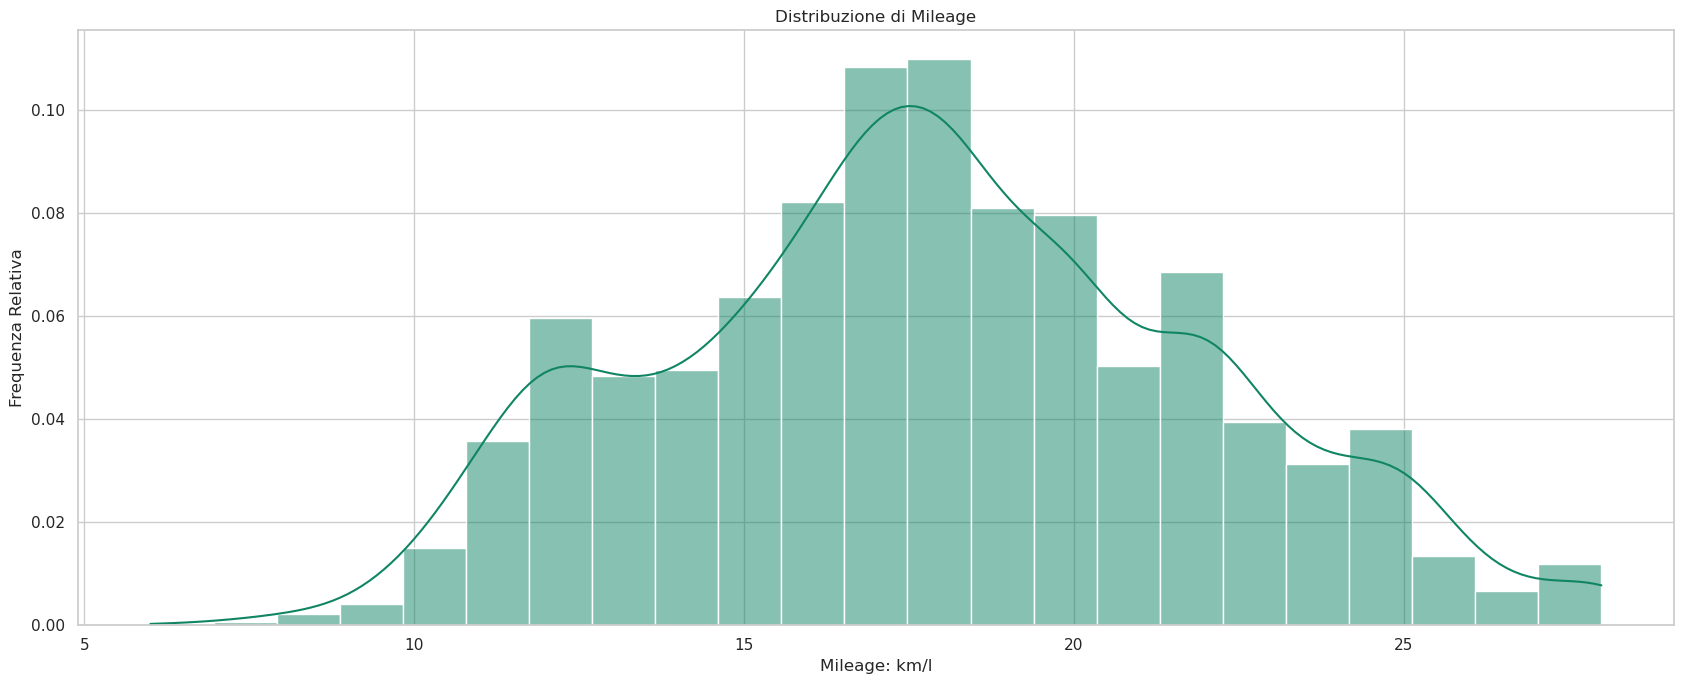

In [595]:
col = df['Mileage']

n = len(col)
rice_bins = 23

print(f"Num. of bins: {rice_bins}")

plt.figure(figsize=(17, 7))


ax = sns.histplot(
    x=col, 
    bins=rice_bins, 
    kde=True, 
    stat='probability',
    color="#108564",
    edgecolor='white'
)
plt.title(f'Distribuzione di Mileage')
plt.ylabel('Frequenza Relativa')
plt.xlabel('Mileage: km/l')

plt.tight_layout()
plt.show()

- Presenta una cosa a sinistra, si rivendono auto veramente molto efficienti.
- Molte auto hanno un efficienza di 18 km/l

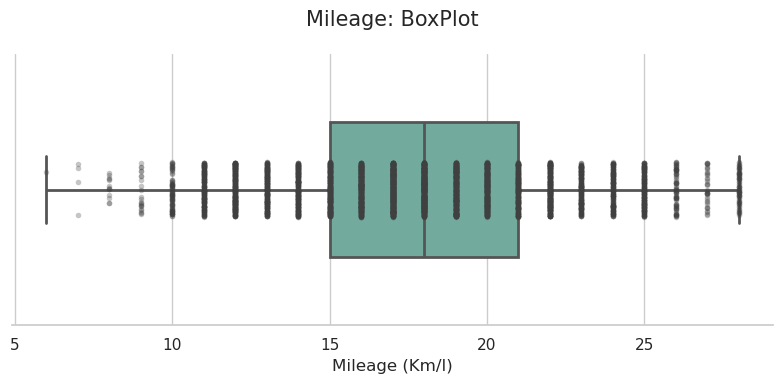

In [596]:
plt.figure(figsize=(8, 4))

sns.set_style("whitegrid")

ax = sns.boxplot(x=df['Mileage'], color='#69b3a2', width=0.5, linewidth=2, fliersize=5)
sns.stripplot(x=df['Mileage'], color='#404040', alpha=0.3, size=4, jitter=True)

plt.title('Mileage: BoxPlot', fontsize=15, pad=20)
plt.xlabel('Mileage (Km/l)', fontsize=12)

sns.despine(left=True)

plt.tight_layout()
plt.show()

Molto ben distribuita.

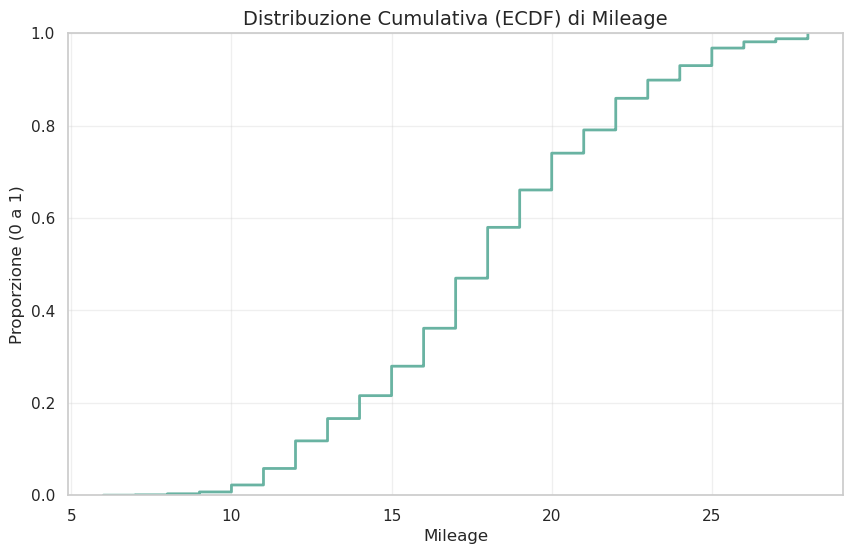

In [597]:
plt.figure(figsize=(10, 6))
sns.ecdfplot(data=df, x='Mileage', color='#69b3a2', linewidth=2)
plt.title('Distribuzione Cumulativa (ECDF) di Mileage', fontsize=14)
plt.xlabel('Mileage')
plt.ylabel('Proporzione (0 a 1)')
plt.grid(True, alpha=0.3)
plt.show()

- L'80% delle auto rivendute ha un efficienza minore 22km/l
- Un 20% minore di 14 km/l
- C'è una bella fetta di mercato per auto a efficienza bassa (20%), indicano le auto con grandi motori, le auto sportive.

#### Engine

Andiamo a calcolare gli indici statistici:

In [598]:
col = df['Engine']

print(col.describe())

print("")

print("mode: ", col.mode())

print("")

print(f"Skewness: {col.skew():.2f}")
print(f"Kurtosis: {col.kurtosis():.2f}")

count    5710.000000
mean     1629.853240
std       598.644308
min       624.000000
25%      1198.000000
50%      1497.000000
75%      1991.000000
max      5998.000000
Name: Engine, dtype: float64

mode:  0    1197
Name: Engine, dtype: int64

Skewness: 1.43
Kurtosis: 3.24



Notiamo varie cose:
- **IQR (1198-1991)**: il **50% dei valori** presenta una cilindrata compresa tra 1198 cc e 1991 cc.
- **Media (1627.8)** e **Mediana (1496)**: la media sensibilmente superiore alla mediana indica la presenza di motori di grande cilindrata che "tirano" il valore medio verso l'alto.
- **Skewness (1.43)**: il valore conferma una **forte asimmetria positiva** (verso destra). La maggior parte delle auto ha motori di piccola o media cilindrata, con una lunga coda rappresentata da veicoli con motorizzazioni elevate.
- **Kurtosis (3.22)**: il valore indica una distribuzione **leptocurtica**. Presenta un picco molto pronunciato e **code pesanti**, segnalando una concentrazione elevata attorno a certi valori (come confermato dalla moda) e la presenza di outlier significativi nelle cilindrate massime (fino a 5998 cc).

Num. of bins: 40


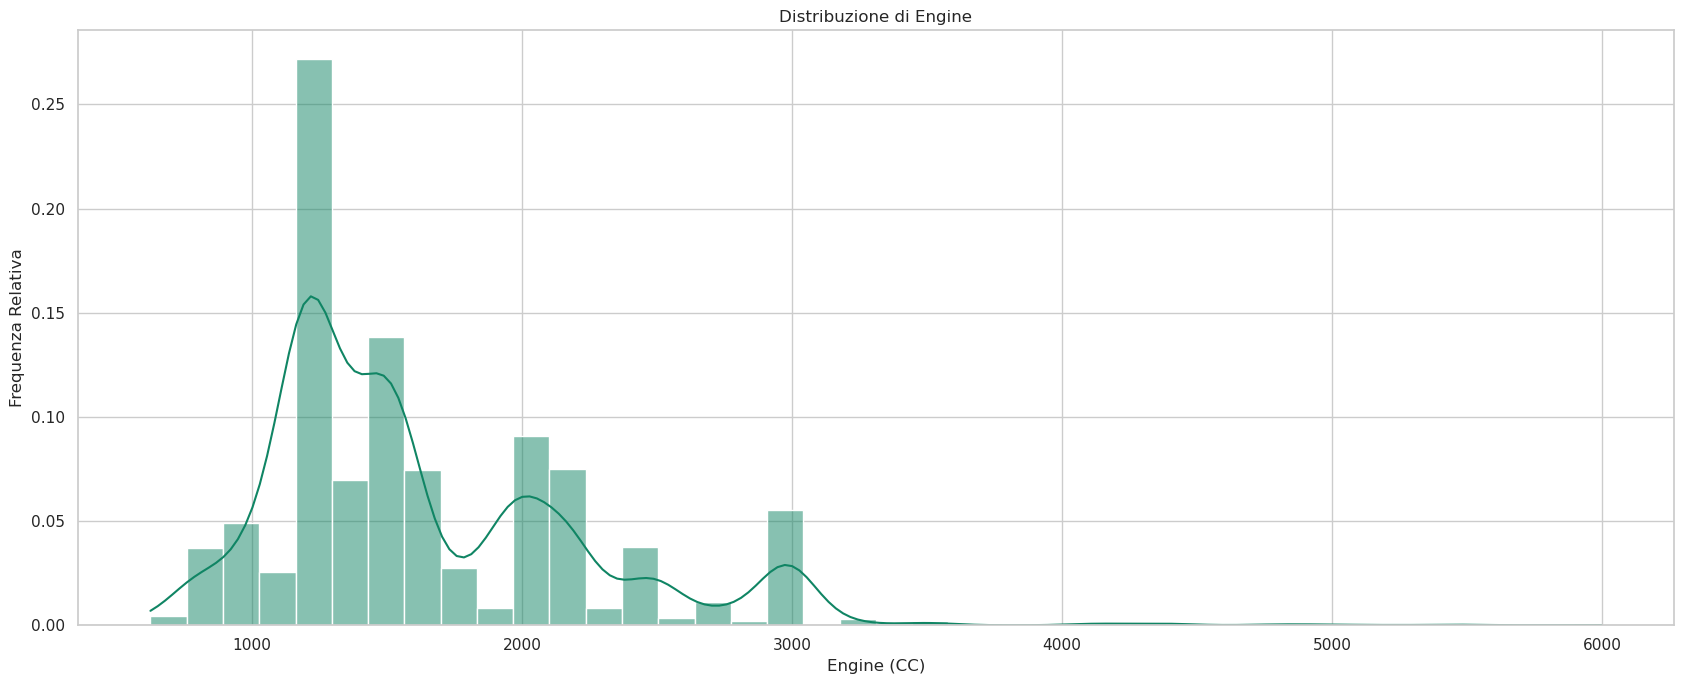

In [599]:
col = df['Engine']

n = len(col)
rice_bins =  40

print(f"Num. of bins: {rice_bins}")

plt.figure(figsize=(17, 7))


ax = sns.histplot(
    x=col, 
    bins=rice_bins, 
    kde=True, 
    stat='probability',
    color="#108564",
    edgecolor='white'
)
plt.title(f'Distribuzione di Engine')
plt.ylabel('Frequenza Relativa')
plt.xlabel('Engine (CC)')

plt.tight_layout()
plt.show()

Ha una distribuzione molto densa per un certo range di valori ed è tanto tirata verso destra. Pure qua applicheremo una traformazione logaritmica.
- Oltre il 25% delle auto ha una cilindrata di circa 1200 CC, un ulteriore conferma della dominazione delle auto ad uso popolare, non troppo potenti
- La presenza di auto di lusso nel dataset, che posseggono quindi un motore più potente, causa questa distribuzione

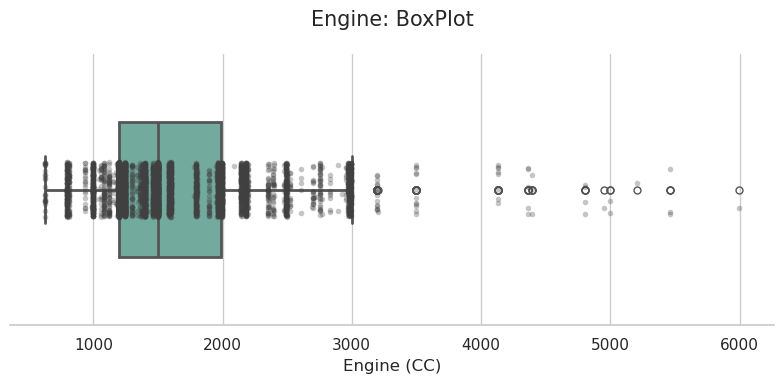

In [600]:
plt.figure(figsize=(8, 4))

sns.set_style("whitegrid")

ax = sns.boxplot(x=df['Engine'], color='#69b3a2', width=0.5, linewidth=2, fliersize=5)
sns.stripplot(x=df['Engine'], color='#404040', alpha=0.3, size=4, jitter=True)

plt.title('Engine: BoxPlot', fontsize=15, pad=20)
plt.xlabel('Engine (CC)', fontsize=12)

sns.despine(left=True)

plt.tight_layout()
plt.show()

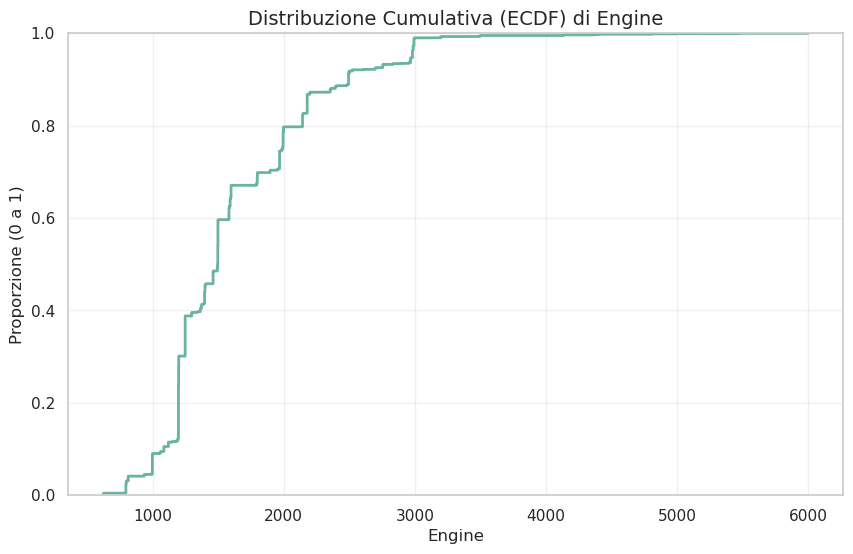

In [601]:
plt.figure(figsize=(10, 6))
sns.ecdfplot(data=df, x='Engine', color='#69b3a2', linewidth=2)
plt.title('Distribuzione Cumulativa (ECDF) di Engine', fontsize=14)
plt.xlabel('Engine')
plt.ylabel('Proporzione (0 a 1)')
plt.grid(True, alpha=0.3)
plt.show()

- Oltre il 90% delle auto ha una cilindrata minore di 3000 CC
- il 60% delle osservazioni hanno una cilindrata tra i 1200 e i 2000 CC

#### Power

Ci aspettiamo che questa variabile abbia una distribuzione molto simile ad Engine

Andiamo le sue misure di tendenza centrale e di dispersione:

In [602]:
col = df['Power']

print(col.describe())

print("")

print("mode: ", col.mode())

print("")

print(f"Skewness: {col.skew():.2f}")
print(f"Kurtosis: {col.kurtosis():.2f}")

count    5710.000000
mean      114.032371
std        53.857492
min        34.200000
25%        78.900000
50%        98.600000
75%       140.000000
max       560.000000
Name: Power, dtype: float64

mode:  0    74.0
Name: Power, dtype: float64

Skewness: 1.93
Kurtosis: 6.62



Notiamo varie cose:
- **IQR (78-138.1)**: il **50% dei valori** presenta una potenza compresa tra 78 bhp e 138.1 bhp.
- **Media (113.7)** e **Mediana (98.6)**: lo scarto tra media e mediana evidenzia l'influenza di veicoli ad alte prestazioni che spostano il baricentro della distribuzione verso destra.
- **Skewness (1.93)**: il valore indica una **forte asimmetria positiva**. La maggior parte del campione è composto da auto con potenza contenuta, mentre la coda destra è molto estesa a causa di modelli sportivi o di lusso.
- **Kurtosis (6.60)**: l'alto valore di curtosi indica una distribuzione decisamente **leptocurtica**. Il picco intorno alla moda (74 bhp) è estremamente sottile e le **code sono molto pesanti**, confermando la presenza di outlier estremi (fino a 560 bhp) che si discostano drasticamente dalla massa dei dati.

Num. of bins: 35


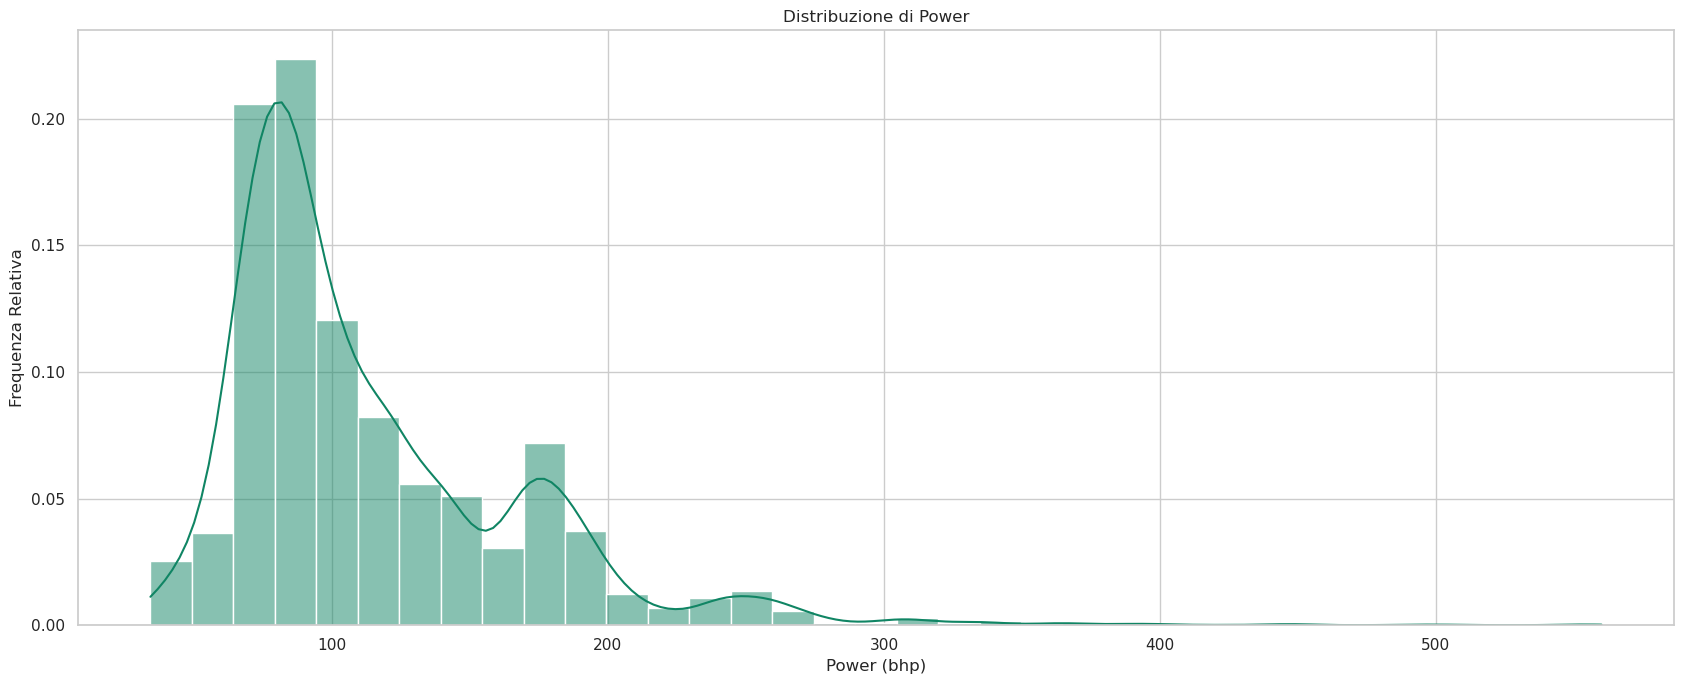

In [603]:
col = df['Power']

n = len(col)
rice_bins = int(2 * n**(1/3))

print(f"Num. of bins: {rice_bins}")

plt.figure(figsize=(17, 7))


ax = sns.histplot(
    x=col, 
    bins=rice_bins, 
    kde=True, 
    stat='probability',
    color="#108564",
    edgecolor='white'
)
plt.title(f'Distribuzione di Power')
plt.ylabel('Frequenza Relativa')
plt.xlabel('Power (bhp)')

plt.tight_layout()
plt.show()

Stesso discorso fatto per Engine. Molto tirata a destra e la maggior parte delle auto hanno una potenza contenuta.

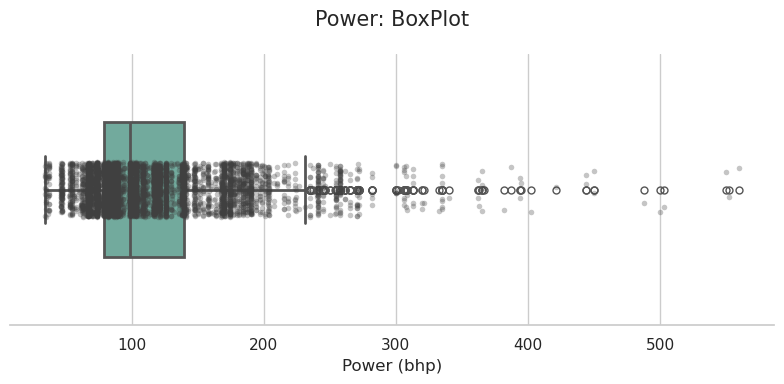

In [604]:
plt.figure(figsize=(8, 4))

sns.set_style("whitegrid")

ax = sns.boxplot(x=df['Power'], color='#69b3a2', width=0.5, linewidth=2, fliersize=5)
sns.stripplot(x=df['Power'], color='#404040', alpha=0.3, size=4, jitter=True)

plt.title('Power: BoxPlot', fontsize=15, pad=20)
plt.xlabel('Power (bhp)', fontsize=12)

sns.despine(left=True)

plt.tight_layout()
plt.show()

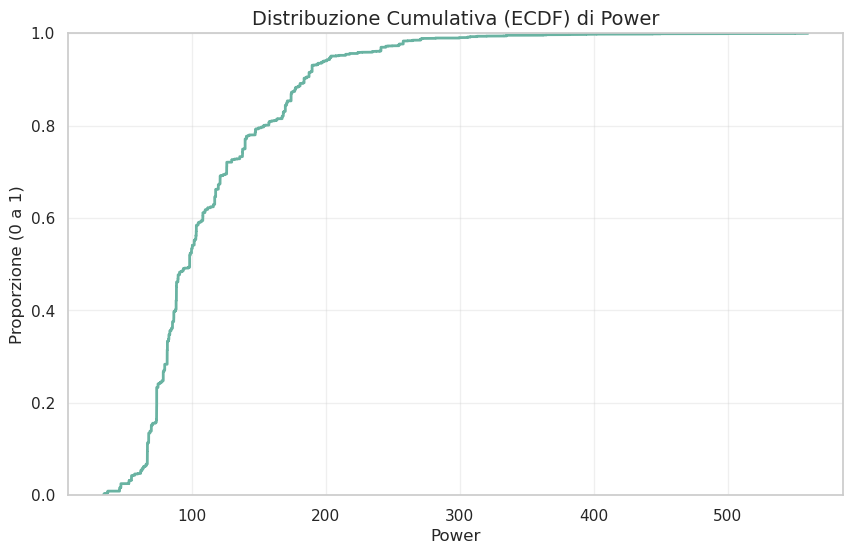

In [605]:
plt.figure(figsize=(10, 6))
sns.ecdfplot(data=df, x='Power', color='#69b3a2', linewidth=2)
plt.title('Distribuzione Cumulativa (ECDF) di Power', fontsize=14)
plt.xlabel('Power')
plt.ylabel('Proporzione (0 a 1)')
plt.grid(True, alpha=0.3)
plt.show()

#### Categoria di Veicolo

Questa è la variabile con cui abbiamo precedentemente sostituito Seats, indicando adesso la cateogoria del veicolo in base al numro di posti.

In [606]:
tabella_brand = pd.crosstab(index=df['Cat'], columns='Frequenza Assoluta')
tabella_brand['Frequenza Relativa (%)'] = (tabella_brand['Frequenza Assoluta'] / tabella_brand['Frequenza Assoluta'].sum() * 100).round(2)
tabella_brand = tabella_brand.sort_values(by='Frequenza Assoluta', ascending=False)
tabella_brand['Frequenza Cumulata (%)'] = tabella_brand['Frequenza Relativa (%)'].cumsum().round(2)

display(tabella_brand)

col_0,Frequenza Assoluta,Frequenza Relativa (%),Frequenza Cumulata (%)
Cat,,,
Standard,4872,85.32,85.32
Large,825,14.45,99.77
Sports,13,0.23,100.00


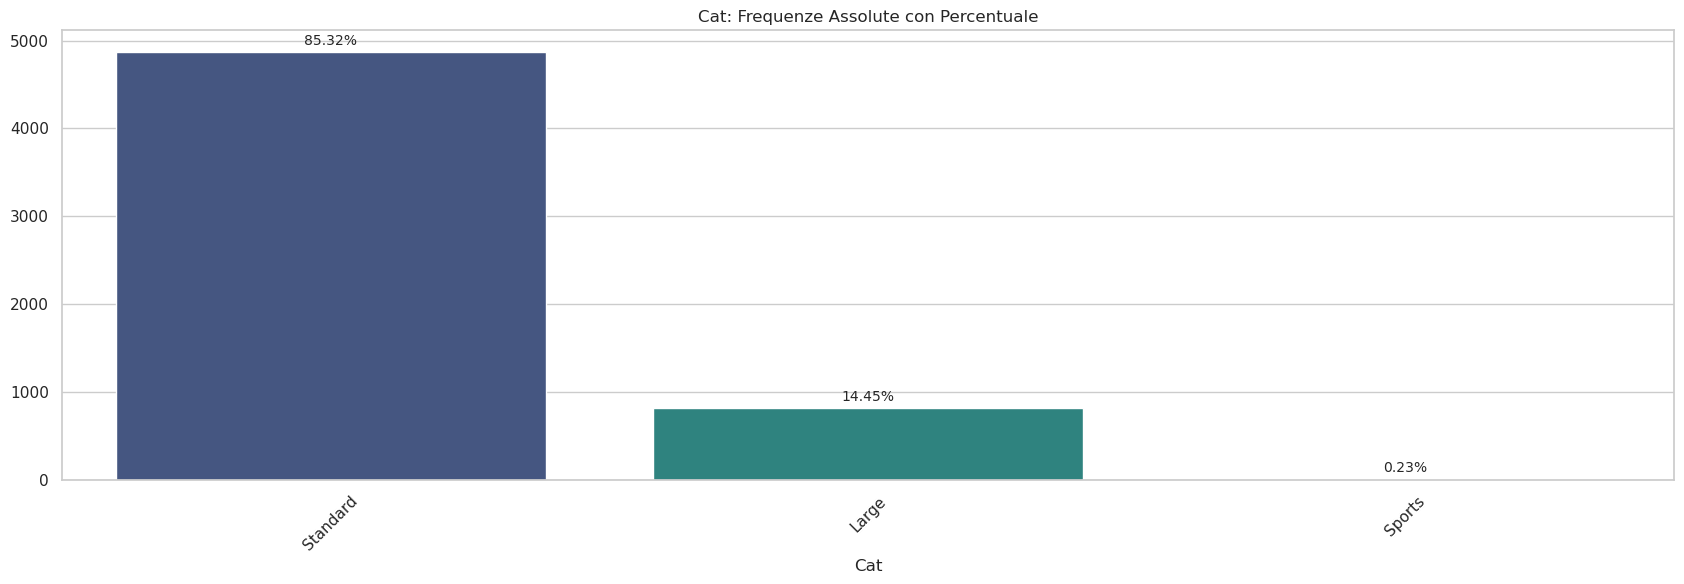

In [607]:
count_assoluto = df['Cat'].value_counts()
count_relativo = (df['Cat'].value_counts(normalize=True) * 100).loc[count_assoluto.index] 

plt.figure(figsize=(17, 6))

ax = sns.barplot(x=count_assoluto.index, y=count_assoluto.values, hue=count_assoluto.index, palette='viridis', legend=False)

for i, container in enumerate(ax.containers):
    percentuale = count_relativo.iloc[i] 
    
    ax.bar_label(container, labels=[f'{percentuale:.2f}%'], padding=3, fontsize=10)

plt.title('Cat: Frequenze Assolute con Percentuale')
plt.xticks(rotation=45)
plt.xlabel('Cat')

plt.tight_layout()
plt.show()

- Il mercato è dominato da auto standard (4 e 5 posti), 85%
- C'è una piccola fetta anche per auto di dimensioni più large 14%
- Le auto sportive, che tipicamente hanno 2 posti, sono molto poche

In [608]:
df.head()

,Brand,Model,Location,Age,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Price,Cat,Has_New_Price,New_Price_num
0,Hyundai,Creta 1.6 CRDi SX Option,Pune,4,41000.0,Diesel,Manual,First,19,1582,126.20,12.50,Standard,0,0.00
1,Honda,Jazz V,Chennai,8,46000.0,Petrol,Manual,First,18,1199,88.70,4.50,Standard,1,8.61
2,Maruti,Ertiga VDI,Chennai,7,87000.0,Diesel,Manual,First,20,1248,88.76,6.00,Large,0,0.00
3,Audi,A4 New 2.0 TDI Multitronic,Coimbatore,6,40670.0,Diesel,Automatic,Second,15,1968,140.80,17.74,Standard,0,0.00
4,Nissan,Micra Diesel XV,Jaipur,6,86999.0,Diesel,Manual,First,23,1461,63.10,3.50,Standard,0,0.00


#### Has_New_Price e New_Price_Num

Queste due indicavano -
- per quali auto avessimo informazioni circa il prezzo da "auto nuova" del proprio modello
- il loro prezzo in caso ci fosse

Abbiamo già fatto sopra una piccola analisi di New_Price_Num, perché volevamo capire meglio questa feature prima di gestirla:
- Auto che hanno New_Price sono più giovani, costano d più
- Pensiamo siano le auto ancora in produzione di cui si può ancora reperire il prezzo di listino

#### Price

Ricordiamo che il prezzo è espresso in Lahks, in cui 1 unità di Lahks equivale a 100.000. È comunemente usata per indicare cifre in Rupie indiane (INR) o pakistane (PKR). Ad esempio, "5 Lahks di Rupie" significa 500.000 Rupie.

In [609]:
col = df['Price']

print(col.describe())

print("")

print("mode: ", col.mode())

print("")

print(f"Skewness: {col.skew():.2f}")
print(f"Kurtosis: {col.kurtosis():.2f}")

count    5710.000000
mean        9.697207
std        11.240343
min         0.440000
25%         3.650000
50%         5.800000
75%        10.250000
max       160.000000
Name: Price, dtype: float64

mode:  0    4.5
Name: Price, dtype: float64

Skewness: 3.34
Kurtosis: 17.25



Andiamo a calcolare gli indici statistici:
- **IQR (3.59-10.10)**: il **50% dei valori** (il cuore del mercato) si concentra in una fascia di prezzo relativamente bassa, tra 3.59 e 10.10 unità.
- **Media (9.61)** e **Mediana (5.75)**: la media è quasi il doppio della mediana. Questo distacco netto indica che i prezzi estremamente alti delle auto di lusso "tirano" la media verso l'alto, non rappresentando bene l'auto "tipica".
- **Skewness (3.35)**: il valore indica un'**altissima asimmetria positiva**. La distribuzione ha una coda lunghissima verso destra; mentre la maggior parte delle auto costa poco, esistono pochi esemplari con prezzi elevatissimi.
- **Kurtosis (17.34)**: questo è il dato più estremo. Una curtosi così elevata indica una distribuzione **fortemente leptocurtica** con code pesantissime. Significa che gli outlier (il prezzo massimo di 160 rispetto alla mediana di 5.75) sono molto distanti dal resto dei dati.

L'elevata Skewness e Kurtosis suggeriscono che il **Price** trarrebbe grande beneficio da una **trasformazione logaritmica** per normalizzare la distribuzione per una fase di training del modello.

Num. of bins: 35


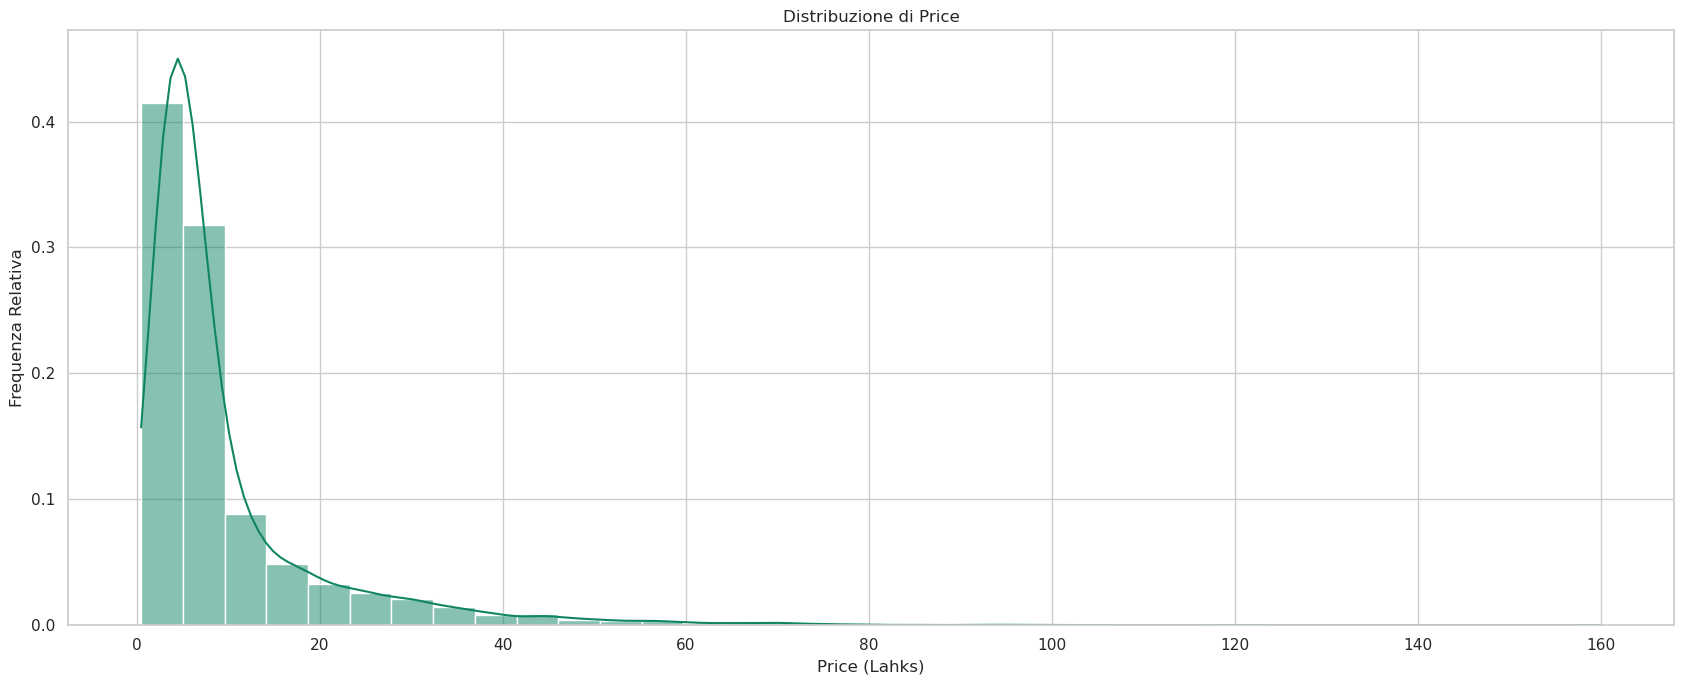

In [610]:
col = df['Price']

n = len(col)
rice_bins = int(2 * n**(1/3))

print(f"Num. of bins: {rice_bins}")

plt.figure(figsize=(17, 7))


ax = sns.histplot(
    x=col, 
    bins=rice_bins, 
    kde=True, 
    stat='probability',
    color="#108564",
    edgecolor='white'
)
plt.title(f'Distribuzione di Price')
plt.ylabel('Frequenza Relativa')
plt.xlabel('Price (Lahks)')

plt.tight_layout()
plt.show()

Questa distribuzione è molto diversa dalla normale. Notiamo un alto picco e un'asimmetria molto accentuata. Deduciamo che le auto di lusso sono molto meno vendute delle utilitarie. La moda si aggira tra 0 e 5 Lahks, con oltre il 40% delle auto. 

Questa coda è causata da un gruppo di auto con prezzi molto, molto alti (auto di lusso, sportive, o veicoli specializzati). 

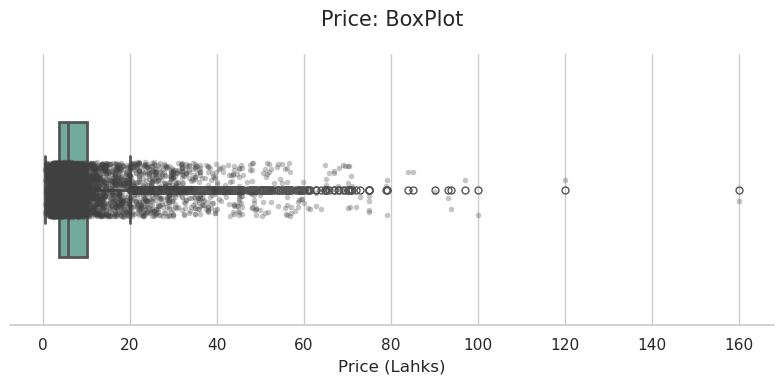

In [611]:
plt.figure(figsize=(8, 4))

sns.set_style("whitegrid")

ax = sns.boxplot(x=df['Price'], color='#69b3a2', width=0.5, linewidth=2, fliersize=5)
sns.stripplot(x=df['Price'], color='#404040', alpha=0.3, size=4, jitter=True)

plt.title('Price: BoxPlot', fontsize=15, pad=20)
plt.xlabel('Price (Lahks)', fontsize=12)

sns.despine(left=True)

plt.tight_layout()
plt.show()

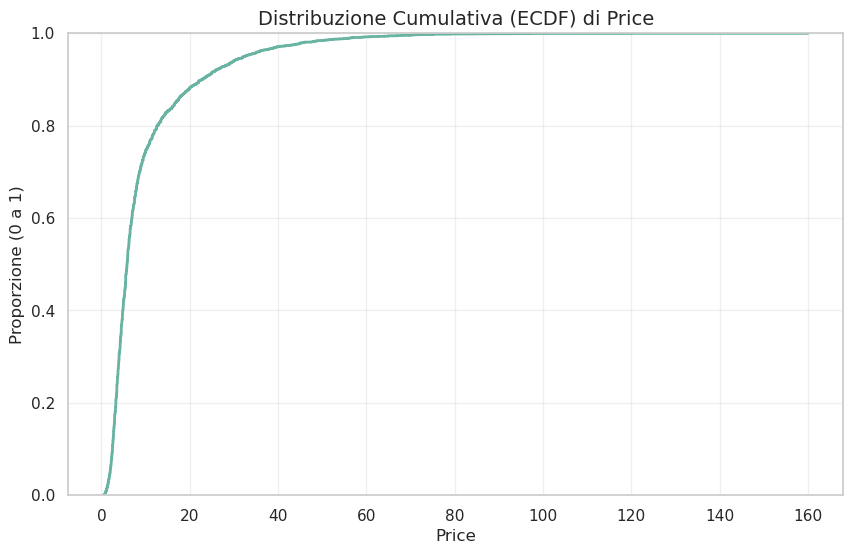

In [612]:
plt.figure(figsize=(10, 6))
sns.ecdfplot(data=df, x='Price', color='#69b3a2', linewidth=2)
plt.title('Distribuzione Cumulativa (ECDF) di Price', fontsize=14)
plt.xlabel('Price')
plt.ylabel('Proporzione (0 a 1)')
plt.grid(True, alpha=0.3)
plt.show()

- Meno dell'1% delle auto vendute superano i 40 Lahks
- L'80% delle vendite sono sotto gli 11 Lahks circa
- il 50% delle vendite è tra i 4,6 e i 10 Lahks

### 4. Analisi Multivariata

Adesso andremo a vedere le relazioni tra le varie variabili, metteremo in relazione variabili:
- **Numeriche vs Numeriche**
- **Numeriche vs Categoriche**
- **Categoriche vs Categoriche**

Il nostro scopo è confermare nostre ipotesi e credenze circa le relazioni tra le varie variabili e trovarne di nuove.

#### Trasformazione di Price


Price è la variabile più importante, sia per lo studio e sia per la predizione e colei che guida tutta l'analisi.
Quindi l'applicazione della trasformazione $\log(Pric\text{e})$ è un passaggio fondamentale, perché:
- Normalizza la Distribuzione: 
Adesso andremo ad indagare plottando grafici in cui è opportuna una buona distribuzione per avere un idea più chiara. La regressione lineare assume che i residui del modello siano distribuiti normalmente. Le variabili target fortemente asimmetriche, come il nostro Price, violano questa assunzione. La trasformazione logaritmica agisce per ridurre l'asimmetria, rendendo la distribuzione del prezzo (in scala logaritmica) molto più vicina alla normale.
- Outlier: La trasformazione riduce l'influenza degli outlier estremi (le auto di lusso a $120$ e $160$). Sulla scala logaritmica, la distanza tra $100$ e $160$ è molto minore che sulla scala originale, mitigando il loro impatto sul modello senza doverli eliminare.

In [613]:
df['Price'] = np.log1p(df['Price'])
df.head()

,Brand,Model,Location,Age,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Price,Cat,Has_New_Price,New_Price_num
0,Hyundai,Creta 1.6 CRDi SX Option,Pune,4,41000.0,Diesel,Manual,First,19,1582,126.20,2.602690,Standard,0,0.00
1,Honda,Jazz V,Chennai,8,46000.0,Petrol,Manual,First,18,1199,88.70,1.704748,Standard,1,8.61
2,Maruti,Ertiga VDI,Chennai,7,87000.0,Diesel,Manual,First,20,1248,88.76,1.945910,Large,0,0.00
3,Audi,A4 New 2.0 TDI Multitronic,Coimbatore,6,40670.0,Diesel,Automatic,Second,15,1968,140.80,2.930660,Standard,0,0.00
4,Nissan,Micra Diesel XV,Jaipur,6,86999.0,Diesel,Manual,First,23,1461,63.10,1.504077,Standard,0,0.00


#### Numeriche vs Numeriche


Andiamo innanzitutto a mostrare una matrice di correlazione che usa i **coefficienti di Pearson** in modo da misurare quanto le variabili numeriche siano legate tra loro. Questo passaggio serve a individuare eventuali problemi di **multicollinearità**, ovvero quando due variabili (come **Engine** e **Power**) sono troppo simili e forniscono informazioni ridondanti al modello.

L'uso della **heatmap** permette anche di capire quali caratteristiche influenzano maggiormente il **prezzo**. Dato che il coefficiente varia tra **-1 e 1**, i valori vicini agli estremi indicano una relazione forte, aiutandoci a decidere quali variabili tenere o trasformare nella fase di **feature engineering**.

Ci aspettiamo varie dinamiche:
- Il prezzo di vendita delle auto è fortemente influenzata negativamente dall'età dell'auto
- L'efficienza del motore (Mileage) e dimensione del motore (Engine) sono negativamente correlate
- Il chilometraggio (Kilometers_Driven) influenza negativamente il prezzo.
- Il numero di cavalli (Power) del motore fanno aumentare il valore dell'auto
- L'eta dell'auto è indipendente da specifiche come motore o cavalli

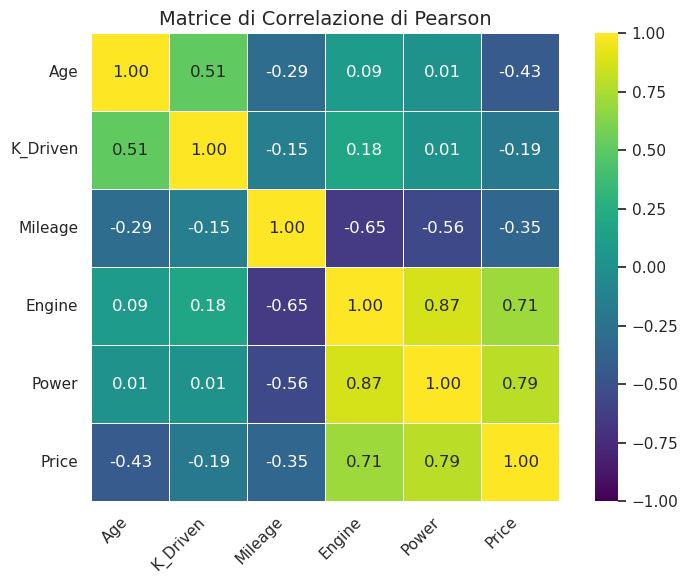

In [614]:
vars_continue = ['Age', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Price']
df_corr = df[vars_continue].rename(columns={'Kilometers_Driven': 'K_Driven'}).corr()


plt.figure(figsize=(8, 6))

sns.heatmap(df_corr,
            annot=True,          
            fmt=".2f",           
            cmap='viridis',      
            vmin=-1, vmax=1,     
            center=0,            
            square=True,         
            linewidths=.5) 

plt.title('Matrice di Correlazione di Pearson', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Ecco cosa ci dice il grafico:
- `Price` presenta una correlazione negativa con `Age`, come ci aspettavamo
- Il chilometraggio (`Mileage`) influisce negativamente sul prezzo dell'auto, come ci aspettavamo ma non in modo così significativo
- `Power` influenza molto positivamente `Price`, avevamo ragione ma addirittura è il predittore più importante
- `Engine` e `Power` sono molto correlate, ed hanno quasi la stessa influenza su tutte le variabili, in pratica spiegano la stessa cosa e questo è indice di pericolo di multicollinearità
- `Engine` è influenzata molto negtivamente da `Mileage`
- Il chilometraggio (`Mileage`) e il numero di cavalli (`Power`) non sono correlati
- L'efficienza (`Mileage`) è influenzata negativamente dalla dimensione dalla potenza (`Power`)
- `Power` ed `Age` non sono correlate
- `Power` e `Km_Driven` non sono correlate

Ad avere maggiore impatto sul prezzo sono i cavalli (e quindi la cilindrata), l'età dell'auto e l'efficienza. La potenza ha l'impatto maggiore, molto maggiore, fa salire di molto il prezzo, mentre l'età non così tanto impatto, e soprendentemente il chilometraggio ha un impatto minore di quanto ci aspettassimo. **Il mercato da molto più peso alle specifiche tecniche e all'età dell auto**.

La correlazione tra Price e l'efficenza è molto interessante, l'acquirente sta anche molto attento ai consumi e quindi ai risparmi che l'efficienza può portare nel lungo periodo.

Abbiamo due variabili che dicono la stessa cosa, Engine e Power hanno punteggi molto simili nelle relazioni con le altre variabili ed inoltre appaiono fortemente correlate.







Andiamo adesso a visualizzare una **scatter matrix**, un insieme di scatter plots, per vedere il tipo di relazioni che intercorrono (es. se sono lineari), tuttavia siccome abbiamo molte osservazioni, l'overplotting non ci permette una visione corretta, per questo motivo usiamo una stima di densità (kde):

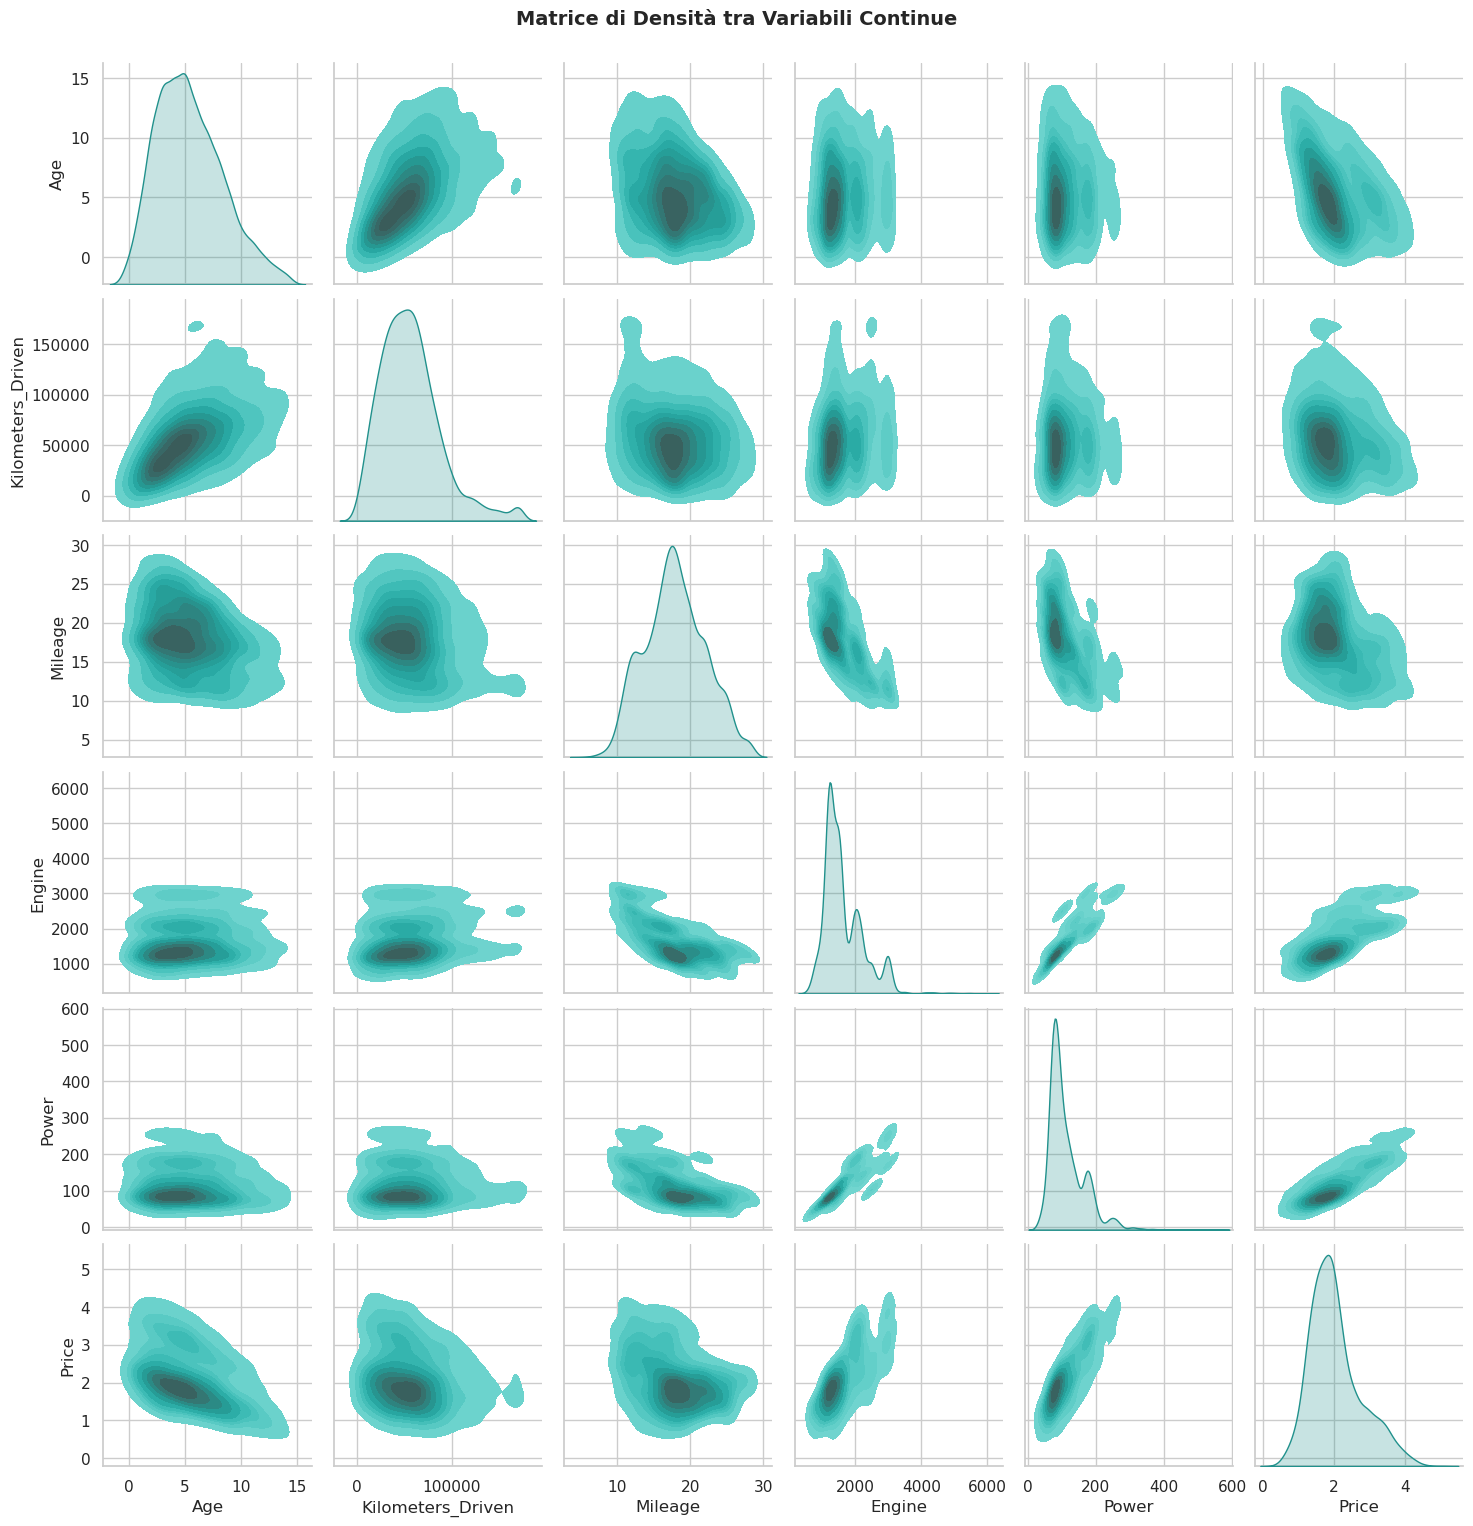

In [615]:
vars_continue = ['Age', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Price']

sns.set_theme(style="whitegrid")

g = sns.pairplot(df[vars_continue],
                 kind='kde', 
                 diag_kind='kde', 
                 plot_kws={'fill': True, 'color': '#21918c', 'thresh': 0.05, 'bw_adjust': 1.1}, 
                 diag_kws={'color': '#21918c', 'fill': True, 'bw_adjust': 1.1})

g.fig.suptitle('Matrice di Densità tra Variabili Continue', y=1.02, fontsize=14, fontweight='bold')

plt.show()

- `Age` e `Km_Driven` sono correlate positivamente, banalmente più è vecchia un auto e più km percorre
- `Power` (quindi anche Engine) e `Mileage` sono inversamente proporzionali, più aumentano i cavalli e meno efficiente diventa l'auto, la relazione è negativa non lineare
- `Price` e `Power` (e Engine) hanno una relazione positiva lineare, 
- `Price` ed `Age` hanno una relazione negativa non lineare
- Dalla correlation matrix `Mileage` ed `Age` apparivano correlate negativamente, in effetti hanno una correlazione del genere e sembra quasi non lineare, indica appunto che auto più efficienti durano più a lungo, quindi abbiamo informazioni di vendita per esse
- `Price` e `Mileage`, dal grafico sembrano non correlate, ma come riporta la matrice di correlazioe c'è una relazione tra negativa esse, tra le auto poco efficienti abbiamo anche le auto premium e di lusso
- `Engine` e `Power` hanno una relazione lineare positiva quasi perfetta

#### Numerica vs Categorica

##### Price

Vediamo come cambia il prezzo tra le varie categorie

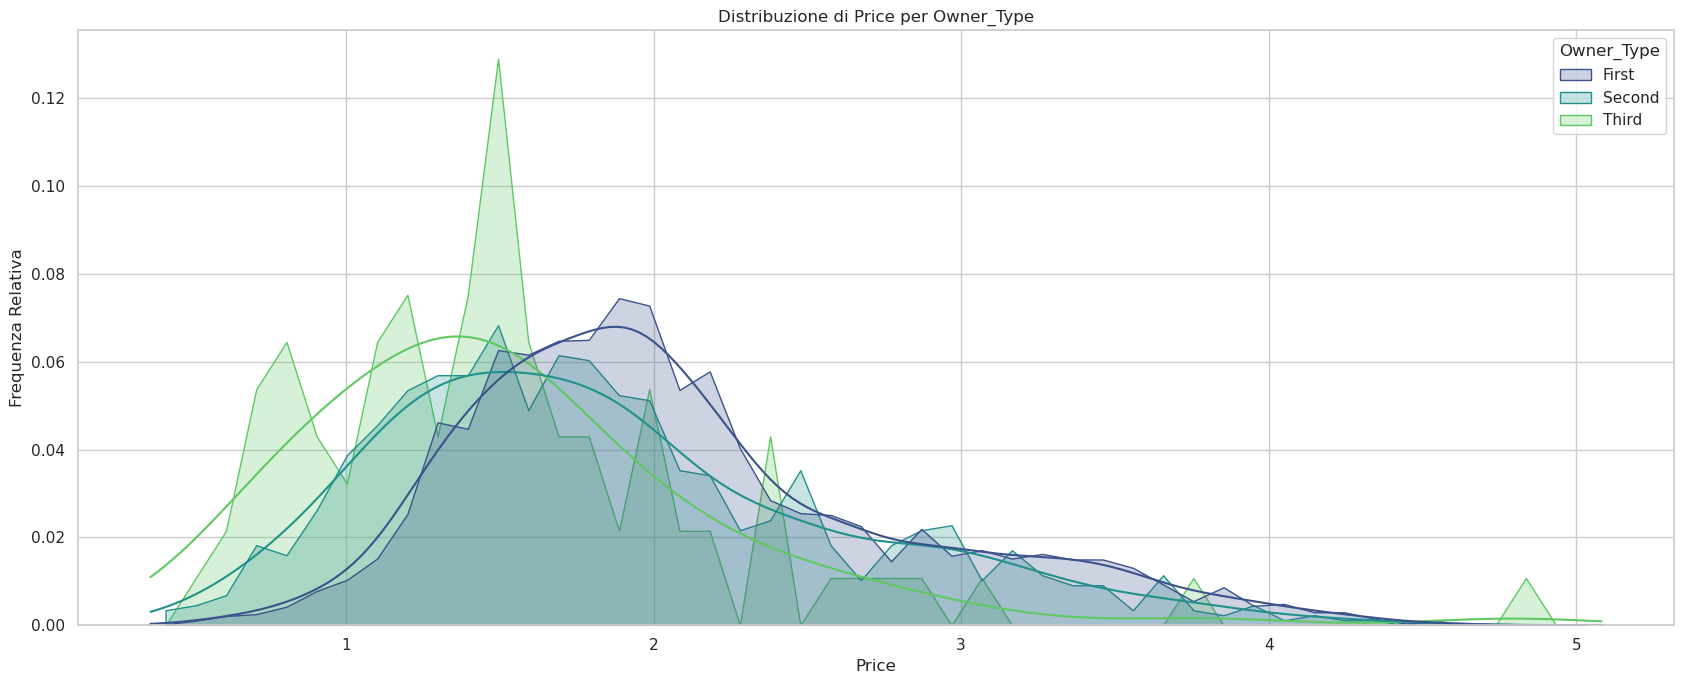

--- Statistiche per Transmission: Manual ---
Media:     1.75
Mediana:   1.75
IQR:       0.62
Std:       0.48

Skewness: 0.24
Kurtosis: 0.24


--- Statistiche per Transmission: Automatic ---
Media:     2.77
Mediana:   2.83
IQR:       1.14
Std:       0.75

Skewness: -0.04
Kurtosis: -0.74




In [616]:
var = 'Price'
hue = 'Owner_Type'

plt.figure(figsize=(17, 7))

ax = sns.histplot(
    data=df,
    x=var,
    hue=hue,
    stat="probability",
    kde=True,
    fill=True,
    element="poly",
    common_norm=False,
    palette="viridis"
)

plt.title(f'Distribuzione di {var} per {hue}')
plt.ylabel('Frequenza Relativa')
plt.xlabel(var)

plt.tight_layout()
plt.show()

group_var = 'Transmission'
target = 'Price'

for group in df[group_var].unique():
    col_group = df[df[group_var] == group][target]
    
    print(f"--- Statistiche per {group_var}: {group} ---")
    
    print(f"Media:     {col_group.mean():.2f}")
    print(f"Mediana:   {col_group.median():.2f}")
    print(f"IQR:       {col_group.quantile(0.75) - col_group.quantile(0.25):.2f}")
    print(f"Std:       {col_group.std():.2f}")
    print("")
    
    print(f"Skewness: {col_group.skew():.2f}")
    print(f"Kurtosis: {col_group.kurtosis():.2f}")
    
    print("\n" + "="*45 + "\n")

---

### 5. Inferenza statistica



Adesso che conosciamo bene il nostro dataset, le nostre variabili e come essere sono correlate, possiamo applicare i principi dell'inferenza statistica.

#### 1. Transmission & Price

Sembra che il tipo di cambio influenzi il prezzo.

Vediamo l'intervallo di confidenza:

In [617]:
from scipy import stats
from scipy.stats import normaltest
import statsmodels.api as sm

In [618]:
print(f"Gruppi di trasmissione: {df['Transmission'].unique()}\n")

group_per_transmission =  df.groupby('Transmission')['Price']
mean = group_per_transmission.mean()
std = group_per_transmission.std()

count = group_per_transmission.count()
std_err = std/np.sqrt(count)

confidence_level = 0.95

interval_manual = stats.norm.interval(confidence_level, loc=mean['Manual'], scale=std_err['Manual'])
interval_automatic = stats.norm.interval(confidence_level, loc=mean['Automatic'], scale=std_err['Automatic'])

print("---- Media per gruppo di tramissione ----")
print(f"Manual:\t\t {mean['Manual']:.2f}\nAutomatic:\t {mean['Automatic']:.2f}\n")

print("---- Std Dev per gruppo di tramissione ----")
print(f"Manual:\t\t {std['Manual']:.2f}\nAutomatic:\t {std['Automatic']:.2f}\n")

print("---- Std Err per gruppo di tramissione ----")
print(f"Manual:\t\t {std_err['Manual']:.2f}\nAutomatic:\t {std_err['Automatic']:.2f}\n")

print("---- Confidence Interval di price per gruppo di tramissione ----")
print(f"Manual:\t\t ({interval_manual[0]:.2f}, {interval_manual[1]:.2f})")
print(f"Automatic:\t ({interval_automatic[0]:.2f}, {interval_automatic[1]:.2f})\n")

Gruppi di trasmissione: ['Manual' 'Automatic']

---- Media per gruppo di tramissione ----
Manual:		 1.75
Automatic:	 2.77

---- Std Dev per gruppo di tramissione ----
Manual:		 0.48
Automatic:	 0.75

---- Std Err per gruppo di tramissione ----
Manual:		 0.01
Automatic:	 0.02

---- Confidence Interval di price per gruppo di tramissione ----
Manual:		 (1.74, 1.77)
Automatic:	 (2.73, 2.81)



Eseguiamo un Two Sample T-Test verificare l'affermazione vista in precedenza, ovvero se c'è una differenza significatica tra la media del prezzo delle auto Automatiche e quello delle Manuali.

In [619]:
manual = df[df['Transmission'] == 'Manual']['Price']
automatic = df[df['Transmission'] == 'Automatic']['Price']

t_stat, p_value = stats.ttest_ind(manual, automatic)

alpha = 0.05

print(f"Test statistic: {t_stat:0.2f}")
print(f"Significance level: {alpha:0.2f}")
print(f"P-value: {p_value:0.2f}")

if p_value < alpha:
    print("Conclusione: c'è una differenza significativa tra la media del prezzo delle auto Automatiche e Manuali.")
else:
    print("Conclusione: non c'è una differenza significativa tra la media del prezzo delle auto Automatiche e Manuali.")

Test statistic: -61.51
Significance level: 0.05
P-value: 0.00
Conclusione: c'è una differenza significativa tra la media del prezzo delle auto Automatiche e Manuali.


#### 2. Price

Sembra che Price adesso tenda ad una ditribuzione Gaussiana:

In [620]:
statistic, p_value = normaltest(df['Price'])

alpha = 0.05

print(f"Test statistic: {statistic:.2f}")
print(f"P-value: {p_value:.10f}")

if p_value > alpha:
    print("E' Gaussiano. L'ipotesi H0 è vera.")
else:
    print("H0 rifiutata")

Test statistic: 495.03
P-value: 0.0000000000
H0 rifiutata


Ma andiamo a vedere un Q-Q plot:

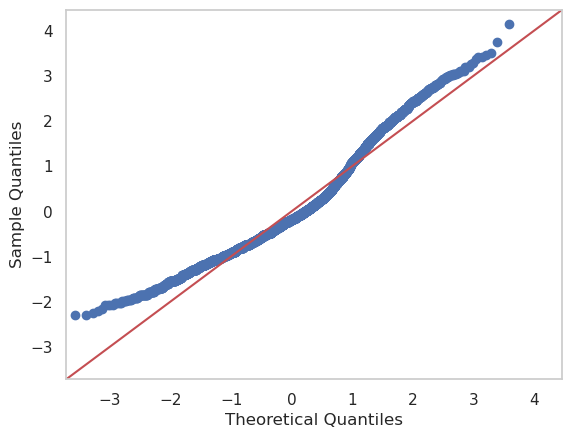

In [621]:
sm.qqplot(df['Price'], fit=True, line='45')
plt.grid()
plt.show()

Senza dubbio abbiamo avuto un netto miglioramto rispetto alla distribuzione prima della trasformazione. 
Il nostro modello ne trarrà vantaggio. 

#### 3. Automatic & Manual

Abbiamo notato che nel nostro dataset le auto a cambio Manuale sono più di quelle automatiche, vediamo se è così pure nella nostra popolazione:

In [622]:
group_per_transmission =  df.groupby('Transmission')['Price']
count = group_per_transmission.count()

total = df['Transmission'].count()

confidence_level = 0.95

proportion = count['Manual'] / total
conf_interval_man = sm.stats.proportion_confint(count['Manual'], total, alpha=1-confidence_level, method='normal')
conf_interval_aut = sm.stats.proportion_confint(count['Automatic'], total, alpha=1-confidence_level, method='normal')

print(f"---- Sample Proportion ----")
print(f"Manual:\t\t {proportion:.2f}")
print(f"Automatic:\t {1 - proportion:.2f}\n")

print("---- Confidence Interval of Proportion ----")
print(f"Manual:\t\t ({conf_interval_man[0]:.2f}, {conf_interval_man[1]:.2f})")
print(f"Automatic:\t ({conf_interval_aut[0]:.2f}, {conf_interval_aut[1]:.2f})\n")

---- Sample Proportion ----
Manual:		 0.71
Automatic:	 0.29

---- Confidence Interval of Proportion ----
Manual:		 (0.70, 0.72)
Automatic:	 (0.28, 0.30)



Per verificarlo abbiamo trovato un test statistico che confronta due proporzioni nello stesso sample, lo z-Test:

In [623]:
group_per_transmission =  df.groupby('Transmission')['Price']
count = group_per_transmission.count()

total_count = count['Manual'] + count['Automatic']

null_hypothesis = 0.50
alpha = 0.05

z_stat, p_value = sm.stats.proportions_ztest(count=count['Manual'], nobs=total_count,  value=null_hypothesis)

prop_manual = count['Manual'] / total_count

print("---- Test Z per proporzione Trasmissione ----")
print(f"Proporzione Ipotizzata:\t {null_hypothesis}")
print(f"Proporzione Manuale: {prop_manual:.4f}\n")

print(f"Z-Test statistic: {z_stat:0.2f}")
print(f"Significance level: {alpha:0.2f}")
print(f"P-value: {p_value:0.2f}")

if p_value < alpha:
    print("Conclusione: c'è una differenza significativa tra le proporzioni di auto Manuali e Automatiche.")
else:
    print("Conclusione: non c'è una differenza significativa tra le proporzioni di auto Manuali e Automatiche.")

---- Test Z per proporzione Trasmissione ----
Proporzione Ipotizzata:	 0.5
Proporzione Manuale: 0.7072

Z-Test statistic: 34.40
Significance level: 0.05
P-value: 0.00
Conclusione: c'è una differenza significativa tra le proporzioni di auto Manuali e Automatiche.


#### 4. Owner_Type & Price

Abbiamo notato che il tipo di proprietario influenza il prezzo, ovvero meno proprietari ha avuto l'auto e più costa.

In [624]:
print(f"Gruppi di proprietario: {df['Owner_Type'].unique()}\n")

group_per_owner =  df.groupby('Owner_Type')['Price']
mean = group_per_owner.mean()
std = group_per_owner.std()

count = group_per_owner.count()
std_err = std/np.sqrt(count)

confidence_level = 0.95

interval_firt_ow = stats.norm.interval(confidence_level, loc=mean['First'], scale=std_err['First'])
interval_second_ow = stats.norm.interval(confidence_level, loc=mean['Second'], scale=std_err['Second'])
interval_third_ow = stats.norm.interval(confidence_level, loc=mean['Third'], scale=std_err['Third'])

print("---- Media per gruppo di Owner_Type ----")
print(f"Fisrt:\t\t {mean['First']:.2f}")
print(f"Second:\t\t {mean['Second']:.2f}")
print(f"Third:\t\t {mean['Third']:.2f}\n")

print("---- Std Dev per gruppo di Owner_Type ----")
print(f"First:\t\t {std['First']:.2f}")
print(f"Second:\t\t {std['Second']:.2f}")
print(f"Third:\t\t {std['Third']:.2f}\n")

print("---- Std Err per gruppo di tramissione ----")
print(f"First:\t\t {std_err['First']:.2f}")
print(f"Second:\t\t {std_err['Second']:.2f}")
print(f"Third:\t\t {std_err['Third']:.2f}\n")

print("---- Confidence Interval di price per gruppo di tramissione ----")
print(f"First:\t\t ({interval_firt_ow[0]:.2f}, {interval_firt_ow[1]:.2f})")
print(f"Second:\t\t ({interval_second_ow[0]:.2f}, {interval_second_ow[1]:.2f})")
print(f"Third:\t\t ({interval_third_ow[0]:.2f}, {interval_third_ow[1]:.2f})\n")

Gruppi di proprietario: ['First' 'Second' 'Third']

---- Media per gruppo di Owner_Type ----
Fisrt:		 2.10
Second:		 1.86
Third:		 1.53

---- Std Dev per gruppo di Owner_Type ----
First:		 0.72
Second:		 0.75
Third:		 0.69

---- Std Err per gruppo di tramissione ----
First:		 0.01
Second:		 0.03
Third:		 0.07

---- Confidence Interval di price per gruppo di tramissione ----
First:		 (2.08, 2.12)
Second:		 (1.81, 1.91)
Third:		 (1.39, 1.67)



Eseguiamo un Two Sample T-Test ma solamente tra i campioni 'First' e 'Second', essendo quelli più presenti nel dataset:

In [661]:
first = df[df['Owner_Type'] == 'First']['Price']
second = df[df['Owner_Type'] == 'Second']['Price']

t_stat, p_value = stats.ttest_ind(first, second)

alpha = 0.05

print(f"Test statistic: {t_stat:0.2f}")
print(f"Significance level: {alpha:0.2f}")
print(f"P-value: {p_value:0.2f}")

if p_value < alpha:
    print("Conclusione: c'è una differenza significativa tra la media del prezzo delle auto First owner rispetto alle Second owner.")
else:
    print("Conclusione: non c'è una differenza significativa tra la media del prezzo delle auto First owner rispetto alle Second owner.")

Test statistic: 8.90
Significance level: 0.05
P-value: 0.00
Conclusione: c'è una differenza significativa tra la media del prezzo delle auto First owner rispetto alle Second owner.


---

Esportiamo il dataset:

In [663]:
df.to_csv("../../data_set/dataset_for_modeling.csv", index=False)

df.head()

,Brand,Model,Location,Age,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Price,Cat,Has_New_Price,New_Price_num
0,Hyundai,Creta 1.6 CRDi SX Option,Pune,4,41000.0,Diesel,Manual,First,19,1582,126.20,2.602690,Standard,0,0.00
1,Honda,Jazz V,Chennai,8,46000.0,Petrol,Manual,First,18,1199,88.70,1.704748,Standard,1,8.61
2,Maruti,Ertiga VDI,Chennai,7,87000.0,Diesel,Manual,First,20,1248,88.76,1.945910,Large,0,0.00
3,Audi,A4 New 2.0 TDI Multitronic,Coimbatore,6,40670.0,Diesel,Automatic,Second,15,1968,140.80,2.930660,Standard,0,0.00
4,Nissan,Micra Diesel XV,Jaipur,6,86999.0,Diesel,Manual,First,23,1461,63.10,1.504077,Standard,0,0.00


In [627]:
df['Owner_Type'].unique()

array(['First', 'Second', 'Third'], dtype=object)

---

## Parte 2 - Modellazione Statistica e Machine Learning

Nella prima parte abbiamo **conosciuto** il nostro dataset sulle auto vendute, ci abbiamo lavorato modificandolo in modo da essere più adatto per questa seconda parte, ovvero più adatto per essere *ingerito* da un modello.

Infatti da adesso ci occuperemo della **modellazione**, gli obiettivi sono:
- **Understanding** (Approccio Statistico): utilizzo di modelli di regressione per quantificare le relazioni tra le variabili, testare ipotesi e comprendere l'impatto dei fattori in gioco;
- **Prediction** (Approccio Machine Learning): Costruire sistemi automatici in grado di stimare valori basandosi su dati nuovi mai visti oppure classificarli con l'obiettivo di generare un valore pratico;

### 1. Analisi Statistica e Regressione (Inference)

In questa fase, l'attenzione è posta sulla **significatività** **statistica** e sull'**interpretazione dei coefficienti**. Non stiamo ancora cercando di fare la "miglior predizione possibile", ma di capire come le variabili si influenzano a vicenda all'interno del sistema che stiamo studiando.

Cercheremo di capire quali sono i **fattori** che determinano maggiormente il cambiamento di prezzo in un automobile usata, e come essi agiscono sul valore finale.

#### 1.1 Selezione delle Variabili

Come si è già intuito, la nostra **variabile target** è `Price`, ovvero il prezzo di vendita delle auto usate. Le nostre **variabili predittrici**, invece, sono rappresentate da tutte le altre caratteristiche presenti nel dataset: come abbiamo osservato nella fase esplorativa, ognuna di esse gioca un ruolo nel determinare il prezzo finale.

##### Nota

È importante ricordare che alla variabile `Price` è stata precedentemente applicata una **trasformazione logaritmica** (utilizzando la funzione log1p). Questa scelta è stata necessaria per normalizzare la distribuzione dei prezzi e mitigare l'influenza di eventuali outlier, garantendo così una **maggiore stabilità e affidabilità** dei modelli statistici e di machine learning.

#### 1.2 Gestione delle Variabili

##### Variabili Categoriche non Ordinali

Alcune variabili come `Location` o `Seats` che sono di tipo categorico non possono essere lette dal modello, dovremmo trasformarle in numeriche.

La strategia migliore è usare le **Variabili Dummmy** (una forma di One-Hot Encoding per la statistica) direttamente in questa fase:
- Si crea una colonna per ogni categoria (es. `Location_New_Delhi`)
- Una categoria si esclude e diventa quella di riferimento.
- Ogni auto vendita a Delhi avrà 1 in quella categoria e 0 in tutte le altre

In questo modo esse devono essere **interpretato** nel seguente modo: il coefficiente $\beta$ ottenuto per `Location_Mumbai` dirà: "*Rispetto a New Delhi (categoria di riferimento), il prezzo di un auto a Mumbai varia di $\beta$, a parità di altre condizioni*".

Variabili a cui **applichiamo** questa tecnica: `Brand`, `Location`, `Cat`.

##### Variabili Categoriche Binarie

Invece per nelle variabili categoriche binarie, come `Transmission` o `Fuel_Type` applicare la tecnica del One-Hot Encoding è la stessa cosa di fare un mapping 0 e 1.

##### Variabili Categoriche Ordinali

Invece per quelle ordinali, come `Owner_Type`, applichiamo un mapping in valori numerici dicresti, sarà il modello a cogliere eventuali relazioni non lineari in base al confronto con le altre variabili.

In [628]:
y_modeling = df['Price'].copy()
y_modeling = y_modeling.rename('log_Price')

vars_da_escludere = ['Price', 'Model']
X_modeling = df.drop(columns=vars_da_escludere).copy()

owner_mapping = {'First': 1, 'Second': 2, 'Third': 3}
X_modeling['Owner_Type'] = X_modeling['Owner_Type'].map(owner_mapping)

vars_to_dummy = ['Brand', 'Location', 'Fuel_Type', 'Transmission', 'Cat']
X_modeling = pd.get_dummies(X_modeling, columns=vars_to_dummy, drop_first=True, dtype=int)

##### Variabili numeriche  

Durante EDA, ci siamo accorti della distribuzione asimmetrica di alcune variabili. Per cui abbiamo deciso di fare una trasformazione logaritmica di:  
- `Power`
- `New_Price_num` (anche per coerenza con Price).  
- `Price` (che abbiamo già fatto)
- `Kilometers_Driven` (anche per questioni di scala, essendo numeri molto alti)    
Infine per evitare la multicollinearità rimuoveremo `Engine`. Le rinomiamo con **Log_** per ricordarci che sono logaritmiche. 

In [629]:
X_modeling['log_Power'] = np.log1p(X_modeling['Power'])
X_modeling['log_New_Price'] = np.log1p(X_modeling['New_Price_num'])
X_modeling['log_Kms'] = np.log1p(X_modeling['Kilometers_Driven'])

X_modeling = X_modeling.drop(['Engine', 'Power', 'New_Price_num', 'Kilometers_Driven'], axis=1)

#### 1.3 Applicazione del Modello: Regressione Lineare


Dato che il nostro target (Price) è una variabile continua, abbiamo deciso di applicare un modello di **Regressione Lineare**.

Questo modello non riuscirà a catturare la **non linearità** di alcune relazioni, ad esempio il prezzo delle auto non scende dello stesso valore ogni anno ma di solito tende a scendere **più rapidamente** nei primi periodi. Questo porta ad un introduzione di un **bias** che potrebbe portare ad un **underfitting**.

In [630]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [631]:
y_inference = y_modeling.copy()
X_inference = X_modeling.copy()

X_inference = sm.add_constant(X_inference)
model_slr = sm.OLS(y_inference, X_inference).fit()

print(model_slr.summary())

                            OLS Regression Results                            
Dep. Variable:              log_Price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     1989.
Date:                Fri, 16 Jan 2026   Prob (F-statistic):               0.00
Time:                        01:32:17   Log-Likelihood:                 1201.8
No. Observations:                5710   AIC:                            -2328.
Df Residuals:                    5672   BIC:                            -2075.
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.6548    

#### 1.4 Interpretazione e Diagnostica

Di seguito andremo ad:
1. Analizzare la **bontà di adattamento** (Goodness-of-Fit)
2. Analizzare i **p-value**
3. Discutere i **coefficienti**
4. Analizzare gli **intervalli di confidenza**
5. Analizzare i **residui**

Dal sommario del modello vengono restituiti molte informazioni riguardo il modello appena creato, andiamo a leggere le più importanti:

##### Analisi del **Goodness-of-Fit**:

- **R-squared (0.928)**: Indica la quantità di varianza spiegata nel modello, in questo caso esso spiega il **92,8%** della varianza totale dei prezzi delle auto. Indica adattamento più che ottimo ai dati.
- **Prob F-statistic (0.00)**: Possiamo rifiutare l'ipotesi nulla (H0: il modello tira a indovinare) dato che è minore di 0.05, significa che almeno un predittore ha un impatto reale sul prezzo ed il set di variabili scelto spiega il prezzo meglio di una semplice media.
- **Adj R-squared (0.928)**: Penalizza il punteggio se vengono aggiunti predittori che non migliorano significativamente il modello, avendo un valore uguale ad R-squared, tutto il set di variabili è effettivamente utile.


**Note**:
- [1] **Avviso standard**, indica che il modello assume che gli errori abbiano tutti la stessa varianza. Inoltre, guardando l'avviso e alcuni numeri come Omnibus e Jarque-Bera, i test ci dicono che i residui non sono normali. Questo perché ci sono degli outlier in questo dataset, o meglio, auto d'epoca (che magari costano pochissimo), e auto di estremo lusso (es. Lamborghini). Sicuramente analizzeremo i grafici, e inoltre questo potrebbe essere anche indicatore che le relazioni non sono perfettamente lineari. 

##### Analisi dei **p-value**

Prima di passare all'interpretazione dei coefficienti vogliamo **verificare** quali di essi hanno un p-value maggiore di 0.05 e quindi quali sono **statisticamente significativi**: 

In [632]:
p_values = model_slr.pvalues

significativi = p_values[p_values < 0.05].index.tolist()
non_significativi = p_values[p_values >= 0.05].index.tolist()

count_significativi = len(significativi)
count_non_significativi = len(non_significativi)

print(f"--- RISULTATI ANALISI P-VALUE (alpha: 0.05) ---\n")
print(f"Predittori STATISTICAMENTE SIGNIFICATIVI: {count_significativi}")
print(f"Nomi: {significativi}")
print(f"\nPredittori NON SIGNIFICATIVI: {count_non_significativi}")
print(f"Nomi: {non_significativi}")

--- RISULTATI ANALISI P-VALUE (alpha: 0.05) ---

Predittori STATISTICAMENTE SIGNIFICATIVI: 33
Nomi: ['const', 'Age', 'Owner_Type', 'Mileage', 'Has_New_Price', 'Brand_Chevrolet', 'Brand_Ford', 'Brand_Honda', 'Brand_Hyundai', 'Brand_Mahindra', 'Brand_Maruti', 'Brand_Nissan', 'Brand_Other', 'Brand_Other_Luxury', 'Brand_Renault', 'Brand_Skoda', 'Brand_Tata', 'Brand_Toyota', 'Brand_Volkswagen', 'Location_Bangalore', 'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad', 'Location_Kolkata', 'Location_Mumbai', 'Location_Pune', 'Fuel_Type_Petrol', 'Transmission_Manual', 'Cat_Sports', 'Cat_Standard', 'log_Power', 'log_New_Price', 'log_Kms']

Predittori NON SIGNIFICATIVI: 5
Nomi: ['Brand_Bmw', 'Brand_Mercedes-benz', 'Location_Chennai', 'Location_Jaipur', 'Location_Kochi']


La maggior parte delle variabili risulta **significativa**. Quindi la maggior parte dei nostri dati è **utile** a spiegare la variazione di prezzo. 

Tuttavia abbiamo 5 variabili con un p-value più alto della **soglia**. Poiché abbiamo usato il One-Hot Encoding con drop_first=True, la categoria di riferimento per i brand è probabilmente Audi. Il modello ci sta dicendo che, a parità di età e potenza, non c'è differenza di prezzo statistica tra Audi, BMW e Mercedes (che ha senso). Per le città invece, i prezzi non sono statisticamente distinguibili dalla città di riferimento (probabilmente Ahmedabad). In generale nulla di strano. 

##### Estrazione predittori significativi e non significativi

Adesso per andaere ad analizzare i coefficienti abbiamo **creato** questo script che ha il compito di:
- **Estrarre coefficienti**, p-values, intervalli di confidenza
- **Dividere per categoria**, in modo da visualizzare le variabili dummy
- **Convertire il valore** del coefficiente in valore percentuale sull'impatto del prezzo secondo la formula scritta sopra

In [633]:
params = model_slr.params
p_values = model_slr.pvalues
conf_int = model_slr.conf_int()

ci_low = conf_int[0]
ci_high = conf_int[1]

vars_elasticity = ['log_Kms', 'log_Power', 'log_New_Price']

df_elast = pd.DataFrame({
    'Coefficiente (beta)': params[vars_elasticity].round(4),
    'P-Value': p_values[vars_elasticity].round(4),
    'Impatto % su Prezzo': params[vars_elasticity].round(2),
    'CI Lower %': ci_low[vars_elasticity].round(2),
    'CI Upper %': ci_high[vars_elasticity].round(2)
})


vars_semi_elast = ['Age', 'Mileage', 'Owner_Type', 'Has_New_Price']

df_semi = pd.DataFrame({
    'Coefficiente (beta)': params[vars_semi_elast].round(4),
    'P-Value': p_values[vars_semi_elast].round(4),
    'Impatto % su Prezzo': ((np.exp(params[vars_semi_elast]) - 1) * 100).round(2),
    'CI Lower %': ((np.exp(ci_low[vars_semi_elast]) - 1) * 100).round(2),
    'CI Upper %': ((np.exp(ci_high[vars_semi_elast]) - 1) * 100).round(2)
})

# Unione e Ordinamento
df_continue_final = pd.concat([df_elast, df_semi])
df_continue_final['Abs_Impatto'] = df_continue_final['Impatto % su Prezzo'].abs()
df_continue_final = df_continue_final.sort_values(by='Abs_Impatto', ascending=False).drop(columns='Abs_Impatto')


df_categorie = {}
baseline_info = {} 

prefissi = ['Location', 'Brand', 'Fuel_Type', 'Transmission', 'Cat']

for pref in prefissi:
    
    group_vars = [v for v in params.index if v.startswith(pref + "_")]
    
    if not group_vars:
        continue
        
    data = []
    
    for var in group_vars:
        beta = params[var]
        low = ci_low[var]
        high = ci_high[var]
        p_val = p_values[var]
        
        data.append({
            'Categoria': var.replace(pref + "_", ""),
            'Coefficiente (beta)': round(beta, 4),
            'P-Value': round(p_val, 4),
            'Impatto %': round((np.exp(beta) - 1) * 100, 2),
            'CI Lower %': round((np.exp(low) - 1) * 100, 2),
            'CI Upper %': round((np.exp(high) - 1) * 100, 2),
            'Nota': 'Significativo' if p_val < 0.05 else 'Non Sig.'
        })
    
    
    temp_df = pd.DataFrame(data)
    
    row_baseline = {
        'Categoria': 'BASELINE (Riferimento)', 
        'Coefficiente (beta)': 0.0,
        'P-Value': 0.0, 
        'Impatto %': 0.0, 
        'CI Lower %': 0.0, 
        'CI Upper %': 0.0,
        'Nota': 'Riferimento'
    }
    
    temp_df = pd.concat([pd.DataFrame([row_baseline]), temp_df], ignore_index=True)
    
    temp_df['Abs_Impatto'] = temp_df['Impatto %'].abs()
    df_sorted = temp_df.iloc[1:].sort_values(by='Abs_Impatto', ascending=False)
    df_final_cat = pd.concat([temp_df.iloc[[0]], df_sorted]).drop(columns='Abs_Impatto')
    
    df_categorie[pref] = df_final_cat

##### Discussione dei **coefficienti** e Analisi **Intervalli di Confidenza**

**Variabili Continue**

In [634]:
print("Variabili Continue:")
display(df_continue_final)

Variabili Continue:


,Coefficiente (beta),P-Value,Impatto % su Prezzo,CI Lower %,CI Upper %
Has_New_Price,-0.2955,0.0,-25.58,-29.43,-21.52
Age,-0.0932,0.0,-8.90,-9.13,-8.67
Owner_Type,-0.0509,0.0,-4.96,-6.20,-3.71
Mileage,-0.0131,0.0,-1.30,-1.54,-1.07
log_Power,0.7921,0.0,0.79,0.77,0.82
log_New_Price,0.1016,0.0,0.10,0.08,0.12
log_Kms,-0.0727,0.0,-0.07,-0.08,-0.06


- **Has_New_Price (-0.2955)**: Questa variabile mostra un impatto apparente del -25,58%. Tuttavia, questo non è un malus, poiché questa variabile lavora con log_New_Price (che aggiunge valore), questo coefficiente negativo serve a "bilanciare" la stima, impedendo al modello di sovrastimare il prezzo delle auto economiche. È il punto di partenza ribassato da cui la variabile del prezzo inizia a sommare valore.  

- **Age (-0.0932)**: È il predittore temporale dominante. Mantenendo costanti le altre variabili, il valore dell'auto si deprezza del 8,90% per ogni singolo anno di invecchiamento.  

- **Owner_Type (-0.0509)**: Il passaggio di mano penalizza il valore. Ogni cambio di proprietario aggiuntivo (es. da Primo a Secondo) comporta una riduzione del prezzo del 4,96%.  

- **Mileage (-0.0131)**: C'è una relazione inversa tra efficienza e prezzo: per ogni km/l in più di percorrenza dichiarata, il prezzo scende dell'1,30%. Questo accade perché le auto più efficienti sono tipicamente utilitarie economiche, mentre le auto di lusso hanno consumi peggiori.  

- **log_Power (0.7921)**: Un aumento dell'1% della potenza del motore si traduce in un aumento del prezzo dello 0.79%. La relazione è quasi 1:1: il mercato paga la potenza quasi per intero.  

- **log_New_Price (0.1016)**: A un aumento dell'1% del prezzo di listino del nuovo corrisponde un aumento dello 0.10% sul valore dell'usato. Questo coefficiente lavora sopra la base fornita da Has_New_Price per scalare il valore.  

- **log_Kms (-0.0727)**: Un aumento dell'1% della percorrenza totale riduce il prezzo solo dello 0.07%. Questo dimostra che l'età (Age) pesa molto più dell'usura effettiva (Kms) nella determinazione del prezzo.  

Tutti gli intervalli di confidenza (CI) delle stime sono estremamente stretti (es. per Age va da -9.13% a -8.67%), indice del fatto che le stime del modello sono statisticamente robuste e molto precise.

**Fuel_Type**

In [635]:
print("\nImpatto Fuel_Type (Ordinato):")
display(df_categorie['Fuel_Type'])


Impatto Fuel_Type (Ordinato):


,Categoria,Coefficiente (beta),P-Value,Impatto %,CI Lower %,CI Upper %,Nota
0,BASELINE (Riferimento),0.0000,0.0,0.00,0.00,0.00,Riferimento
1,Petrol,-0.2098,0.0,-18.92,-20.24,-17.58,Significativo


- **Diesel (baseline)**

- **Petrol (-0.2126)**: Indica che un auto a Petrol costa circa il **19%** in meno di una a Diesel. l'intervallo di confidenza mostra che nel peggiore dei casi costa il **20,24%** in meno.

Sono tutti predittori significativi. Anche qua intervalli di confidenza molto stretti, ottimo.

**Trasmission**

In [636]:
print("\nImpatto Transmission:")
display(df_categorie['Transmission'])


Impatto Transmission:


,Categoria,Coefficiente (beta),P-Value,Impatto %,CI Lower %,CI Upper %,Nota
0,BASELINE (Riferimento),0.0000,0.0,0.00,0.00,0.00,Riferimento
1,Manual,-0.1102,0.0,-10.44,-11.91,-8.94,Significativo


- **Automatic (baseline)**

- **Manuak (-0.1112)**: Un auto Manual sarà venduta ad un prezzo inferiore del **10,44%** rispetto ad un auto Automatic.

Sono tutti predittori significativi. Anche qua intervalli di confidenza molto stretti, ottimo.

**Brand**

In [637]:
print("\nImpatto Brand:")
display(df_categorie['Brand'])


Impatto Brand:


,Categoria,Coefficiente (beta),P-Value,Impatto %,CI Lower %,CI Upper %,Nota
0,BASELINE (Riferimento),0.0000,0.0000,0.00,0.00,0.00,Riferimento
14,Tata,-0.7797,0.0000,-54.15,-56.14,-52.07,Significativo
2,Chevrolet,-0.7432,0.0000,-52.44,-54.67,-50.10,Significativo
6,Mahindra,-0.6600,0.0000,-48.31,-50.46,-46.08,Significativo
16,Volkswagen,-0.5386,0.0000,-41.64,-43.81,-39.40,Significativo
4,Honda,-0.5361,0.0000,-41.50,-43.51,-39.41,Significativo
3,Ford,-0.5342,0.0000,-41.39,-43.60,-39.09,Significativo
12,Renault,-0.5245,0.0000,-40.81,-43.44,-38.07,Significativo
5,Hyundai,-0.5166,0.0000,-40.35,-42.34,-38.28,Significativo
9,Nissan,-0.5144,0.0000,-40.21,-43.24,-37.03,Significativo


- **Mercedes-Benz (+2.93%) e BMW (-2.86%)**: Questi coefficienti non sono statisticamente significativi (P-value > 0.05).   
Insight: Questo è un risultato cruciale. Il modello ci dice che, nel mercato dell'usato, non esiste una differenza di prezzo reale tra Audi, BMW e Mercedes-Benz. Il mercato percepisce questo trio come perfetti sostituti in termini di tenuta del valore. Gli intervalli di confidenza attraversano lo zero, confermando l'assenza di un premio o sconto specifico.  

- **Other_Luxury (+10.74%)**: Questa categoria (che include brand di ultra-lusso come Jaguar, Land Rover, Porsche o Volvo raggruppati) mostra un premio significativo del 10,74% rispetto ad Audi. L'intervallo di confidenza è positivo, indicando una nicchia di valore superiore.  

- **Toyota (-26.27%)**: Toyota si conferma il "Re del Mass Market". Sebbene valga meno di un'Audi (ovviamente), il suo sconto del 26,27% è nettamente inferiore a quello di tutti gli altri brand generalisti.  
Insight: Toyota si posiziona in una fascia a sé stante, facendo da "ponte" tra il segmento Lusso e quello Standard, grazie alla sua reputazione di affidabilità che ne preserva il valore residuo.  

- **Maruti (-36.33%)**: Tra i brand economici, Maruti è quello che difende meglio il prezzo, con uno sconto del 36,33% rispetto al benchmark. Essendo leader di mercato in India, la forte domanda e la facilità di manutenzione sostengono i prezzi dell'usato meglio dei rivali.  

- **Il Blocco "Standard" (Hyundai, Honda, VW, Renault, Nissan, Ford)**: Questi brand si muovono in blocco con uno sconto strutturale che oscilla tra il 40% e il 41% rispetto ad Audi.  
Insight: Il mercato non fa grandi distinzioni tra una Hyundai (-40.35%), una Honda (-41.50%) o una Volkswagen (-41.64%). A parità di caratteristiche tecniche, questi veicoli vengono deprezzati in modo quasi identico.  

- **Tata (-54.15%) e Chevrolet (-52.44%)**: Questi sono i brand con la svalutazione più marcata.  
Insight: Una Tata usata vale oltre il 54% in meno di un'Audi comparabile (e circa il 18% in meno di una Maruti comparabile). Questo riflette una percezione di qualità inferiore o costi di mantenimento/rivendibilità più difficili nel mercato dell'usato analizzato.  

Nota sulla Precisione: Gli intervalli di confidenza per i brand mass-market (es. Tata tra -56% e -52%) sono molto stretti, indicando che il modello è estremamente sicuro di questa gerarchia di prezzo.

**Location**

In [638]:
print("\nImpatto Location (Ordinato):")
display(df_categorie['Location'])


Impatto Location (Ordinato):


,Categoria,Coefficiente (beta),P-Value,Impatto %,CI Lower %,CI Upper %,Nota
0,BASELINE (Riferimento),0.0000,0.0000,0.00,0.00,0.00,Riferimento
8,Kolkata,-0.2012,0.0000,-18.23,-20.78,-15.59,Significativo
1,Bangalore,0.1269,0.0000,13.53,9.74,17.46,Significativo
5,Hyderabad,0.1020,0.0000,10.74,7.42,14.15,Significativo
3,Coimbatore,0.0937,0.0000,9.83,6.47,13.30,Significativo
4,Delhi,-0.0648,0.0001,-6.28,-9.17,-3.29,Significativo
9,Mumbai,-0.0629,0.0000,-6.10,-8.90,-3.21,Significativo
10,Pune,-0.0347,0.0294,-3.41,-6.39,-0.35,Significativo
2,Chennai,0.0246,0.1352,2.49,-0.76,5.85,Non Sig.
7,Kochi,-0.0232,0.1433,-2.29,-5.28,0.79,Non Sig.


Non sembrano esserci molte città dove le auto vengono vendute ad un prezzo particolarmente più basso o più alto rispetto ad `Ahmedabad`.

Tuttavia ci sono 3 città dove le auto vengono vendute ad un prezzo molto diverso:
- Kolkata, meno **18,23%**
- Bangalore, più **13,53%**
Hyderabad, più **10,74%**

Gli intervalli sono molto stretti. 3 categorie non sono significative.

**Category**

In [639]:
print("\nImpatto Category:")
display(df_categorie['Cat'])


Impatto Category:


,Categoria,Coefficiente (beta),P-Value,Impatto %,CI Lower %,CI Upper %,Nota
0,BASELINE (Riferimento),0.0000,0.0,0.00,0.00,0.00,Riferimento
1,Sports,0.2610,0.0,29.82,16.00,45.30,Significativo
2,Standard,-0.1285,0.0,-12.05,-14.09,-9.97,Significativo


- **Cat_Sports (+29.82%)**: Le vetture sportive (2 posti) godono di un premio massiccio sul prezzo. A parità di altre condizioni, una sportiva vale circa il 30% in più rispetto a una Large.  
Insight: L'intervallo di confidenza è molto ampio (tra +16% e +45%). Questo è normale: il segmento "Sports" contiene poche auto ma con prezzi molto variabili (dalla Mazda MX-5 all'Audi R8). Tuttavia, la scarsità di sedili qui è un lusso, non un difetto.  

- **Cat_Standard (-12.05%)**: Le vetture standard (4-5 posti, il mercato di massa) valgono il 12,05% in meno rispetto ai veicoli Large.  
Insight: Questo conferma la logica economica: un'auto "normale" costa meno di un SUV a 7 posti. L'intervallo di confidenza è strettissimo (tra -14% e -10%), il che indica che questa stima è estremamente precisa e rappresentativa della maggior parte del mercato.

##### Analisi dei Residui

Procediamo adesso con l'analisi dei residui tramite: **Residual vd Fitted Plot** e il **QQ-Plot**. Questi due grafici ci permettono di verificare l'omoschedasticità e la normalità della distribuzione degli errori. Una distribuzione casuale dei residui è essenziale per garantire che le stime del nsotro modello siano affidabili.

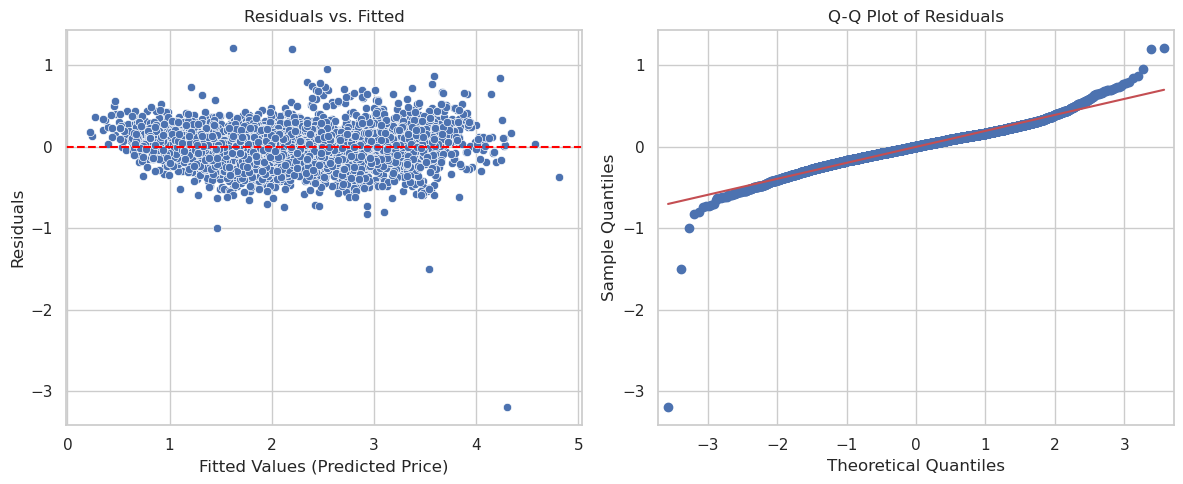

In [640]:
fitted_values = model_slr.fittedvalues
residuals = model_slr.resid

plt.figure(figsize=(12, 5))

# 1. Residuals vs. Fitted Plot
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(x=fitted_values, y=residuals, ax=ax1)
ax1.axhline(0, color='red', linestyle='--')
ax1.set_title('Residuals vs. Fitted')
ax1.set_xlabel('Fitted Values (Predicted Price)')
ax1.set_ylabel('Residuals')

# 2. Q-Q Plot
ax2 = plt.subplot(1, 2, 2)
sm.qqplot(residuals, line='s', ax=ax2)
ax2.set_title('Q-Q Plot of Residuals')

plt.tight_layout()
plt.show()

Il modello è sano. Ha solo qualche difficoltà a prevedere le "svendite clamorose" (che è anche comprensibile), ma per il resto del mercato è chirurgico. Sembra anche confermare l'assunsione di linearità, però in futuro potremmo provare una regressione polinomiale per vedere se riusciamo a catturare quest'ulteriori punti. 

---

### 2 Analisi Predittiva e Machine Learning

In questa fase l'obiettivo è creare un **modello predittivo** che funzioni su **dati nuovi e mai visti**. Ci avvicineremo sempre di più all'approccio **Machine Learning**, perdendo via via interpretabilità del modello ma cercando il miglior trade-off tra **bias e varianza**.

#### 2.1 Definizione del Problema e del Valore Pratico

**Progetto**: **`AutoPrice AI`** --> Algoritmo di Pricing per il mercato delle automobili 

##### 1. Scenario Applicativo

A partire da questo dataset, possiamo creare un **modello** che miri proprio a questo, a predire il prezzo di vendita di un’automobile usata. Abbiamo quindi ipotizzato la creazione di un **tool** che abbia come scopo quello di **assistere l'utente** nel capire il valore della propria auto o nel definire un prezzo di vendita competitivo.

Nel nostro caso, disponiamo di informazioni riguardanti unicamente il **mercato indiano**, pertanto il nostro strumento si concentrerà nel predire i prezzi di vendita in quella specifica area geografica.

Si potrebbe integrare questo modello predittivo all'interno di una **piattaforma web** di compravendita di auto, oppure inserirlo nel gestionale di una **concessionaria** di automobili usate.

L'utente inserirà le **specifiche tecniche** di una vettura e il sistema utilizzerà l'algoritmo di Machine Learning per restituire una **previsione del prezzo di vendita**.

##### 2. Utilità della soluzione

Perché si sente il bisogno di risolvere questo problema? Alle volte capire a quale prezzo **mettere in vendita** la propria automobile oppure sapere se un prezzo per una vettura che vogliamo comprare è **ottimale** può essere molto difficile. Sono molti i fattori in gioco che **influenzano**  il prezzo di un'automobile.

Inoltre una piattaforma online che mostra un "*prezzo consigliato dall'IA*" aumenta la **trasparenza**, incrementanto la probabilità di contatto tra **venditore ed acquirente**.

##### 3. Quantificazione del Valore Aggiunto

I concessionari inoltre riuscirebbero a **risparmiare** sul personale che ha il solo compito di stimare il valore di una vettura, potendo contare su uno strumento più **economico**, più **veloce** e più **affidabile**.

Si eviterebbero quindi **errori di stima**, inoltre gli utenti privati potranno qundi anche **proteggersi** da strategie aggressive dei venditori, potento conoscere il reale prezzo di vendita/valore di una vettura.



Abbiamo già adottato un **semplice modello** **lineare** ed abbiamo ottenuto dei risultati veramente ottimi, esso riusciva già a spiegare il **91%** della **varianza** (R-score 0.913) nel dataset. 

Per questo, data anche la **natura del nostro obiettivo** (Pricing), abbiamo scelto di mantenere l'**approccio di Regressione** per predire il valore dell'auto.

#### 2.2 Setup Sperimentale

Da adesso è importante la performance sui dati nuovi e mai visti, per questo adesso **divideremo** il nostro dataset in 2 parti:
- **Train set**, il più massiccio, conterrà il 80% delle osservazioni, sarà il set su cui alleneremo i nostri modelli.
- **Test set**, coprirà il 20% del dataset, servirà come test finale sul nostro modello che considereremo come migliore, allenato dall'unione tra train e validation

- **Feature Scaling**: applichiamo lo scaling a tutte le variabili continue. Questo passaggio è fondamentale affinché tutte le feature abbiano la stessa scala di grandezza, evitando che variabili con valori numerici elevati (come i chilometri) dominino su quelle con range ridotti durante la fase di ottimizzazione. Lo scaling porterà tutte le feature a media 0 e varianza 1.

In [641]:
X = X_modeling.copy()
y = y_modeling.copy()

In [642]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Sets Proportions:")
print(f"X:\t\t{X.shape}\t Prop: {X.shape[0]/X.shape[0]:.1f}")
print(f"X_train:\t{X_train.shape}\t Prop: {X_train.shape[0]/X.shape[0]:.1f}")
print(f"X_test:\t\t{X_test.shape}\t Prop: {X_test.shape[0]/X.shape[0]:.1f}")

Sets Proportions:
X:		(5710, 37)	 Prop: 1.0
X_train:	(4568, 37)	 Prop: 0.8
X_test:		(1142, 37)	 Prop: 0.2


Lo scaling delle feature deve essere **calibrata solo** sul Train set per evitare il fenomeno del "Data Leakage", il modello non deve "sapere" nulla sulla media o sulla deviazione standard del Test Set **prima di essere valutato**.

In [643]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### 2.3 Modellazione e Selezione

Come detto prima creeremo vari modelli e li confronteremo per trovare il **migliore**. Il confronto verrà fatto sulla base di varie metriche che spiegheremo in seguito.

Nei modelli Supervised andremo a provare la regolarizzazzione su modelli di Regressione Lineare e Polinomiale.

Durante la creazione dei vari modelli, applicheremo la tecnica della regolarizzazione, che permette di attenuare il **peso dei coefficienti** sul modello:
- **Regolarizzazione Ridge (L2)**, attenua i coefficienti ma non li elimina
- **Regolarizzazione Lasso (L1)**, più drastico, può portare i coefficienti a zero, eliminandoli

Data la presenza di iperparametri da ottimizzare (tranne nella regressione lineaer semplice), adotteremo una strategia di **K-Fold Cross-Validation**. Questa tecnica prevede la suddivisione del dataset in $K$ parti: il modello viene addestrato su $K - 1$ parti e validato sulla rimanente, ripetendo il processo per $K$ iterazioni fino a quando ogni parte non è stata utilizzata come set di validazione. Il risultato finale sarà dato dalla media delle performance ottenute. Abbiamo scelto questo approccio poiché il nostro dataset non è molto grande e vogliamo garantire una valutazione più affidabile e meno dipendente da un singolo split. Per implementare questa procedura in modo efficiente e trovare i migliori iperparametri, utilizzeremo **GridSearchCV**.

Per la nostra K-Fold CV adotteremo una divisione in 5 parti, un giusto compromesso adatto alle dimensioni del nostro dataset.

##### Modelli Lineari

In [644]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error

Procediamo con la creazione dei **modelli lineari**. L'unico iperparametro da impostare è $\alpha$, ovvero la **forza della regolarizzazzione**:
- Nella Ridge Regression abbiamo testato valori da 0.1 a 1000 per **gestire eventuali correlazioni** tra le variabili senza escluderle.
- Nella Lasso Regression abbiamo usato valori più piccoli (da 0.0001 a 10) perché questo modello è **più aggressivo** e tende ad azzerare le variabili meno importanti per semplificare il modello.

Per il Lasso abbiamo impostato **max_iter** a 10000. Questa scelta è necessaria perché l'algoritmo di calcolo del Lasso ha bisogno di più passaggi per arrivare alla soluzione corretta, specialmente quando cerchiamo parametri molto precisi.

Inoltre il modello finale scelto dallo script è quello che **minimizza** il Mean Square Error.

In [645]:
# Fissiamo il grado a 1 per la regressione lineare semplice
degree_lr = 1

metrics = {
    'MAE': 'neg_mean_absolute_error',
    'MSE': 'neg_mean_squared_error',
    'RMSE': 'neg_root_mean_squared_error',
    'R2': 'r2'
}

# REGRESSIONE LINEARE SEMPLICE
pipe_lr = Pipeline([
    ('polylr', PolynomialFeatures(degree=1)), # Grado 1 = Lineare Semplice
    ('modellr', LinearRegression())
])

param_grid = {}

gs_lr = GridSearchCV(pipe_lr, param_grid=param_grid, cv=5, scoring=metrics, refit='MSE')
gs_lr.fit(X_train, y_train)

best_idx_lr = gs_lr.best_index_
res_lr = gs_lr.cv_results_

auto_usate_result = pd.DataFrame({
    'Method': ['Linear Simple'],
    'Validation': ['K-Fold CV: 5'],
    'R2': [res_lr['mean_test_R2'][best_idx_lr]],
    'MAE': [res_lr['mean_test_MAE'][best_idx_lr] * -1],
    'MSE': [res_lr['mean_test_MSE'][best_idx_lr] * -1],
    'RMSE': [res_lr['mean_test_RMSE'][best_idx_lr] * -1]
})

# RIDGE LINEAR REGRESSION
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}

ridge_gs = GridSearchCV(Ridge(), ridge_params, cv=5, scoring=metrics, refit='MSE')
ridge_gs.fit(X_train, y_train)

best_alpha_ridge = ridge_gs.best_params_['alpha'] 
best_idx_ridge = ridge_gs.best_index_
res_ridge = ridge_gs.cv_results_

ridge = pd.DataFrame({
    'Method': ['Linear Ridge'],
    'Validation': ['K-Fold CV: 5'],
    'Parameters': ["Alpha: {}".format(best_alpha_ridge)],
    'R2': [res_ridge['mean_test_R2'][best_idx_ridge]],
    'MAE': [res_ridge['mean_test_MAE'][best_idx_ridge] * -1],
    'MSE': [res_ridge['mean_test_MSE'][best_idx_ridge] * -1],
    'RMSE': [res_ridge['mean_test_RMSE'][best_idx_ridge] * -1]
})
auto_usate_result = pd.concat([auto_usate_result, ridge], ignore_index=True)

# LASSO REGRESSION 
lasso_param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10] 
}

gs_lasso = GridSearchCV(Lasso(max_iter=10000), param_grid=lasso_param_grid, cv=5, scoring=metrics, refit='MSE')
gs_lasso.fit(X_train, y_train)

best_alpha_lasso = gs_lasso.best_params_['alpha']
best_idx_lasso = gs_lasso.best_index_
res_lasso = gs_lasso.cv_results_

new_row_lasso = pd.DataFrame({
    'Method': ['Linear Lasso'],
    'Validation': ['K-Fold CV: 5'],
    'Parameters': ["Alpha: {}".format(best_alpha_lasso)],
    'R2': [res_lasso['mean_test_R2'][best_idx_lasso]],
    'MAE': [res_lasso['mean_test_MAE'][best_idx_lasso] * -1],
    'MSE': [res_lasso['mean_test_MSE'][best_idx_lasso] * -1],
    'RMSE': [res_lasso['mean_test_RMSE'][best_idx_lasso] * -1]
})
auto_usate_result = pd.concat([auto_usate_result, new_row_lasso], ignore_index=True)

auto_usate_result

,Method,Validation,R2,MAE,MSE,RMSE,Parameters
0,Linear Simple,K-Fold CV: 5,0.923708,0.147592,0.040139,0.199963,NaN
1,Linear Ridge,K-Fold CV: 5,0.923711,0.147600,0.040137,0.199959,Alpha: 1
2,Linear Lasso,K-Fold CV: 5,0.923706,0.147618,0.040140,0.199966,Alpha: 0.0001


Vediamo cosa vogliono significare queste metriche:
- **MAE (Mean Absolute Error)**: Rappresenta la media degli errori assoluti. Ci dice, in media, di quanto la previsione si discosta dal valore reale. È la metrica più intuitiva perché mantiene l'unità di misura della variabile target.

- **MSE (Mean Squared Error)**: Calcola la media dei quadrati degli errori. Elevando al quadrato, penalizza molto più pesantemente gli errori grandi (outlier) rispetto a quelli piccoli. È utile in fase di addestramento per "costringere" il modello a non commettere errori grossolani.

- **RMSE (Root Mean Squared Error)**: È la radice quadrata dell'MSE. Riporta l'errore alla stessa unità di misura del target (come il MAE), ma rimane più sensibile agli outlier rispetto a quest'ultimo.

Nel nostro caso, la variabile target è il logaritmo del prezzo ($\ln(Price)$). Questo cambia il modo in cui leggiamo i risultati:
1. **L'Errore come Percentuale**: Grazie alle proprietà dei logaritmi, un errore nei "log" si traduce approssimativamente in un errore percentuale sul prezzo reale.  
2. Il nostro MAE di 0.147 significa che il modello ha un errore medio del 14.7%.  
3. **Sensibilità agli Outlier (RMSE vs MAE)**: Il nostro RMSE (0.19) è leggermente superiore al MAE. Questa differenza ci indica che nel dataset sono presenti degli outlier (auto con prezzi molto particolari, magari molto vecchie ma ben tenute, o auto di lusso con svalutazioni anomale) che il modello fatica a prevedere con precisione, generando errori più grandi che alzano il valore dell'RMSE.

##### Modelli Polinomiali

Nel complesso abbiamo già degli ottimi risultati. Dobbiamo continuare implementando gli altri modelli.

Adesso andiamo a catturare quelle **relazioni non lineari**. In questo tipo di algoritmo è necessario andare a cercare il valore adatto dell'**iperparametro k**, ovvero il grado del polinomio. Se troppo basso cadiamo nell'underfitting perché non riusciamo a catturare la curva, al contrario se troppo alto cadiamo nell'overfitting.

In questo script abbiamo adottato le stesse scelte della procedura precedente. Tuttavia adesso abbiamo un iperparametro in più, ovvero il **grado del polinomio** $K$ della curva.

Abbiamo impostato solamente 1,2,3 come possibile grado k perché con cifre più alte ci metterebbe troppo tempo a **convergere**, visto la quantità di variabili che abbiamo.

In [646]:
metrics = {
    'MAE': 'neg_mean_absolute_error',
    'MSE': 'neg_mean_squared_error',
    'RMSE': 'neg_root_mean_squared_error',
    'R2': 'r2'
}

# Ricerca del grado migliore
find_degree_pipe = Pipeline([
    ('poly', PolynomialFeatures()),
    ('model', Ridge())
])

degree_grid = {'poly__degree': [1, 2, 3]}

gs_degree = GridSearchCV(find_degree_pipe, param_grid=degree_grid, cv=5, scoring='neg_mean_squared_error')
gs_degree.fit(X_train, y_train)

best_degree = gs_degree.best_params_['poly__degree']
print("Grado ottimale individuato: {:>2}".format(best_degree))

# --- REGRESSIONE POLINOMIALE RIDGE ---
poly_ridge_pipe = Pipeline([
    ('poly', PolynomialFeatures(degree=best_degree)),
    ('model', Ridge())
])

ridge_params = {'model__alpha': [0.1, 1, 10, 100, 200, 400, 600]}

gs_ridge = GridSearchCV(poly_ridge_pipe, param_grid=ridge_params, cv=5, scoring=metrics, refit='MSE')
gs_ridge.fit(X_train, y_train)

res_pr = gs_ridge.cv_results_
idx_pr = gs_ridge.best_index_
best_alpha_ridge = gs_ridge.best_params_['model__alpha']

new_row_ridge = pd.DataFrame({
    'Method': ['Polynomial Ridge'],
    'Validation': ['K-Fold CV: 5'],
    'Parameters': ["Degree: {}, Alpha: {}".format(best_degree, best_alpha_ridge)],
    'R2': [res_pr['mean_test_R2'][idx_pr]],
    'MAE': [res_pr['mean_test_MAE'][idx_pr] * -1],
    'MSE': [res_pr['mean_test_MSE'][idx_pr] * -1],
    'RMSE': [res_pr['mean_test_RMSE'][idx_pr] * -1]
})

auto_usate_result = pd.concat([auto_usate_result, new_row_ridge], ignore_index=True)

# --- REGRESSIONE POLINOMIALE LASSO ---
poly_lasso_pipe = Pipeline([
    ('poly', PolynomialFeatures(degree=best_degree)),
    ('model', Lasso(max_iter=10000))
])

lasso_params = {'model__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]}

gs_lasso = GridSearchCV(poly_lasso_pipe, param_grid=lasso_params, cv=5, scoring=metrics, refit='MSE')
gs_lasso.fit(X_train, y_train)

res_pl = gs_lasso.cv_results_
idx_pl = gs_lasso.best_index_
best_alpha_lasso = gs_lasso.best_params_['model__alpha']

# Creazione riga per Polynomial Lasso
new_row_lasso = pd.DataFrame({
    'Method': ['Polynomial Lasso'],
    'Validation': ['K-Fold CV: 5'],
    'Parameters': ["Degree: {}, Alpha: {}".format(best_degree, best_alpha_lasso)],
    'R2': [res_pl['mean_test_R2'][idx_pl]],
    'MAE': [res_pl['mean_test_MAE'][idx_pl] * -1],
    'MSE': [res_pl['mean_test_MSE'][idx_pl] * -1],
    'RMSE': [res_pl['mean_test_RMSE'][idx_pl] * -1]
})

auto_usate_result = pd.concat([auto_usate_result, new_row_lasso], ignore_index=True)

# Cerchiamo il modello minore
best_model_idx = auto_usate_result['MSE'].idxmin()

best_model_name = auto_usate_result.loc[best_model_idx, 'Method']
best_model_mse = auto_usate_result.loc[best_model_idx, 'MSE']

print(f"Modello migliore: {best_model_name}")
print(f"MSE: {best_model_mse}")

auto_usate_result

Grado ottimale individuato:  2
Modello migliore: Polynomial Lasso
MSE: 0.03188898727401435


,Method,Validation,R2,MAE,MSE,RMSE,Parameters
0,Linear Simple,K-Fold CV: 5,0.923708,0.147592,0.040139,0.199963,NaN
1,Linear Ridge,K-Fold CV: 5,0.923711,0.147600,0.040137,0.199959,Alpha: 1
2,Linear Lasso,K-Fold CV: 5,0.923706,0.147618,0.040140,0.199966,Alpha: 0.0001
3,Polynomial Ridge,K-Fold CV: 5,0.935859,0.124965,0.033788,0.183242,"Degree: 2, Alpha: 100"
4,Polynomial Lasso,K-Fold CV: 5,0.939419,0.121777,0.031889,0.177959,"Degree: 2, Alpha: 0.001"


Il confronto tra i modelli ha evidenziato i seguenti punti:

- **Netta superiorità dell'approccio polinomiale**: L'introduzione del grado 2 ha sbloccato un ulteriore margine di miglioramento. Il coefficiente $R^2$ medio passa da un 0.9237 (stabile per tutti i modelli lineari) a un eccellente 0.9394 del Polynomial Lasso. Questo salto conferma che le interazioni tra le variabili sono determinanti per il prezzo.
- I modelli lineari (Simple, Ridge, Lasso) hanno ottenuto risultati praticamente identici ($R^2 \approx 0.9237$ e $MSE \approx 0.0401$). Questo indica che, pur essendo modelli solidi, avevano raggiunto il loro limite: nessuna quantità di regolarizzazione poteva spremere più performance senza cambiare la struttura dei dati (ovvero, senza passare al polinomiale).
- **Lasso miglior modello (Feature Selection)** A differenza del caso lineare, nel contesto polinomiale la regolarizzazione ha fatto la differenza. La Lasso ($\alpha=0.001$) ha superato la Ridge ($\alpha=100$), portando l'MSE da 0.0337 a 0.0318. Questo suggerisce che la Lasso è riuscita ad azzerare i coefficienti di alcune interazioni polinomiali superflue, rendendo il modello più pulito e performante.
- **Modello selezionato per il Test**: Il modello vincitore assoluto è il Polynomial Lasso (Degree: 2, Alpha: 0.001), che presenta l'errore quadratico medio più basso (0.031889) e l'accuratezza in validazione più alta ($R^2$ 0.9394).

##### Performance sul Test Set

Adesso possiamo finalmente utilizzare il Test Set, andremo a vedere le performance del modello migliore selezionato precedentemente trai vari modelli supervisionati.

In [647]:
best_model_test = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Lasso(max_iter=10000, alpha=0.001))
])

best_model_test.fit(X_train, y_train)

y_test_pred = best_model_test.predict(X_test)

mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = root_mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

test_performance_result = pd.DataFrame({
    'Method': ['Best Model: Polynomial Lasso'],
    'Dataset': ['Test Set'],
    'Parameters': ['Degree: 2, Alpha: 0.001'],
    'R2': [r2_test],
    'MAE': [mae_test],
    'MSE': [mse_test],
    'RMSE': [rmse_test]
})

test_performance_result

,Method,Dataset,Parameters,R2,MAE,MSE,RMSE
0,Best Model: Polynomial Lasso,Test Set,"Degree: 2, Alpha: 0.001",0.958543,0.11456,0.0237,0.153947


I risultati sul Test Set sono molto positivi e confermano la validità del modello:

- **Precisione del prezzo (MAE)** Il valore MAE di 0.1145 ci dice che, in media, il modello sbaglia di circa il 11.4% rispetto al prezzo reale dell'auto.

- **Affidabilità del modello (R2)** Il valore R2 di 0.958 è molto molto buono. Significa che il modello riesce a spiegare quasi il 96% dei motivi per cui il prezzo di un'auto cambia.

- È interessante notare che le performance sul Test Set (R2: 0.958) sono  migliori di quelle ottenute in Cross-Validation (R2: 0.9394). Questo è un ottimo segnale: significa che il modello non ha solo "imparato a memoria" i dati di addestramento, ma ha capito davvero cosa determina il valore di un'auto.

- **Errori minimi (RMSE)** Il valore RMSE di 0.153 conferma che gli errori "grossolani" sono rari. Il modello è stabile e quasi mai fa sbagli enormi sulla valutazione del veicolo.

### 3. Conclusioni Parziali

TO DO: Scrivere conslusioni parziali

In questa sezione di **modeling**, abbiamo affrontato il problema della valutazione delle auto usate attraverso due approcci: la capacità predittiva e la segmentazione del mercato.

L'implementazione del modello di regressione ha confermato che variabili tecniche come la **potenza del motore** (Power) e l'**anzianità del veicolo** (Age) esercitano l'influenza maggiore nel determinare il valore dell'auto. La robustezza del modello, ci permette di stimare con un grado di precisione soddisfacente il prezzo di vendita, fornendo uno **strumento concreto** per l'analisi quantitativa del mercato indiano.

Il modello migliore è quello che fa uso di **Regressione Polinomiale con Regolarizzazzione Ridge**, con un polinomio di grado 2 e alpha pari a 10. Commette un errore medio sul prezzo pari al 17%, un grado **errore soddisfacente** considerando che in genere previsioni del genere sono molto difficili.

## Parte 3 - Unsupervised Learning

Questa parte del progetto ha come obiettivo quello di integrare tecniche di Apprendimento non Supervisionato all'analisi fatta in precedenza, dove è possibile.

### 1. Riduzione della Dimensionalità e Visualizzazzione (PCA)

A questo punto del progetto, intendiamo provare un modello in cui lo spazio delle feature venga ridotto tramite la PCA. Lo facciamo principalmente per due raioni:

- **Elevata dimensionalità**: L'utilizzo del One-Hot Encoding ha generato un numero considerevole di variabili dummy. La PCA ci permette di comprimere questo spazio, estraendo solo le componenti che catturano la massima varianza e scartando il "rumore" contenuto nelle variabili che danno meno informazione.

- **Risoluzione della Multicollinearità**: Alcuni dei nostri predittori mostrano una forte correlazione lineare tra loro (ad esempio Engine e Power). La PCA trasforma le variabili originali in un nuovo set di variabili ortogonali (le componenti principali), eliminando per costruzione ogni problema di multicollinearità e permettendo al modello di lavorare su informazioni non ridondanti.

L'obiettivo finale è verificare se un modello più "snello" possa mantenere (o migliorare) la capacità di generalizzazione, riducendo ulteriormente il rischio di overfitting e semplificando la struttura.

Quindi andremo a provare le nuove componenti all'interno di un modello di regressione e vedremo quale performa meglio, proprio come fatto prima.

#### 1.2 Analisi della Varianza Spiegata

Attualmente il nostro dataset contiene più di 35 variabili, scegliere in quante componenti comprimrere le feature è quindi molto importante. Andremo a visualizzare uno **Scree Plot**, un grafico che ci indicherà il numero di componenti principali ottimali da utilizzare.

Lo script esegue un'analisi della varianza spiegata tramite l'algoritmo PCA per determinare il numero ottimale di dimensioni necessarie a rappresentare il dataset. Attraverso il calcolo della varianza cumulativa, viene generato un grafico che permette di individuare visivamente il punto di equilibrio tra la riduzione della complessità e il mantenimento dell'informazione originale, identificando con precisione il numero di componenti necessarie a coprire il 90% della varianza totale.

Andremo a utilizzare il dataset elaborato nella fase di preprocessing, in quanto presenta le feature già scalate ed è già suddiviso nei set di Train e Test.

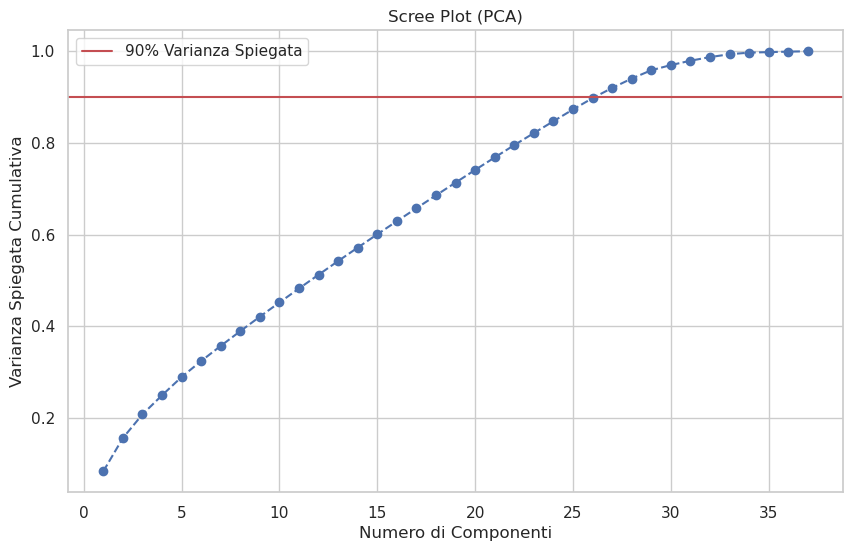

Servono 27 componenti per spiegare il 90% della varianza originale.


In [648]:
from sklearn.decomposition import PCA

pca_full = PCA()
pca_full.fit(X_train)

# Calcolo della varianza spiegata cumulativa
cum_variance = np.cumsum(pca_full.explained_variance_ratio_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cum_variance) + 1), cum_variance, marker='o', linestyle='--')
plt.axhline(y=0.90, color='r', linestyle='-', label='90% Varianza Spiegata')
plt.xlabel('Numero di Componenti')
plt.ylabel('Varianza Spiegata Cumulativa')
plt.title('Scree Plot (PCA)')
plt.grid(True)
plt.legend()
plt.show()

# Troviamo il numero esatto di componenti per il 90%
n_components_90 = np.argmax(cum_variance >= 0.90) + 1
print(f"Servono {n_components_90} componenti per spiegare il 90% della varianza originale.")

Il grafico ci indica che bastano 27 componenti principali per conservare il 90% dell'informazione originale.

#### 1.2 Applicazione dei modelli lineari

Adesso andremo ad applicare i modelli utilizzati precedentemente, usando gli stessi script. Lo scopo e vedere adesso quale modello si comporta meglio con le nuove componenti calcolate.

In [649]:
# Ricalcoliamo i due set
pca_opt = PCA(n_components=n_components_90)
X_train_pca = pca_opt.fit_transform(X_train)
X_test_pca = pca_opt.transform(X_test)

In [650]:
# Fissiamo il grado a 1 per la regressione lineare semplice
degree_lr = 1

# 1. Configurazione Metriche
metrics = {
    'MAE': 'neg_mean_absolute_error',
    'MSE': 'neg_mean_squared_error',
    'RMSE': 'neg_root_mean_squared_error',
    'R2': 'r2'
}

# --- 1. REGRESSIONE LINEARE SEMPLICE ---
pipeline_lr = Pipeline([
    ('poly', PolynomialFeatures(degree=degree_lr)),
    ('model', LinearRegression())
])

gs_lr = GridSearchCV(pipeline_lr, param_grid={}, cv=5, scoring=metrics, refit='MSE')
gs_lr.fit(X_train_pca, y_train)

best_idx_lr = gs_lr.best_index_
res_lr = gs_lr.cv_results_

new_slr_row = pd.DataFrame({
    'Method': ['Linear Simple PCA'],
    'Validation': ['K-Fold CV: 5'],
    'Parameters': ["Degree: {}".format(degree_lr)],
    'R2': [res_lr['mean_test_R2'][best_idx_lr]],
    'MAE': [res_lr['mean_test_MAE'][best_idx_lr] * -1],
    'MSE': [res_lr['mean_test_MSE'][best_idx_lr] * -1],
    'RMSE': [res_lr['mean_test_RMSE'][best_idx_lr] * -1]
})

auto_usate_result = pd.concat([auto_usate_result, new_slr_row], ignore_index=True)

# --- 2. RIDGE LINEAR REGRESSION ---
polynomial_regressor_ridge = Pipeline([
    ('polynomial_expansion', PolynomialFeatures(degree=degree_lr)),
    ('ridge_regression', Ridge())
])

ridge_param_grid = {
    'ridge_regression__alpha': [0.1, 1, 10, 50, 100, 200, 400, 600, 1000]
}

gs_ridge = GridSearchCV(polynomial_regressor_ridge, param_grid=ridge_param_grid, cv=5, scoring=metrics, refit='MSE')
gs_ridge.fit(X_train_pca, y_train)

best_alpha_ridge = gs_ridge.best_params_['ridge_regression__alpha']
best_idx_ridge = gs_ridge.best_index_
res_ridge = gs_ridge.cv_results_

new_row_ridge = pd.DataFrame({
    'Method': ['Linear Ridge PCA'],
    'Validation': ['K-Fold CV: 5'],
    'Parameters': ["Degree: {}, Alpha: {}".format(degree_lr, best_alpha_ridge)],
    'R2': [res_ridge['mean_test_R2'][best_idx_ridge]],
    'MAE': [res_ridge['mean_test_MAE'][best_idx_ridge] * -1],
    'MSE': [res_ridge['mean_test_MSE'][best_idx_ridge] * -1],
    'RMSE': [res_ridge['mean_test_RMSE'][best_idx_ridge] * -1]
})
auto_usate_result = pd.concat([auto_usate_result, new_row_ridge], ignore_index=True)

# --- 3. LASSO REGRESSION ---
polynomial_regressor_lasso = Pipeline([
    ('polynomial_expansion', PolynomialFeatures(degree=degree_lr)),
    ('lasso_regression', Lasso(max_iter=10000))
])

lasso_param_grid = {
    'lasso_regression__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]
}

gs_lasso = GridSearchCV(polynomial_regressor_lasso, param_grid=lasso_param_grid, cv=5, scoring=metrics, refit='MSE')
gs_lasso.fit(X_train_pca, y_train)

best_alpha_lasso = gs_lasso.best_params_['lasso_regression__alpha']
best_idx_lasso = gs_lasso.best_index_
res_lasso = gs_lasso.cv_results_

new_row_lasso = pd.DataFrame({
    'Method': ['Linear Lasso PCA'],
    'Validation': ['K-Fold CV: 5'],
    'Parameters': ["Degree: {}, Alpha: {}".format(degree_lr, best_alpha_lasso)],
    'R2': [res_lasso['mean_test_R2'][best_idx_lasso]],
    'MAE': [res_lasso['mean_test_MAE'][best_idx_lasso] * -1],
    'MSE': [res_lasso['mean_test_MSE'][best_idx_lasso] * -1],
    'RMSE': [res_lasso['mean_test_RMSE'][best_idx_lasso] * -1]
})
auto_usate_result = pd.concat([auto_usate_result, new_row_lasso], ignore_index=True)

In [651]:
# 1. Configurazione Metriche
metrics = {
    'MAE': 'neg_mean_absolute_error',
    'MSE': 'neg_mean_squared_error',
    'RMSE': 'neg_root_mean_squared_error',
    'R2': 'r2'
}

# Ricerca del grado migliore
find_degree_pipe = Pipeline([
    ('poly', PolynomialFeatures()),
    ('model', Ridge())
])

degree_grid = {'poly__degree': [1, 2, 3]}

gs_degree = GridSearchCV(find_degree_pipe, param_grid=degree_grid, cv=5, scoring='neg_mean_squared_error')
gs_degree.fit(X_train_pca, y_train)

best_degree = gs_degree.best_params_['poly__degree']
print("Grado ottimale individuato: {:>2}".format(best_degree))

# --- 4. REGRESSIONE POLINOMIALE SEMPLICE ---
poly_simple_pipe = Pipeline([
    ('poly', PolynomialFeatures(degree=best_degree)),
    ('model', LinearRegression())
])

gs_poly_simple = GridSearchCV(poly_simple_pipe, param_grid={}, cv=5, scoring=metrics, refit='MSE')
gs_poly_simple.fit(X_train_pca, y_train)

res_ps = gs_poly_simple.cv_results_
idx_ps = gs_poly_simple.best_index_

# Creazione riga per Polynomial Simple
new_row_poly = pd.DataFrame({
    'Method': ['Polynomial Simple PCA'],
    'Validation': ['K-Fold CV: 5'],
    'Parameters': ["Degree: {}".format(best_degree)],
    'R2': [res_ps['mean_test_R2'][idx_ps]],
    'MAE': [res_ps['mean_test_MAE'][idx_ps] * -1],
    'MSE': [res_ps['mean_test_MSE'][idx_ps] * -1],
    'RMSE': [res_ps['mean_test_RMSE'][idx_ps] * -1]
})

auto_usate_result = pd.concat([auto_usate_result, new_row_poly], ignore_index=True)

# --- 5. REGRESSIONE POLINOMIALE RIDGE ---
poly_ridge_pipe = Pipeline([
    ('poly', PolynomialFeatures(degree=best_degree)),
    ('model', Ridge())
])

ridge_params = {'model__alpha': [0.1, 1, 10, 50, 100, 200, 400, 600, 1000]}

gs_ridge = GridSearchCV(poly_ridge_pipe, param_grid=ridge_params, cv=5, scoring=metrics, refit='MSE')
gs_ridge.fit(X_train_pca, y_train)

res_pr = gs_ridge.cv_results_
idx_pr = gs_ridge.best_index_
best_alpha_ridge = gs_ridge.best_params_['model__alpha']

new_row_ridge = pd.DataFrame({
    'Method': ['Polynomial Ridge PCA'],
    'Validation': ['K-Fold CV: 5'],
    'Parameters': ["Degree: {}, Alpha: {}".format(best_degree, best_alpha_ridge)],
    'R2': [res_pr['mean_test_R2'][idx_pr]],
    'MAE': [res_pr['mean_test_MAE'][idx_pr] * -1],
    'MSE': [res_pr['mean_test_MSE'][idx_pr] * -1],
    'RMSE': [res_pr['mean_test_RMSE'][idx_pr] * -1]
})

auto_usate_result = pd.concat([auto_usate_result, new_row_ridge], ignore_index=True)

# --- 6. REGRESSIONE POLINOMIALE LASSO ---
poly_lasso_pipe = Pipeline([
    ('poly', PolynomialFeatures(degree=best_degree)),
    ('model', Lasso(max_iter=10000))
])

lasso_params = {'model__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]}

gs_lasso = GridSearchCV(poly_lasso_pipe, param_grid=lasso_params, cv=5, scoring=metrics, refit='MSE')
gs_lasso.fit(X_train_pca, y_train)

res_pl = gs_lasso.cv_results_
idx_pl = gs_lasso.best_index_
best_alpha_lasso = gs_lasso.best_params_['model__alpha']

# Creazione riga per Polynomial Lasso
new_row_lasso = pd.DataFrame({
    'Method': ['Polynomial Lasso PCA'],
    'Validation': ['K-Fold CV: 5'],
    'Parameters': ["Degree: {}, Alpha: {}".format(best_degree, best_alpha_lasso)],
    'R2': [res_pl['mean_test_R2'][idx_pl]],
    'MAE': [res_pl['mean_test_MAE'][idx_pl] * -1],
    'MSE': [res_pl['mean_test_MSE'][idx_pl] * -1],
    'RMSE': [res_pl['mean_test_RMSE'][idx_pl] * -1]
})

auto_usate_result = pd.concat([auto_usate_result, new_row_lasso], ignore_index=True)

Grado ottimale individuato:  1


Cerchiamo il modello migliore.

In [652]:

# Cerchiamo il modello minore
best_model_idx = auto_usate_result['MSE'].idxmin()

best_model_name = auto_usate_result.loc[best_model_idx, 'Method']
best_model_mse = auto_usate_result.loc[best_model_idx, 'MSE']

print(f"Modello migliore: {best_model_name}")
print(f"MSE: {best_model_mse}")

auto_usate_result


Modello migliore: Polynomial Lasso
MSE: 0.03188898727401435


,Method,Validation,R2,MAE,MSE,RMSE,Parameters
0,Linear Simple,K-Fold CV: 5,0.923708,0.147592,0.040139,0.199963,NaN
1,Linear Ridge,K-Fold CV: 5,0.923711,0.147600,0.040137,0.199959,Alpha: 1
2,Linear Lasso,K-Fold CV: 5,0.923706,0.147618,0.040140,0.199966,Alpha: 0.0001
3,Polynomial Ridge,K-Fold CV: 5,0.935859,0.124965,0.033788,0.183242,"Degree: 2, Alpha: 100"
4,Polynomial Lasso,K-Fold CV: 5,0.939419,0.121777,0.031889,0.177959,"Degree: 2, Alpha: 0.001"
5,Linear Simple PCA,K-Fold CV: 5,0.865166,0.203827,0.070944,0.266246,Degree: 1
6,Linear Ridge PCA,K-Fold CV: 5,0.865172,0.203820,0.070941,0.266240,"Degree: 1, Alpha: 10"
7,Linear Lasso PCA,K-Fold CV: 5,0.865265,0.203764,0.070892,0.266147,"Degree: 1, Alpha: 0.001"
8,Polynomial Simple PCA,K-Fold CV: 5,0.865166,0.203827,0.070944,0.266246,Degree: 1
9,Polynomial Ridge PCA,K-Fold CV: 5,0.865172,0.203820,0.070941,0.266240,"Degree: 1, Alpha: 10"


Analizziamo i risultati:
- Il miglior modello pre-PCA (R2: 0.936, Polynomial Ridge) è superiore alla sua controparte PCA (R2: 0.8960, Polynomial Ridge). Questo indica che la compressione delle feature, pur semplificando il dataset, ha comportato la perdita di una piccola frazione di informazione utile alla stima precisa del prezzo.

- La Regolarizzazione Ridge riesce maggiormente a migliorare le performance.

- Nei modelli basati su PCA, la differenza tra regressione semplice, Ridge e Lasso è diventata quasi impercettibile. Questo accade perché la PCA genera componenti tra loro non correlate (ortogonali), risolvendo alla radice il problema della multicollinearità che la regolarizzazione Ridge solitamente si trova a gestire.

#### 1.3 Visualizzazione

Adesso andremo a proiettare le nostre osservazioni in uno spazio 2d, applicando una PCA a 2 componenti, lo scopo è vedere se troviamo cluster naturali.

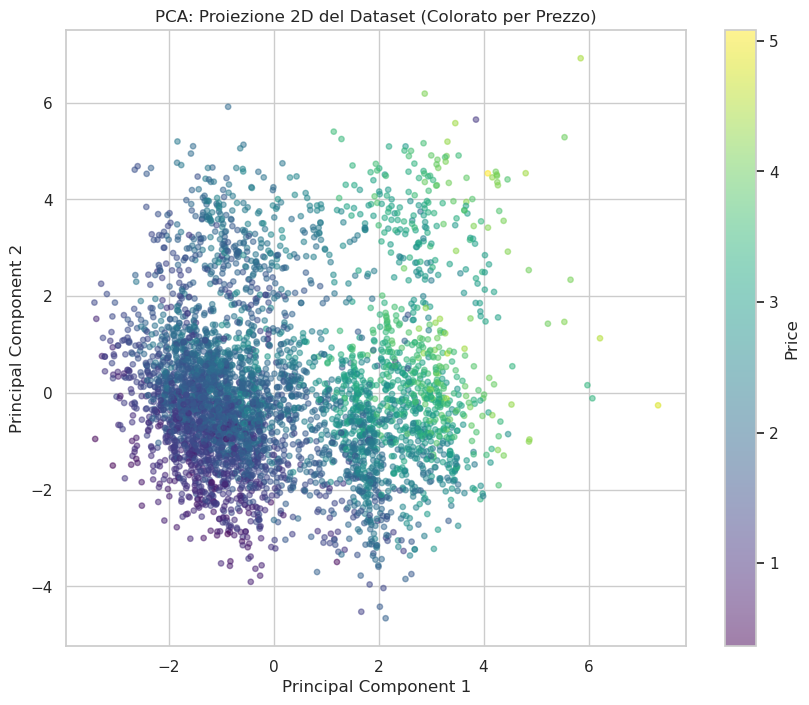

In [653]:
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_train_pca)

plt.figure(figsize=(10, 8))
# Scatter plot: X=PC1, Y=PC2, Colore=Prezzo
scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], 
                      c=y_train, cmap='viridis', alpha=0.5, s=15)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: Proiezione 2D del Dataset (Colorato per Prezzo)')
plt.colorbar(scatter, label='Price')
plt.grid(True)
plt.show()

Notiamo che nello spazio 2D, c'è una divisione netta. Le auto costose (punti chiari/gialli) si concentrano a destra, mentre quelle economiche (punti scuri/viola) a sinistra.

### 2. Riorganizzazione dei Dati tramite Clustering 

Adesso vogliamo vedere se i nostri dati tendono a raggrupparsi formando dei cluster naturali. Utilizzeremo l'algoritmo K-Means.

##### Numero di gruppi ottimale

Per procedere con la segmentazione del dataset, è necessario stabilire in quanti gruppi sia più opportuno suddividere le osservazioni. Utilizzeremo a questo scopo l'**Elbow Method** (metodo del gomito) applicato ai dati precedentemente trasformati tramite **PCA**. L'obiettivo è individuare il numero ideale di cluster per ottenere una **suddivisione del mercato** dell'usato che sia statisticamente coerente e utile ai fini dell'analisi.

Il procedimento prevede il calcolo dell'**inerzia** — ovvero la somma dei quadrati delle distanze tra ogni record e il baricentro del cluster più vicino — testando un intervallo di **K cluster** da 1 a 10. Attraverso l'ispezione del grafico, cercheremo il cosiddetto **punto di flesso**: quel valore di K oltre il quale l'aggiunta di nuovi gruppi non apporta più una **riduzione significativa** dell'inerzia. Questo punto rappresenta il miglior compromesso tra la semplicità del modello e la precisione della clusterizzazione.

Andiamo a plottare il grafico sia con il dataset senza PCA e sia con PCA.

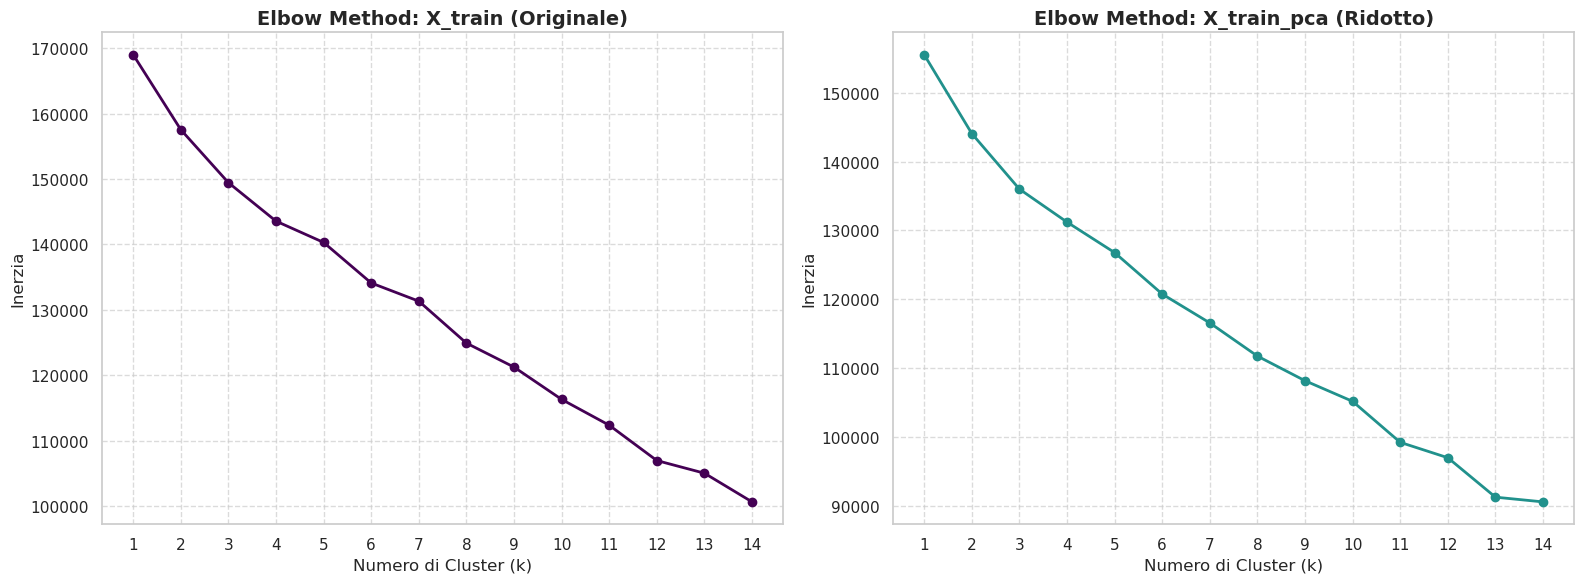

In [654]:
from sklearn.cluster import KMeans

K_range = range(1, 15)
inertia_original = []
inertia_pca = []

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_train)
    inertia_original.append(km.inertia_)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_train_pca)
    inertia_pca.append(km.inertia_)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.plot(K_range, inertia_original, 'o-', color='#440154', linewidth=2)
ax1.set_title('Elbow Method: X_train (Originale)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Numero di Cluster (k)')
ax1.set_ylabel('Inerzia')
ax1.set_xticks(K_range)
ax1.grid(True, linestyle='--', alpha=0.7)

ax2.plot(K_range, inertia_pca, 'o-', color='#21918c', linewidth=2) # Colore medio dalla palette viridis
ax2.set_title('Elbow Method: X_train_pca (Ridotto)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Numero di Cluster (k)')
ax2.set_ylabel('Inerzia')
ax2.set_xticks(K_range)
ax2.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Dall'osservazione del grafico si nota che la curva dell'inerzia scende in modo pressoché **lineare**, senza mostrare il caratteristico "gomito" o punto di flesso marcato. In termini tecnici, questa evidenza suggerisce che i dati non presentano una **suddivisione in cluster naturali** o ben separati nello spazio delle feature. Questo è uguale sia nella curva con il dataset non ridotto e sia nella curva con riduzione PCA.

L'assenza di una struttura a gruppi definita indica che il dataset è caratterizzato da un **continuum di osservazioni**. In questo scenario, le auto usate sfumano gradualmente da una categoria all'altra (ad esempio dal segmento *economy* al *premium*) senza barriere statistiche nette. Nonostante la mancanza di cluster intrinseci, procederemo comunque alla segmentazione scegliendo un valore di **K** basato su necessità analitiche, consapevoli che i confini tra i gruppi saranno parzialmente arbitrari e funzionali esclusivamente alla **semplificazione del mercato** per scopi descrittivi.

Come ultima conferma andiamo a visualizzare il **Silhouette Method**, se fosse divisi in cluster natuarli ci aspetteremmo un punto che sia più in alto di tutti, un picco.

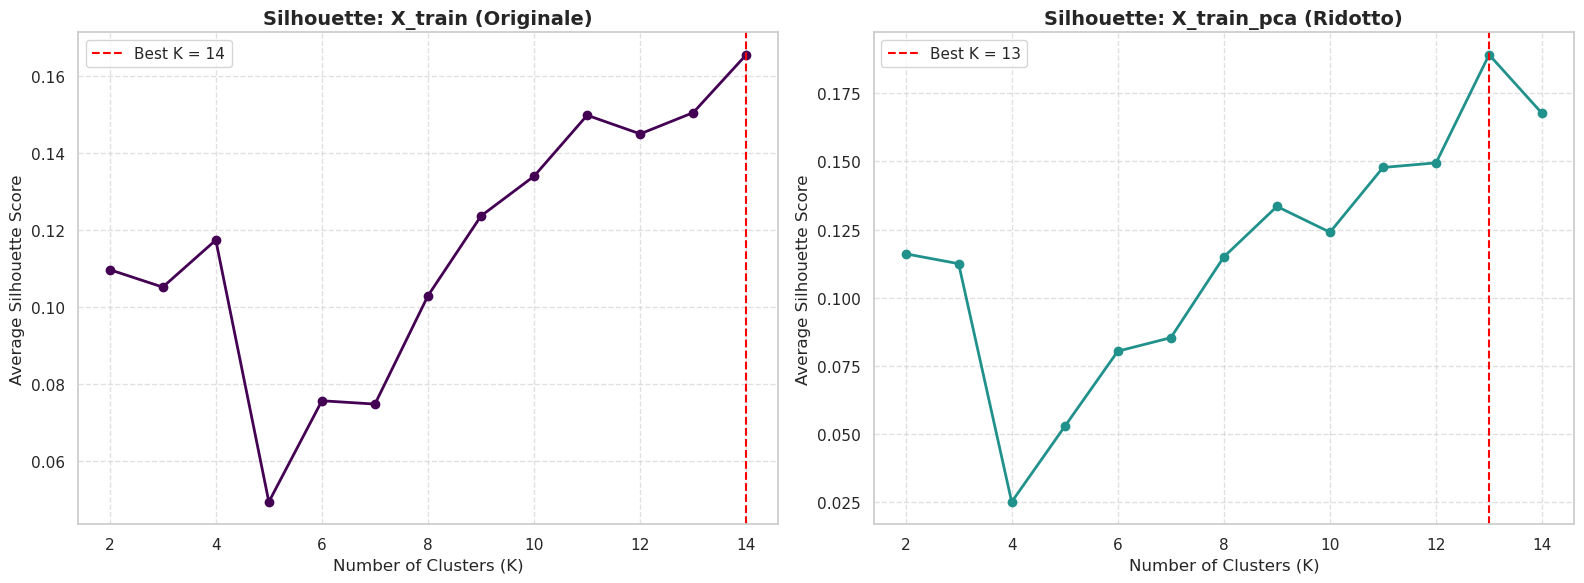

In [655]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

k_values_sil = range(2, 15)
silhouette_scores_original = []
silhouette_scores_pca = []

# 1. Calcolo Silhouette per X_train (Dati originali)
for k in k_values_sil:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_train)
    score = silhouette_score(X_train, labels)
    silhouette_scores_original.append(score)

# 2. Calcolo Silhouette per X_train_pca (Dati ridotti)
for k in k_values_sil:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_train_pca)
    score = silhouette_score(X_train_pca, labels)
    silhouette_scores_pca.append(score)

# 3. Visualizzazione affiancata
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot per X_train
ax1.plot(k_values_sil, silhouette_scores_original, 'o-', color='#440154', linewidth=2)
best_k_orig = k_values_sil[np.argmax(silhouette_scores_original)]
ax1.axvline(x=best_k_orig, color='red', linestyle='--', label=f'Best K = {best_k_orig}')
ax1.set_title('Silhouette: X_train (Originale)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Number of Clusters (K)')
ax1.set_ylabel('Average Silhouette Score')
ax1.legend()
ax1.grid(True, linestyle='--', alpha=0.6)

# Plot per X_train_pca
ax2.plot(k_values_sil, silhouette_scores_pca, 'o-', color='#21918c', linewidth=2)
best_k_pca = k_values_sil[np.argmax(silhouette_scores_pca)]
ax2.axvline(x=best_k_pca, color='red', linestyle='--', label=f'Best K = {best_k_pca}')
ax2.set_title('Silhouette: X_train_pca (Ridotto)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Number of Clusters (K)')
ax2.set_ylabel('Average Silhouette Score')
ax2.legend()
ax2.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

Secondo il SIlhouette Method il valore di k ottimale è il valore più alto del range, non è un risultato attendibile ed inoltre e un ulteriore conferma che i nostir dati non si raggruppano in cluster naturali.

### 3. Density Estimation

Poiché l'analisi precedente con l'Elbow Method ha rivelato l'assenza di cluster netti e naturali, passiamo a un approccio di **Density Estimation** utilizzando il **Gaussian Mixture Model (GMM)**. Invece di forzare ogni auto in un gruppo rigido, il GMM modella la distribuzione dei dati come una sovrapposizione di diverse distribuzioni gaussiane.

Ci concentreremo sulla relazione tra **Power** e **Price** per mappare la densità di probabilità del mercato:

* **Modellazione Probabilistica**: A differenza di K-Means, il GMM assegna a ogni punto una probabilità di appartenenza a un componente, permettendo di gestire **cluster sovrapposti** e di forma ellittica.
* **Individuazione delle Nicchie**: Plottando la potenza rispetto al prezzo, il modello identificherà le aree a maggiore densità (es. il mercato di massa con bassa potenza e prezzo contenuto) e le zone a bassa densità (auto ad alte prestazioni e prezzo elevato).
* **Analisi dei Contorni**: Attraverso la visualizzazione dei **contorni di densità**, potremo osservare come si evolve il valore delle auto all'aumentare della potenza, identificando visivamente dove si concentra la maggior parte delle offerte e dove iniziano i segmenti più esclusivi.

Questo approccio trasforma il problema da una semplice suddivisione in gruppi a uno studio della **struttura continua del mercato**, fornendo una visione molto più realistica della distribuzione dei prezzi in funzione delle prestazioni.

/home/greco/universita/fad/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


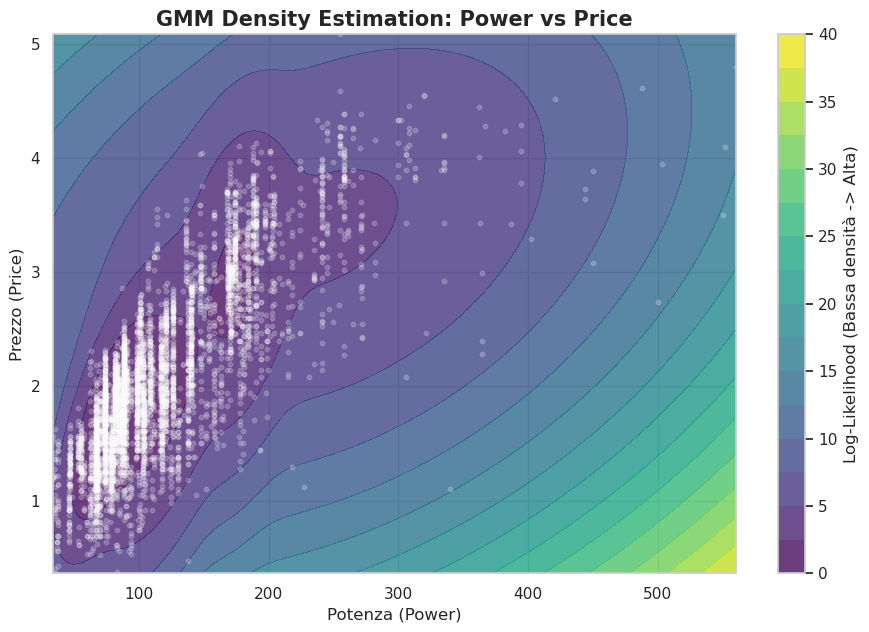

In [658]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

# 1. Preparazione dei dati (Standardizzazione necessaria per GMM)
scaler = StandardScaler()
data_gmm = scaler.fit_transform(df[['Power', 'Price']])

# 2. Fit del Gaussian Mixture Model
# Scegliamo ad esempio 3 o 4 componenti (basandoci sui risultati del clustering precedente)
gmm = GaussianMixture(n_components=4, random_state=42)
gmm.fit(data_gmm)

# Creazione di una griglia per il plot della densità
x = np.linspace(df['Power'].min(), df['Power'].max(), 100)
y = np.linspace(df['Price'].min(), df['Price'].max(), 100)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
XX_scaled = scaler.transform(XX)

# Calcolo del log-likelihood (densità) sulla griglia
Z = -gmm.score_samples(XX_scaled)
Z = Z.reshape(X.shape)

# 3. Plotting professionale (Stile Zara/The Bayesians)
plt.figure(figsize=(11, 7))

# Contour plot della densità
plt.contourf(X, Y, Z, levels=15, cmap='viridis', alpha=0.8)
plt.colorbar(label='Log-Likelihood (Bassa densità -> Alta)')

# Scatter plot delle auto (opzionale: colorate per probabilità o cluster)
plt.scatter(df['Power'], df['Price'], c='white', alpha=0.2, s=10, label='Dati reali')

plt.title('GMM Density Estimation: Power vs Price', fontsize=15, fontweight='bold')
plt.xlabel('Potenza (Power)', fontsize=12)
plt.ylabel('Prezzo (Price)', fontsize=12)
plt.show()


Dall'osservazione del grafico vediamo:

* **Core del Mercato (Alta Densità)**: La zona con la colorazione più scura (Log-Likelihood bassa) evidenzia una fortissima concentrazione di veicoli nella fascia **Power < 150** e **Price < 2**. Questo rappresenta il "cuore" del mercato dell'usato, composto da auto utilitarie e city-car con caratteristiche standardizzate.
* **Espansione del Valore**: All'aumentare della potenza, le linee di contorno si allargano e si sollevano. Notiamo che superati i **200 bhp**, la densità dei punti diminuisce drasticamente, ma il prezzo tende a salire in modo più ripido, indicando l'ingresso nel segmento delle auto **premium e sportive**.
* **Struttura Continua**: La forma allungata e diagonale dei contorni di densità conferma la **correlazione positiva (0.79)** individuata nella matrice di Pearson. Non ci sono "salti" netti o vuoti tra le fasce di prezzo, il che giustifica tecnicamente perché il K-Means faticasse a trovare cluster naturali: il mercato è un fluido.
* **Individuazione delle Anomalie**: I punti che ricadono nelle aree più chiare (giallo/verdi) rappresentano configurazioni rare, come auto con potenza estrema o prezzi fuori scala rispetto alla media, che il modello GMM identifica come zone a **bassa probabilità**.

Questa visualizzazione conferma che la potenza è il motore principale del valore economico, ma mostra anche come la **varianza del prezzo** aumenti sensibilmente per i veicoli ad alte prestazioni.

## Conclusioni

TO DO: Conclusioni

##### 2.3 Colcusioni precedenti

In questa sezione di **modeling**, abbiamo affrontato il problema della valutazione delle auto usate attraverso due approcci: la capacità predittiva e la segmentazione del mercato.

L'implementazione del modello di regressione ha confermato che variabili tecniche come la **potenza del motore** (Power) e l'**anzianità del veicolo** (Age) esercitano l'influenza maggiore nel determinare il valore dell'auto. La robustezza del modello, ci permette di stimare con un grado di precisione soddisfacente il prezzo di vendita, fornendo uno **strumento concreto** per l'analisi quantitativa del mercato indiano.

Il modello migliore è quello che fa uso di **Regressione Polinomiale con Regolarizzazzione Ridge**, con un polinomio di grado 2 e alpha pari a 10. Commette un errore medio sul prezzo pari al 17%, un grado **errore soddisfacente** considerando che in genere previsioni del genere sono molto difficili.

L'applicazione di una riduzione in componenti principali non sembra offrire performance migliori sui nostri modelli, indicando come tutti i dati a nostra disposizioni **riescano molto bene a spiegare** le variazioni del prezzo di vendita delle auto.

Parallelamente, l'analisi di Clustering ha rivelato una struttura interna del dataset coerente con quello che ci aspettavamo. Abbiamo individuato tre segmenti distinti: Auto Economiche, Fascia Media e Lusso. Questo ci indica che: 

- **Il mercato è polarizzato**, esisteono molte vendite su veicoli a basso costo, dove la concorrenza potrebbe essere elevata elevata.

- Il segmento "Lusso" (media 19 Lakh) mostra un **comportamento diverso,** dove il brand e le specifiche tecniche pesano molto più del chilometraggio.

- La classe intermedia funge da **ponte**.

Per concludere, il passaggio dai dati grezzi ai modelli ci ha permesso di trasformare semplici osservazioni in uno **strumento funzionante e utile**. I modelli sviluppati non solo riescono a spiegare in maniera ottimale la realtà, ma forniscono le basi per altre prvisioni future o per l'integrazione di nuovi dati.